# Telecom Churn Case Study 
> <font color='dark blue'>by Adhinav and Bharathraj</font>

As we have to build two different models, One for **Performance** and one for **Interpretation**.<br>
Let's start with Performance based Model.<br>
## Telecom Churn Case Study: Model building with PCA


### Process going to be followed,

>**Step 1:** Reading and Understanding the Data<br>
**Step 2:** Visualising the Data<br>
**Step 3:** Data Preparation<br>
**Step 4:** Splitting the Data into Training and Testing Sets<br>
**Step 5:** Implementing PCA <br>
**Step 6:** Handling Imbalance with SMOTE<br>
**Step 7:** Model Building using Logistic regression, Decision Trees and RF<br>
**Step 8:** Model Evaluation<br>

### Step 1: Reading and Understanding the Data

In [2]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)

In [2]:
conda install -c conda-forge missingno

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importing data
df = pd.read_csv('telecom_churn_data.csv')
df

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109             0.0             0.0   
1         7001865778        109             0.0             0.0   
2         7001625959        109             0.0             0.0   
3         7001204172        109             0.0             0.0   
4         7000142493        109             0.0             0.0   
...              ...        ...             ...             ...   
99994     7001548952        109             0.0             0.0   
99995     7000607688        109             0.0             0.0   
99996     7000087541        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   
99998     7001905007        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
0                 0.0            6/30/2014            7/31/2014   
1                 0.0            6/30/2014            7/31/2014   
2                 0.0            6/30/2014            7/31/2014   
3                 0.0            6/30/2014            7/31/2014   
4                 0.0            6/30/2014            7/31/2014   
...               ...                  ...                  ...   
99994             0.0            6/30/2014            7/31/2014   
99995             0.0            6/30/2014            7/31/2014   
99996             0.0            6/30/2014            7/31/2014   
99997             0.0            6/30/2014            7/31/2014   
99998             0.0            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8  \
0                8/31/2014            9/30/2014  197.385  214.816  213.803   
1                8/31/2014            9/30/2014   34.047  355.074  268.321   
2                8/31/2014            9/30/2014  167.690  189.058  210.226   
3                8/31/2014            9/30/2014  221.338  251.102  508.054   
4                8/31/2014            9/30/2014  261.636  309.876  238.174   
...                    ...                  ...      ...      ...      ...   
99994            8/31/2014            9/30/2014   18.471   69.161   57.530   
99995            8/31/2014            9/30/2014  112.201   77.811   79.081   
99996            8/31/2014            9/30/2014  229.187    0.000    0.000   
99997            8/31/2014            9/30/2014  322.991  303.386  606.817   
99998            8/31/2014            9/30/2014  687.065    0.000    0.000   

        arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
0       21.100          NaN          NaN         0.00          NaN   
1       86.285        24.11        78.68         7.68        18.34   
2      290.714        11.54        55.24        37.26        74.81   
3      389.500        99.91        54.39       310.98       241.71   
4      163.426        50.31       149.44        83.89        58.78   
...        ...          ...          ...          ...          ...   
99994   29.950         5.40         3.36         5.91         0.00   
99995  140.835        29.26        18.13        16.06        49.49   
99996    0.000         1.11          NaN          NaN          NaN   
99997  731.010         0.00         0.00         0.00         0.00   
99998    0.000        84.34          NaN          NaN          NaN   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
0               NaN           NaN          0.00           NaN            NaN   
1             15.74         99.84        304.76         53.76            0.0   
2            143.33        220.59        208.36        118.91            0.0   
3            123.31        109.01         71.68        113.54            0.0   
4             76.96         91.88        124.26         45.81            0.0   
...             ...           ...           ...           ...            ...   
99994         15.19         54.46         52.79         27.

Inspecting the Dataframe

In [4]:
# Let's check the dimensions of the dataset
df.shape

(99999, 226)

In [5]:
# Let's see the type of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
# Let's see the head of our dataset
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [7]:
# let's look at the statistical aspects of the dataset
df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [8]:
# let's look at the columns
columns = pd.Series(df.columns)
columns

0                 mobile_number
1                     circle_id
2                loc_og_t2o_mou
3                std_og_t2o_mou
4                loc_ic_t2o_mou
5          last_date_of_month_6
6          last_date_of_month_7
7          last_date_of_month_8
8          last_date_of_month_9
9                        arpu_6
10                       arpu_7
11                       arpu_8
12                       arpu_9
13                  onnet_mou_6
14                  onnet_mou_7
15                  onnet_mou_8
16                  onnet_mou_9
17                 offnet_mou_6
18                 offnet_mou_7
19                 offnet_mou_8
20                 offnet_mou_9
21                roam_ic_mou_6
22                roam_ic_mou_7
23                roam_ic_mou_8
24                roam_ic_mou_9
25                roam_og_mou_6
26                roam_og_mou_7
27                roam_og_mou_8
28                roam_og_mou_9
29             loc_og_t2t_mou_6
30             loc_og_t2t_mou_7
31      

**Creating new column which helps to create target variable**

Using the Sep(9) month data and creating target variable

In [9]:
# Creating total usage column which helps to create target variable
df['total_usage'] = df.total_ic_mou_9 + df.total_og_mou_9 + df.vol_2g_mb_9 + df.vol_3g_mb_9

In [10]:
# Creating target variable - Churn/ Not Churn
df['churn'] = df['total_usage'].apply(lambda x: 1 if x == 0.00 else 0)

In [11]:
# Let's see the target variables value spread
df.churn.value_counts()

0    89808
1    10191
Name: churn, dtype: int64

**Since we have our target variable now, dropping all the sep(9) data**

In [12]:
# Getting the sep month columns
sep = columns[columns.apply(lambda x: x[-1]=='9')]

In [13]:
# count of sep month columns
sep.count()

54

In [14]:
# Dropping the 53 columns
df.drop(columns=sep,inplace=True)
df.shape

(99999, 174)

**Checking for Missing Values and Imputing Them**

In [15]:
# Adding up the missing values (column-wise)
null_values = round(df.isnull().sum()/len(df.index),2)
null_values = null_values.reset_index(name='val')

In [16]:
# Columns which have more than 5% null values 
col_w_null_75per = null_values[null_values.val>0.05]
col_w_null_75per

index   val
119  date_of_last_rech_data_6  0.75
120  date_of_last_rech_data_7  0.74
121  date_of_last_rech_data_8  0.74
122         total_rech_data_6  0.75
123         total_rech_data_7  0.74
124         total_rech_data_8  0.74
125           max_rech_data_6  0.75
126           max_rech_data_7  0.74
127           max_rech_data_8  0.74
128           count_rech_2g_6  0.75
129           count_rech_2g_7  0.74
130           count_rech_2g_8  0.74
131           count_rech_3g_6  0.75
132           count_rech_3g_7  0.74
133           count_rech_3g_8  0.74
134        av_rech_amt_data_6  0.75
135        av_rech_amt_data_7  0.74
136        av_rech_amt_data_8  0.74
143                 arpu_3g_6  0.75
144                 arpu_3g_7  0.74
145                 arpu_3g_8  0.74
146                 arpu_2g_6  0.75
147                 arpu_2g_7  0.74
148                 arpu_2g_8  0.74
149          night_pck_user_6  0.75
150          night_pck_user_7  0.74
151          night_pck_user_8  0.74
164                 fb_user_6  0.75
165                 fb_user_7  0.74
166                 fb_user_8  0.74

- Turning out, all these columns have almost 75 percent null values 

In [17]:
# Let's check those in the dataset
df[col_w_null_75per['index']]

date_of_last_rech_data_6 date_of_last_rech_data_7  \
0                    6/21/2014                7/16/2014   
1                          NaN                7/25/2014   
2                          NaN                      NaN   
3                          NaN                      NaN   
4                   06-04-2014                      NaN   
...                        ...                      ...   
99994                      NaN                      NaN   
99995                      NaN                      NaN   
99996                6/13/2014                      NaN   
99997                6/17/2014                7/19/2014   
99998               06-11-2014                      NaN   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
0                   08-08-2014                1.0                1.0   
1                   08-10-2014                NaN                1.0   
2                          NaN                NaN                NaN   
3                          NaN                NaN                NaN   
4                          NaN                1.0                NaN   
...                        ...                ...                ...   
99994                      NaN                NaN                NaN   
99995                      NaN                NaN                NaN   
99996                      NaN                2.0                NaN   
99997                8/20/2014                3.0                2.0   
99998                      NaN                1.0                NaN   

       total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
0                    1.0            252.0            252.0            252.0   
1                    2.0              NaN            154.0             25.0   
2                    NaN              NaN              NaN              NaN   
3                    NaN              NaN              NaN              NaN   
4                    NaN             56.0              NaN              NaN   
...                  ...              ...              ...              ...   
99994                NaN              NaN              NaN              NaN   
99995                NaN              NaN              NaN              NaN   
99996                NaN             25.0              NaN              NaN   
99997                4.0            202.0            179.0            179.0   
99998                NaN            154.0              NaN              NaN   

       count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  \
0                  0.0              0.0              0.0              1.0   
1                  NaN              1.0              2.0              NaN   
2                  NaN              NaN              NaN              NaN   
3                  NaN              NaN              NaN              NaN   
4                  1.0              NaN              NaN              0.0   
...                ...              ...              ...              ...   
99994              NaN              NaN              NaN              NaN   
99995              NaN              NaN              NaN              NaN   
99996              2.0              NaN              NaN              0.0   
99997              1.0              0.0              0.0              2.0   
99998              1.0              NaN              NaN              0.0   

       count_rech_3g_7  count_rech_3g_8  av_rech_amt_data_6  \
0                  1.0              1.0               252.0   
1                  0.0              0.0                 NaN   
2                  NaN              NaN                 NaN   
3                  NaN              NaN                 NaN   
4                  NaN              NaN                56.0   
...                ...              ...                 ...   
99994              NaN              NaN                 NaN   
99995              NaN              NaN               

In [18]:
# let's look at the statistical aspects of them
df[col_w_null_75per['index']].describe()

total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       25153.000000       25571.000000       26339.000000   
mean            2.463802           2.666419           2.651999   
std             2.789128           3.031593           3.074987   
min             1.000000           1.000000           1.000000   
25%             1.000000           1.000000           1.000000   
50%             1.000000           1.000000           1.000000   
75%             3.000000           3.000000           3.000000   
max            61.000000          54.000000          60.000000   

       max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  \
count     25153.000000     25571.000000     26339.000000     25153.000000   
mean        126.393392       126.729459       125.717301         1.864668   
std         108.477235       109.765267       109.437851         2.570254   
min           1.000000         1.000000         1.000000         0.000000   
25%          25.000000        25.000000        25.000000         1.000000   
50%         145.000000       145.000000       145.000000         1.000000   
75%         177.000000       177.000000       179.000000         2.000000   
max        1555.000000      1555.000000      1555.000000        42.000000   

       count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  \
count     25571.000000     26339.000000     25153.000000     25571.000000   
mean          2.044699         2.016288         0.599133         0.621720   
std           2.768332         2.720132         1.274428         1.394524   
min           0.000000         0.000000         0.000000         0.000000   
25%           1.000000         1.000000         0.000000         0.000000   
50%           1.000000         1.000000         0.000000         0.000000   
75%           2.000000         2.000000         1.000000         1.000000   
max          48.000000        44.000000        29.000000        35.000000   

       count_rech_3g_8  av_rech_amt_data_6  av_rech_amt_data_7  \
count     26339.000000        25153.000000        25571.000000   
mean          0.635711          192.600982          200.981292   
std           1.422827          192.646318          196.791224   
min           0.000000            1.000000            0.500000   
25%           0.000000           82.000000           92.000000   
50%           0.000000          154.000000          154.000000   
75%           1.000000          252.000000          252.000000   
max          45.000000         7546.000000         4365.000000   

       av_rech_amt_data_8     arpu_3g_6     arpu_3g_7     arpu_3g_8  \
count        26339.000000  25153.000000  25571.000000  26339.000000   
mean           197.526489     89.555057     89.384120     91.173849   
std            191.301305    193.124653    195.893924    188.180936   
min              0.500000    -30.820000    -26.040000    -24.490000   
25%             87.000000      0.000000      0.000000      0.000000   
50%            154.000000      0.480000      0.420000      0.880000   
75%            252.000000    122.070000    119.560000    122.070000   
max           4076.000000   6362.280000   4980.900000   3716.900000   

          arpu_2g_6     arpu_2g_7     arpu_2g_8  night_pck_user_6  \
count  25153.000000  25571.000000  26339.000000      25153.000000   
mean      86.398003     85.914450     86.599478          0.025086   
std      172.767523    176.379871    168.247852          0.156391   
min      -35.830000    -15.480000    -55.830000          0.000000   
25%        0.000000      0.000000      0.000000          0.000000   
50%       10.830000      8.810000      9.270000          0.000000   
75%      122.070000    122.070000    122.070000          0.000000   
max     6433.760000   4809.360000   3483.170000          1.000000   

       night_pck_user_7  night_pck_user_8     fb_user_6     fb_user_7  \
count      25571.000000      26339.000000  25153.000000  25571.000000   
mean           0.0230

I am imputing all the null values. Instead of dropping it. Since it is a month wise dataset. there are high chances, the recharge or some values of prev month may still have some validity. So we might have null values. So Imputing all of them with `zeros`.

In [19]:
# Imputing with zeros
df[col_w_null_75per['index']] = df[col_w_null_75per['index']].fillna(0)

In [20]:
# Let's check those again after imputation in the dataset
df[col_w_null_75per['index']]

date_of_last_rech_data_6 date_of_last_rech_data_7  \
0                    6/21/2014                7/16/2014   
1                            0                7/25/2014   
2                            0                        0   
3                            0                        0   
4                   06-04-2014                        0   
...                        ...                      ...   
99994                        0                        0   
99995                        0                        0   
99996                6/13/2014                        0   
99997                6/17/2014                7/19/2014   
99998               06-11-2014                        0   

      date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  \
0                   08-08-2014                1.0                1.0   
1                   08-10-2014                0.0                1.0   
2                            0                0.0                0.0   
3                            0                0.0                0.0   
4                            0                1.0                0.0   
...                        ...                ...                ...   
99994                        0                0.0                0.0   
99995                        0                0.0                0.0   
99996                        0                2.0                0.0   
99997                8/20/2014                3.0                2.0   
99998                        0                1.0                0.0   

       total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
0                    1.0            252.0            252.0            252.0   
1                    2.0              0.0            154.0             25.0   
2                    0.0              0.0              0.0              0.0   
3                    0.0              0.0              0.0              0.0   
4                    0.0             56.0              0.0              0.0   
...                  ...              ...              ...              ...   
99994                0.0              0.0              0.0              0.0   
99995                0.0              0.0              0.0              0.0   
99996                0.0             25.0              0.0              0.0   
99997                4.0            202.0            179.0            179.0   
99998                0.0            154.0              0.0              0.0   

       count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  \
0                  0.0              0.0              0.0              1.0   
1                  0.0              1.0              2.0              0.0   
2                  0.0              0.0              0.0              0.0   
3                  0.0              0.0              0.0              0.0   
4                  1.0              0.0              0.0              0.0   
...                ...              ...              ...              ...   
99994              0.0              0.0              0.0              0.0   
99995              0.0              0.0              0.0              0.0   
99996              2.0              0.0              0.0              0.0   
99997              1.0              0.0              0.0              2.0   
99998              1.0              0.0              0.0              0.0   

       count_rech_3g_7  count_rech_3g_8  av_rech_amt_data_6  \
0                  1.0              1.0               252.0   
1                  0.0              0.0                 0.0   
2                  0.0              0.0                 0.0   
3                  0.0              0.0                 0.0   
4                  0.0              0.0                56.0   
...                ...              ...                 ...   
99994              0.0              0.0                 0.0   
99995              0.0              0.0               

Now, let's take all the columns which have null values except columns which have more than 75% null values since we already handled it.

In [21]:
null_values=null_values[~(null_values['index'].isin(col_w_null_75per['index']))&null_values.val > 0]
null_values

index   val
2          loc_og_t2o_mou  0.01
3          std_og_t2o_mou  0.01
4          loc_ic_t2o_mou  0.01
6    last_date_of_month_7  0.01
7    last_date_of_month_8  0.01
11            onnet_mou_6  0.04
12            onnet_mou_7  0.04
13            onnet_mou_8  0.05
14           offnet_mou_6  0.04
15           offnet_mou_7  0.04
16           offnet_mou_8  0.05
17          roam_ic_mou_6  0.04
18          roam_ic_mou_7  0.04
19          roam_ic_mou_8  0.05
20          roam_og_mou_6  0.04
21          roam_og_mou_7  0.04
22          roam_og_mou_8  0.05
23       loc_og_t2t_mou_6  0.04
24       loc_og_t2t_mou_7  0.04
25       loc_og_t2t_mou_8  0.05
26       loc_og_t2m_mou_6  0.04
27       loc_og_t2m_mou_7  0.04
28       loc_og_t2m_mou_8  0.05
29       loc_og_t2f_mou_6  0.04
30       loc_og_t2f_mou_7  0.04
31       loc_og_t2f_mou_8  0.05
32       loc_og_t2c_mou_6  0.04
33       loc_og_t2c_mou_7  0.04
34       loc_og_t2c_mou_8  0.05
35           loc_og_mou_6  0.04
36           loc_og_mou_7  0.04
37           loc_og_mou_8  0.05
38       std_og_t2t_mou_6  0.04
39       std_og_t2t_mou_7  0.04
40       std_og_t2t_mou_8  0.05
41       std_og_t2m_mou_6  0.04
42       std_og_t2m_mou_7  0.04
43       std_og_t2m_mou_8  0.05
44       std_og_t2f_mou_6  0.04
45       std_og_t2f_mou_7  0.04
46       std_og_t2f_mou_8  0.05
47       std_og_t2c_mou_6  0.04
48       std_og_t2c_mou_7  0.04
49       std_og_t2c_mou_8  0.05
50           std_og_mou_6  0.04
51           std_og_mou_7  0.04
52           std_og_mou_8  0.05
53           isd_og_mou_6  0.04
54           isd_og_mou_7  0.04
55           isd_og_mou_8  0.05
56           spl_og_mou_6  0.04
57           spl_og_mou_7  0.04
58           spl_og_mou_8  0.05
59            og_others_6  0.04
60            og_others_7  0.04
61            og_others_8  0.05
65       loc_ic_t2t_mou_6  0.04
66       loc_ic_t2t_mou_7  0.04
67       loc_ic_t2t_mou_8  0.05
68       loc_ic_t2m_mou_6  0.04
69       loc_ic_t2m_mou_7  0.04
70       loc_ic_t2m_mou_8  0.05
71       loc_ic_t2f_mou_6  0.04
72       loc_ic_t2f_mou_7  0.04
73       loc_ic_t2f_mou_8  0.05
74           loc_ic_mou_6  0.04
75           loc_ic_mou_7  0.04
76           loc_ic_mou_8  0.05
77       std_ic_t2t_mou_6  0.04
78       std_ic_t2t_mou_7  0.04
79       std_ic_t2t_mou_8  0.05
80       std_ic_t2m_mou_6  0.04
81       std_ic_t2m_mou_7  0.04
82       std_ic_t2m_mou_8  0.05
83       std_ic_t2f_mou_6  0.04
84       std_ic_t2f_mou_7  0.04
85       std_ic_t2f_mou_8  0.05
86       std_ic_t2o_mou_6  0.04
87       std_ic_t2o_mou_7  0.04
88       std_ic_t2o_mou_8  0.05
89           std_ic_mou_6  0.04
90           std_ic_mou_7  0.04
91           std_ic_mou_8  0.05
95           spl_ic_mou_6  0.04
96           spl_ic_mou_7  0.04
97           spl_ic_mou_8  0.05
98           isd_ic_mou_6  0.04
99           isd_ic_mou_7  0.04
100          isd_ic_mou_8  0.05
101           ic_others_6  0.04
102           ic_others_7  0.04
103           ic_others_8  0.05
113   date_of_last_rech_6  0.02
114   date_of_last_rech_7  0.02
115   date_of_last_rech_8  0.04

In [22]:
# No.of variables have null values
null_values.count()

index    95
val      95
dtype: int64

In [23]:
# Let's see them in dataset
df[null_values['index']]

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_7  \
0                 0.0             0.0             0.0            7/31/2014   
1                 0.0             0.0             0.0            7/31/2014   
2                 0.0             0.0             0.0            7/31/2014   
3                 0.0             0.0             0.0            7/31/2014   
4                 0.0             0.0             0.0            7/31/2014   
...               ...             ...             ...                  ...   
99994             0.0             0.0             0.0            7/31/2014   
99995             0.0             0.0             0.0            7/31/2014   
99996             0.0             0.0             0.0            7/31/2014   
99997             0.0             0.0             0.0            7/31/2014   
99998             0.0             0.0             0.0            7/31/2014   

      last_date_of_month_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0                8/31/2014          NaN          NaN         0.00   
1                8/31/2014        24.11        78.68         7.68   
2                8/31/2014        11.54        55.24        37.26   
3                8/31/2014        99.91        54.39       310.98   
4                8/31/2014        50.31       149.44        83.89   
...                    ...          ...          ...          ...   
99994            8/31/2014         5.40         3.36         5.91   
99995            8/31/2014        29.26        18.13        16.06   
99996            8/31/2014         1.11          NaN          NaN   
99997            8/31/2014         0.00         0.00         0.00   
99998            8/31/2014        84.34          NaN          NaN   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0               NaN           NaN          0.00            NaN            NaN   
1             15.74         99.84        304.76            0.0           0.00   
2            143.33        220.59        208.36            0.0           0.00   
3            123.31        109.01         71.68            0.0          54.86   
4             76.96         91.88        124.26            0.0           0.00   
...             ...           ...           ...            ...            ...   
99994         15.19         54.46         52.79            0.0           0.00   
99995        100.83         69.01         66.39            0.0           0.00   
99996         21.04           NaN           NaN            0.0            NaN   
99997          0.00          0.00          0.00            0.0           0.00   
99998        166.46           NaN           NaN            0.0            NaN   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0               0.00            NaN            NaN           0.00   
1               0.00            0.0           0.00           0.00   
2               0.00            0.0           0.00           0.00   
3              44.38            0.0          28.09          39.04   
4               0.00            0.0           0.00           0.00   
...              ...            ...            ...            ...   
99994           0.00            0.0           0.00           0.00   
99995           0.00            0.0           0.00           0.00   
99996            NaN            0.0            NaN            NaN   
99997           0.00            0.0           0.00           0.00   
99998            NaN            0.0            NaN            NaN   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0                   NaN               NaN              0.00               NaN   
1                 23.88             74.56              7.68             11.51   
2                  7.19             28.74             13.58             29.34   
3                 73.68             34.81             10.61            107.43   
4                 50.31           

As earlier, imputing all the null values with zeros

In [24]:
df[null_values['index']] = df[null_values['index']].fillna(0)

In [25]:
df[null_values['index']]

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_7  \
0                 0.0             0.0             0.0            7/31/2014   
1                 0.0             0.0             0.0            7/31/2014   
2                 0.0             0.0             0.0            7/31/2014   
3                 0.0             0.0             0.0            7/31/2014   
4                 0.0             0.0             0.0            7/31/2014   
...               ...             ...             ...                  ...   
99994             0.0             0.0             0.0            7/31/2014   
99995             0.0             0.0             0.0            7/31/2014   
99996             0.0             0.0             0.0            7/31/2014   
99997             0.0             0.0             0.0            7/31/2014   
99998             0.0             0.0             0.0            7/31/2014   

      last_date_of_month_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0                8/31/2014         0.00         0.00         0.00   
1                8/31/2014        24.11        78.68         7.68   
2                8/31/2014        11.54        55.24        37.26   
3                8/31/2014        99.91        54.39       310.98   
4                8/31/2014        50.31       149.44        83.89   
...                    ...          ...          ...          ...   
99994            8/31/2014         5.40         3.36         5.91   
99995            8/31/2014        29.26        18.13        16.06   
99996            8/31/2014         1.11         0.00         0.00   
99997            8/31/2014         0.00         0.00         0.00   
99998            8/31/2014        84.34         0.00         0.00   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0              0.00          0.00          0.00            0.0           0.00   
1             15.74         99.84        304.76            0.0           0.00   
2            143.33        220.59        208.36            0.0           0.00   
3            123.31        109.01         71.68            0.0          54.86   
4             76.96         91.88        124.26            0.0           0.00   
...             ...           ...           ...            ...            ...   
99994         15.19         54.46         52.79            0.0           0.00   
99995        100.83         69.01         66.39            0.0           0.00   
99996         21.04          0.00          0.00            0.0           0.00   
99997          0.00          0.00          0.00            0.0           0.00   
99998        166.46          0.00          0.00            0.0           0.00   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0               0.00            0.0           0.00           0.00   
1               0.00            0.0           0.00           0.00   
2               0.00            0.0           0.00           0.00   
3              44.38            0.0          28.09          39.04   
4               0.00            0.0           0.00           0.00   
...              ...            ...            ...            ...   
99994           0.00            0.0           0.00           0.00   
99995           0.00            0.0           0.00           0.00   
99996           0.00            0.0           0.00           0.00   
99997           0.00            0.0           0.00           0.00   
99998           0.00            0.0           0.00           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0                  0.00              0.00              0.00              0.00   
1                 23.88             74.56              7.68             11.51   
2                  7.19             28.74             13.58             29.34   
3                 73.68             34.81             10.61            107.43   
4                 50.31           

In [26]:
# Let's recheck the null value spread again
df.isnull().sum() 

mobile_number               0
circle_id                   0
loc_og_t2o_mou              0
std_og_t2o_mou              0
loc_ic_t2o_mou              0
last_date_of_month_6        0
last_date_of_month_7        0
last_date_of_month_8        0
arpu_6                      0
arpu_7                      0
arpu_8                      0
onnet_mou_6                 0
onnet_mou_7                 0
onnet_mou_8                 0
offnet_mou_6                0
offnet_mou_7                0
offnet_mou_8                0
roam_ic_mou_6               0
roam_ic_mou_7               0
roam_ic_mou_8               0
roam_og_mou_6               0
roam_og_mou_7               0
roam_og_mou_8               0
loc_og_t2t_mou_6            0
loc_og_t2t_mou_7            0
loc_og_t2t_mou_8            0
loc_og_t2m_mou_6            0
loc_og_t2m_mou_7            0
loc_og_t2m_mou_8            0
loc_og_t2f_mou_6            0
loc_og_t2f_mou_7            0
loc_og_t2f_mou_8            0
loc_og_t2c_mou_6            0
loc_og_t2c

We are doing our analysis only on high value customers. High valued customers is the Customers who recharged more than `70 percent` of all the customers. So to get only high value customers. Let's first create some variables which helps us to get them.

- High_value_customer = High_valued_June + High_valued_July
- High_valued_June = Total_amt_recharge_data_6(data) + total_rech_amt_6(call)
- High_valued_July = Total_amt_recharge_data_7(data) + total_rech_amt_7(call)

Since, we don't have Total_amt_recharge_data. To get them, let's use
- Total_amt_recharge_data = total_rech_data * av_rech_amt_data.

So let's start creating them.

In [27]:
# Let's create June month Total_amt_recharge_data - Total_amt_recharge_data_6 
df['Total_amt_recharge_data_6'] = df['total_rech_data_6']*df['av_rech_amt_data_6']
df['Total_amt_recharge_data_6']

0         252.0
1           0.0
2           0.0
3           0.0
4          56.0
          ...  
99994       0.0
99995       0.0
99996      78.0
99997    1749.0
99998     154.0
Name: Total_amt_recharge_data_6, Length: 99999, dtype: float64

In [28]:
# Let's create July month Total_amt_recharge_data - Total_amt_recharge_data_7
df['Total_amt_recharge_data_7'] = df['total_rech_data_7']*df['av_rech_amt_data_7']
df['Total_amt_recharge_data_7']

0        252.0
1        154.0
2          0.0
3          0.0
4          0.0
         ...  
99994      0.0
99995      0.0
99996      0.0
99997    716.0
99998      0.0
Name: Total_amt_recharge_data_7, Length: 99999, dtype: float64

In [29]:
# Now, getting June month recharge data - HV_June
df['HV_June'] = df['Total_amt_recharge_data_6'] + df['total_rech_amt_6']
df['HV_June']

0         614.0
1          74.0
2         168.0
3         230.0
4         252.0
          ...  
99994      60.0
99995     110.0
99996     197.0
99997    2130.0
99998     864.0
Name: HV_June, Length: 99999, dtype: float64

In [30]:
# Now, getting July month recharge data - HV_July
df['HV_July'] = df['Total_amt_recharge_data_7'] + df['total_rech_amt_7']
df['HV_July']

0         504.0
1         538.0
2         315.0
3         310.0
4         350.0
          ...  
99994     110.0
99995     110.0
99996       0.0
99997    1074.0
99998       0.0
Name: HV_July, Length: 99999, dtype: float64

In [31]:
# Now, let's create final variable which will help to get high valued customers
df['HV_avg'] = (df['HV_June'] + df['HV_July']) / 2
df['HV_avg']

0         559.0
1         306.0
2         241.5
3         270.0
4         301.0
          ...  
99994      85.0
99995     110.0
99996      98.5
99997    1602.0
99998     432.0
Name: HV_avg, Length: 99999, dtype: float64

In [32]:
# Filtering only high valued customers - HV_avg > 70
df = df[df.HV_avg >= df.HV_avg.quantile(.70)]

In [33]:
# Let's check how many customers we have now
df.shape

(30001, 179)

### Step 2: Visualising the Data

To visualise the data, I am spliting up the dataframe into small data frames, so that it will be easy to visualise.

In [34]:
# Getting the columns name first
columns = pd.Series(df.columns)
columns

0                  mobile_number
1                      circle_id
2                 loc_og_t2o_mou
3                 std_og_t2o_mou
4                 loc_ic_t2o_mou
5           last_date_of_month_6
6           last_date_of_month_7
7           last_date_of_month_8
8                         arpu_6
9                         arpu_7
10                        arpu_8
11                   onnet_mou_6
12                   onnet_mou_7
13                   onnet_mou_8
14                  offnet_mou_6
15                  offnet_mou_7
16                  offnet_mou_8
17                 roam_ic_mou_6
18                 roam_ic_mou_7
19                 roam_ic_mou_8
20                 roam_og_mou_6
21                 roam_og_mou_7
22                 roam_og_mou_8
23              loc_og_t2t_mou_6
24              loc_og_t2t_mou_7
25              loc_og_t2t_mou_8
26              loc_og_t2m_mou_6
27              loc_og_t2m_mou_7
28              loc_og_t2m_mou_8
29              loc_og_t2f_mou_6
30        

In [35]:
# Spliting the dataframe. Getting the first 25 columns.
p1 = df[columns[:25]]
p1

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109             0.0             0.0   
7         7000701601        109             0.0             0.0   
8         7001524846        109             0.0             0.0   
21        7002124215        109             0.0             0.0   
23        7000887461        109             0.0             0.0   
...              ...        ...             ...             ...   
99981     7000630859        109             0.0             0.0   
99984     7000661676        109             0.0             0.0   
99986     7001729035        109             0.0             0.0   
99988     7002111859        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
0                 0.0            6/30/2014            7/31/2014   
7                 0.0            6/30/2014            7/31/2014   
8                 0.0            6/30/2014            7/31/2014   
21                0.0            6/30/2014            7/31/2014   
23                0.0            6/30/2014            7/31/2014   
...               ...                  ...                  ...   
99981             0.0            6/30/2014            7/31/2014   
99984             0.0            6/30/2014            7/31/2014   
99986             0.0            6/30/2014            7/31/2014   
99988             0.0            6/30/2014            7/31/2014   
99997             0.0            6/30/2014            7/31/2014   

      last_date_of_month_8    arpu_6    arpu_7    arpu_8  onnet_mou_6  \
0                8/31/2014   197.385   214.816   213.803         0.00   
7                8/31/2014  1069.180  1349.850  3171.480        57.84   
8                8/31/2014   378.721   492.223   137.362       413.69   
21               8/31/2014   514.453   597.753   637.760       102.41   
23               8/31/2014    74.350   193.897   366.966        48.96   
...                    ...       ...       ...       ...          ...   
99981            8/31/2014   384.316   255.405   393.474        78.68   
99984            8/31/2014   328.594   202.966   118.707       423.99   
99986            8/31/2014   644.973   455.228   564.334       806.73   
99988            8/31/2014   312.558   512.932   402.080       199.89   
99997            8/31/2014   322.991   303.386   606.817         0.00   

       onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0             0.00         0.00          0.00          0.00          0.00   
7            54.68        52.29        453.43        567.16        325.91   
8           351.03        35.08         94.66         80.63        136.48   
21          132.11        85.14        757.93        896.68        983.39   
23           50.66        33.58         85.41         89.36        205.89   
...            ...          ...           ...           ...           ...   
99981        29.04       103.24         56.13         28.09         61.44   
99984       181.83         5.71         39.51         39.81         18.26   
99986       549.36       775.41        784.76        617.13        595.44   
99988       174.46         2.46        175.88        277.01        248.33   
99997         0.00         0.00          0.00          0.00          0.00   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0               0.00           0.00           0.00           0.00   
7              16.23          33.49          31.64          23.74   
8               0.00           0.00           0.00           0.00   
21              0.00           0.00           0.00           0.00   
23              0.00           0.00           0.00           0.00   
...              ...            ...            ...            ...   
99981           0.00           0.00           0.00           0.00   
99984           0.00           0.00        

In [36]:
# Getting the second 25 columns
p2 = df[columns[25:50]]

In [37]:
# Getting the third 25 columns
p3 = df[columns[50:75]]

In [38]:
# Getting the fourth 25 columns
p4 = df[columns[75:100]]

In [39]:
# Getting the fifth 25 columns
p5 = df[columns[100:125]]

In [40]:
# Getting the six 25 columns
p6 = df[columns[125:150]]

In [41]:
# Let's get the remaining columns
p7 = df[columns[150:]]

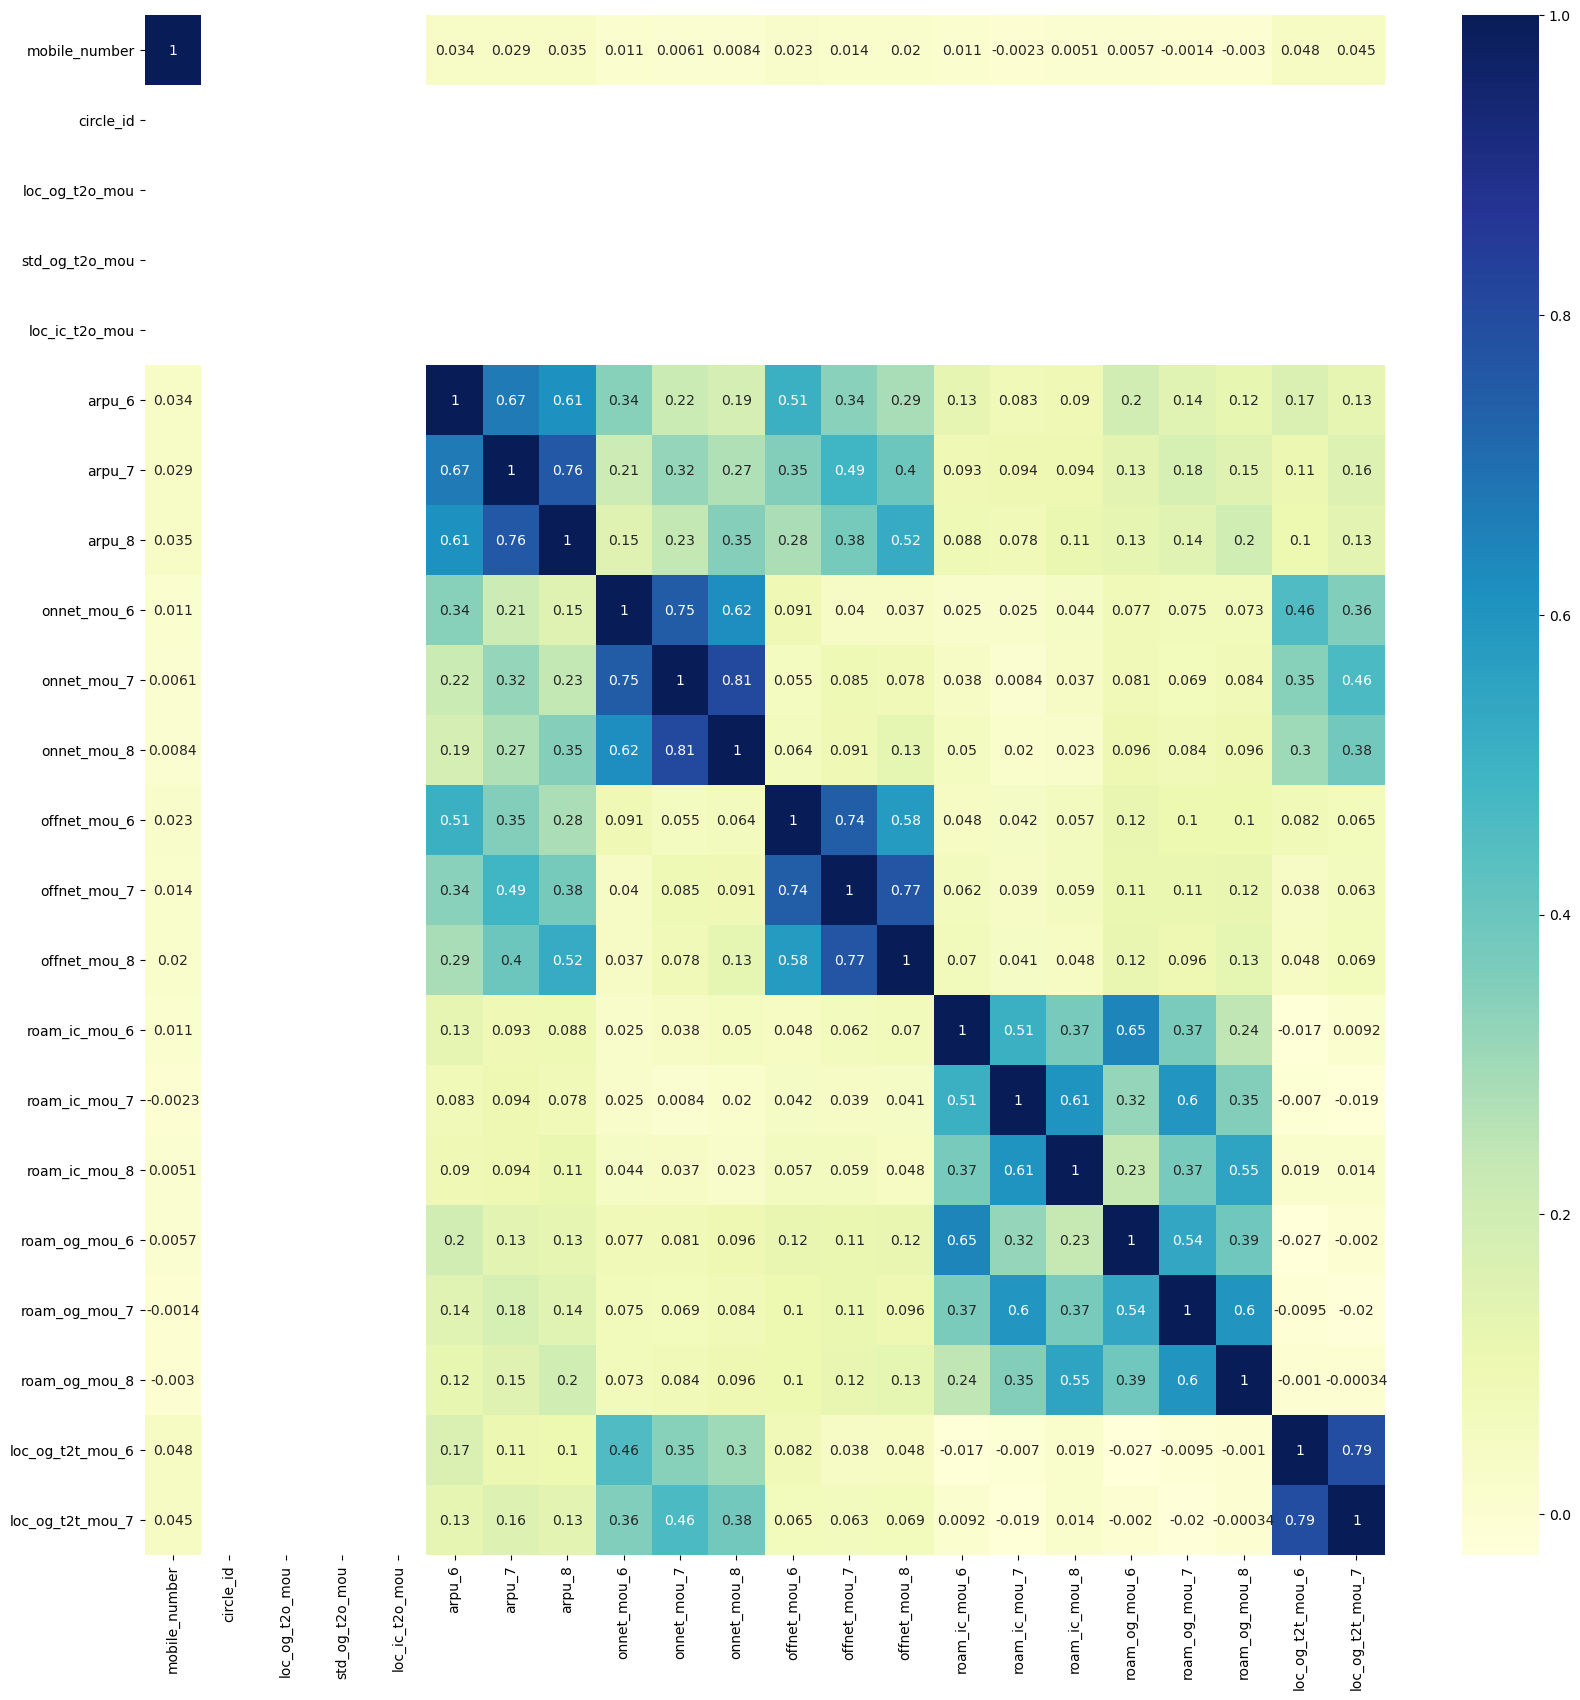

In [42]:
# Let's see the correlation matrix of part 1
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(data=p1.corr(),cmap='YlGnBu',annot=True)
plt.show()

- loc_og_t2t_mou_6, loc_og_t2t_mou_7 are highly correlated.
- arpu_7, arpu_8 are highly correlated.
- onnet_mou_6, onnet_mou_7 are highly correlated.
- onnet_mou_7, onnet_mou_8 are highly correlated.
- offnet_mou_6, offnet_mou_7 are highly correlated.
- offnet_mou_7, offnet_mou_8 are highly correlated.
- For circle_id, loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou - we are not getting any values. Let's see why.

In [43]:
p1.circle_id.value_counts()

109    30001
Name: circle_id, dtype: int64

In [44]:
p1.loc_og_t2o_mou.value_counts()

0.0    30001
Name: loc_og_t2o_mou, dtype: int64

In [45]:
p1.std_og_t2o_mou.value_counts()

0.0    30001
Name: std_og_t2o_mou, dtype: int64

In [46]:
p1.loc_ic_t2o_mou.value_counts()

0.0    30001
Name: loc_ic_t2o_mou, dtype: int64

We can clearly see all these columns have just single values. So it won't be much useful for the prediction. So let's drop them from main table.

In [47]:
# let's drop circle_id, loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou
df.drop(columns=['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'],inplace=True)

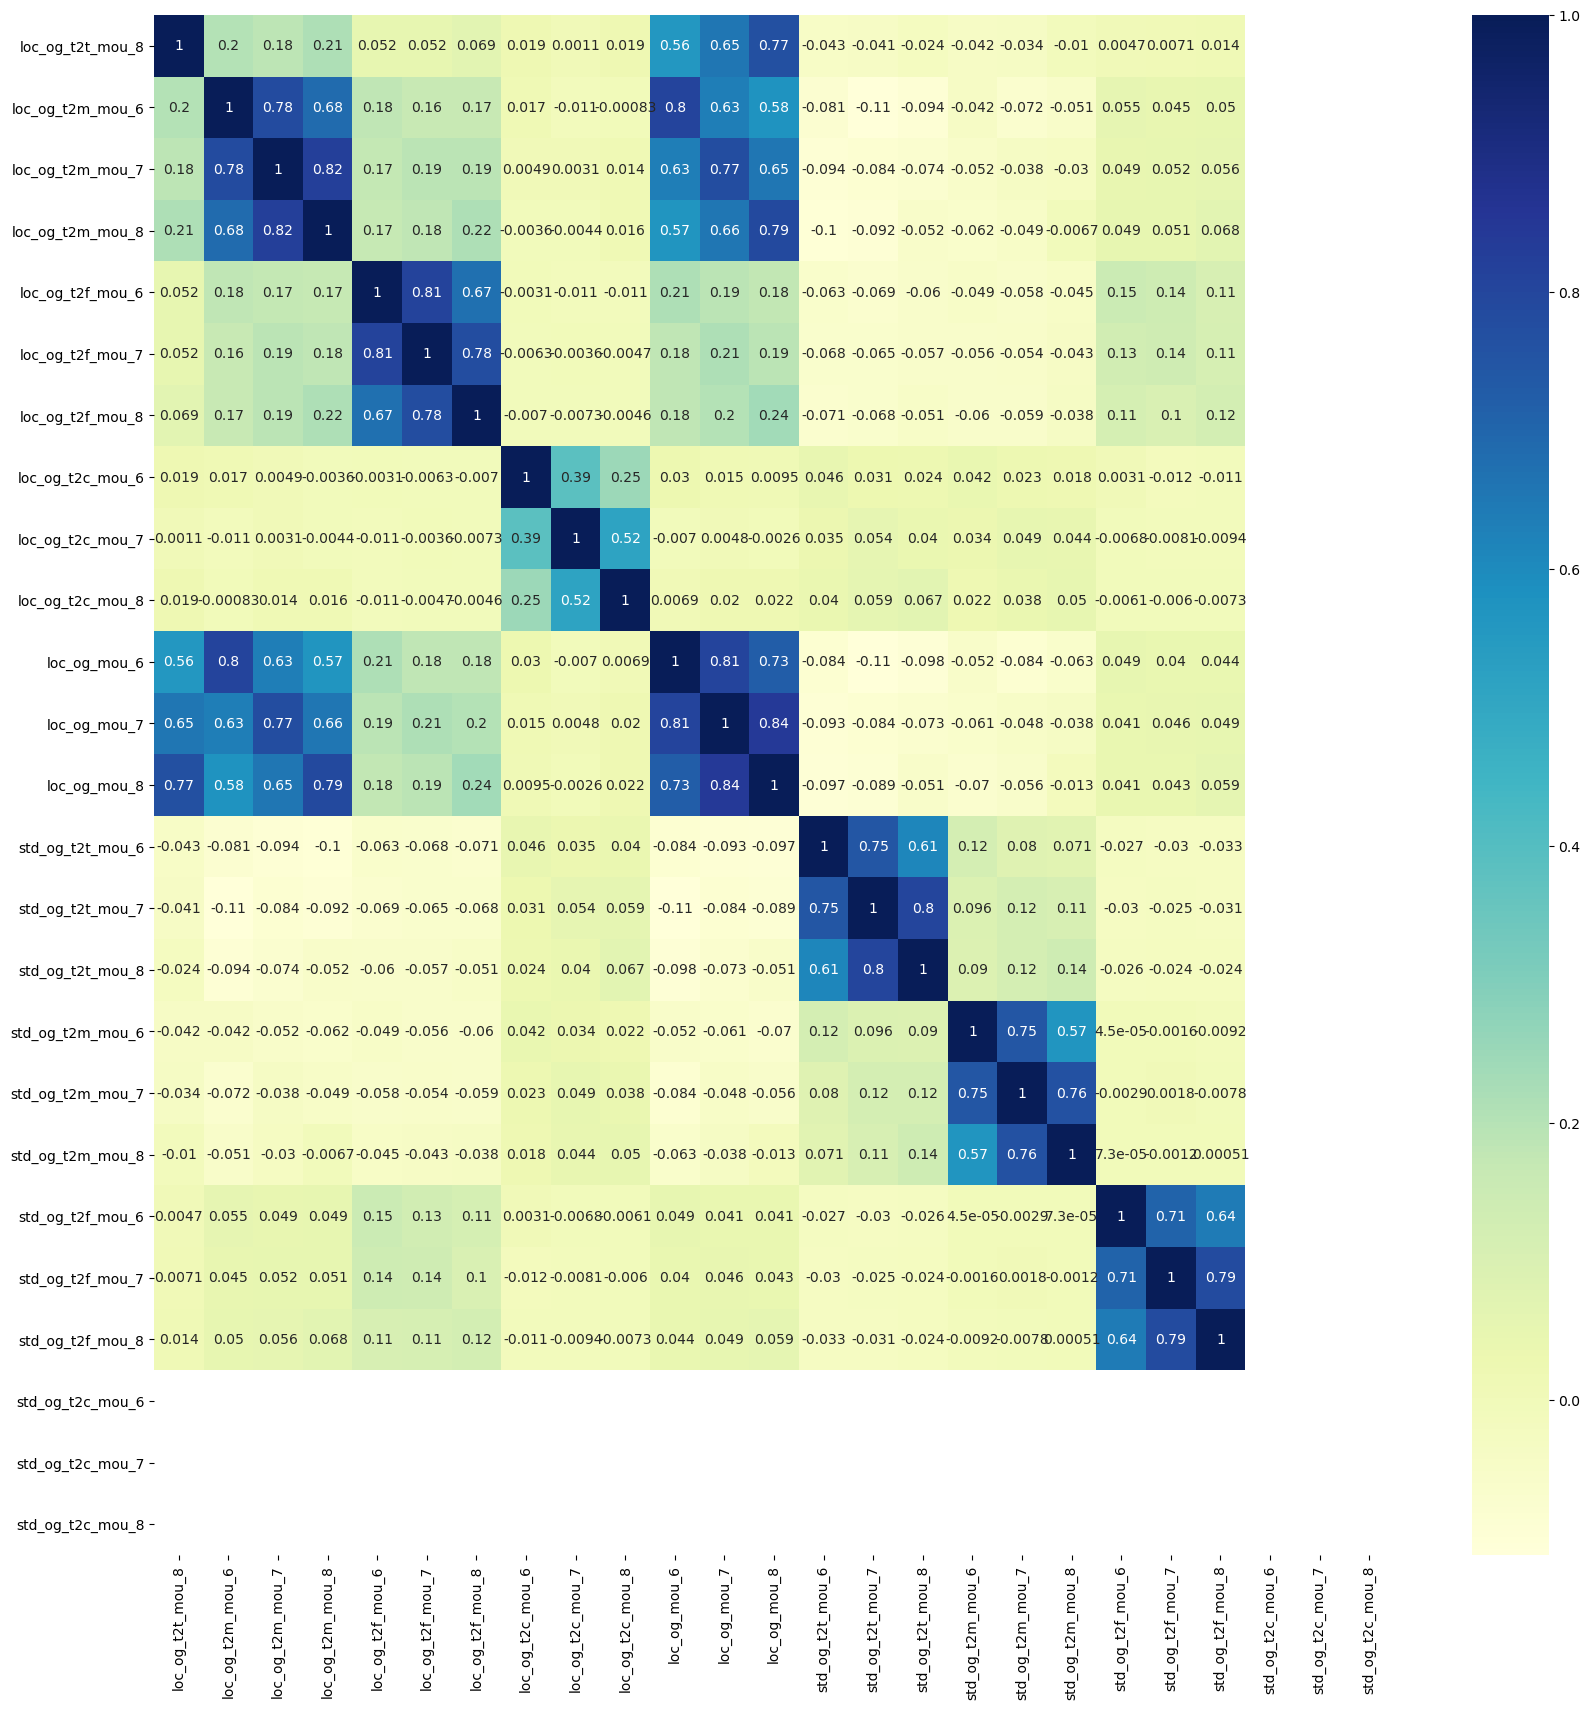

In [48]:
# Let's see the correlation matrix of part 2
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(data=p2.corr(),cmap='YlGnBu',annot=True)
plt.show()

- We can see the diaganol part of the heat map is highly correlated. i.e., Mostly the same features of different months are correlated to each other.
- And as earlier std_og_t2c_mou_6, std_og_t2c_mou_7 & std_og_t2c_mou_8 are being blanks again. Let's check the values.

In [49]:
p2.std_og_t2c_mou_6.value_counts()

0.0    30001
Name: std_og_t2c_mou_6, dtype: int64

In [50]:
p2.std_og_t2c_mou_7.value_counts()

0.0    30001
Name: std_og_t2c_mou_7, dtype: int64

In [51]:
p2.std_og_t2c_mou_8.value_counts()

0.0    30001
Name: std_og_t2c_mou_8, dtype: int64

Again we have just single values. So it won't be much useful for the prediction. So let's drop them from main table.

In [52]:
df.drop(columns=['std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8'],inplace=True)

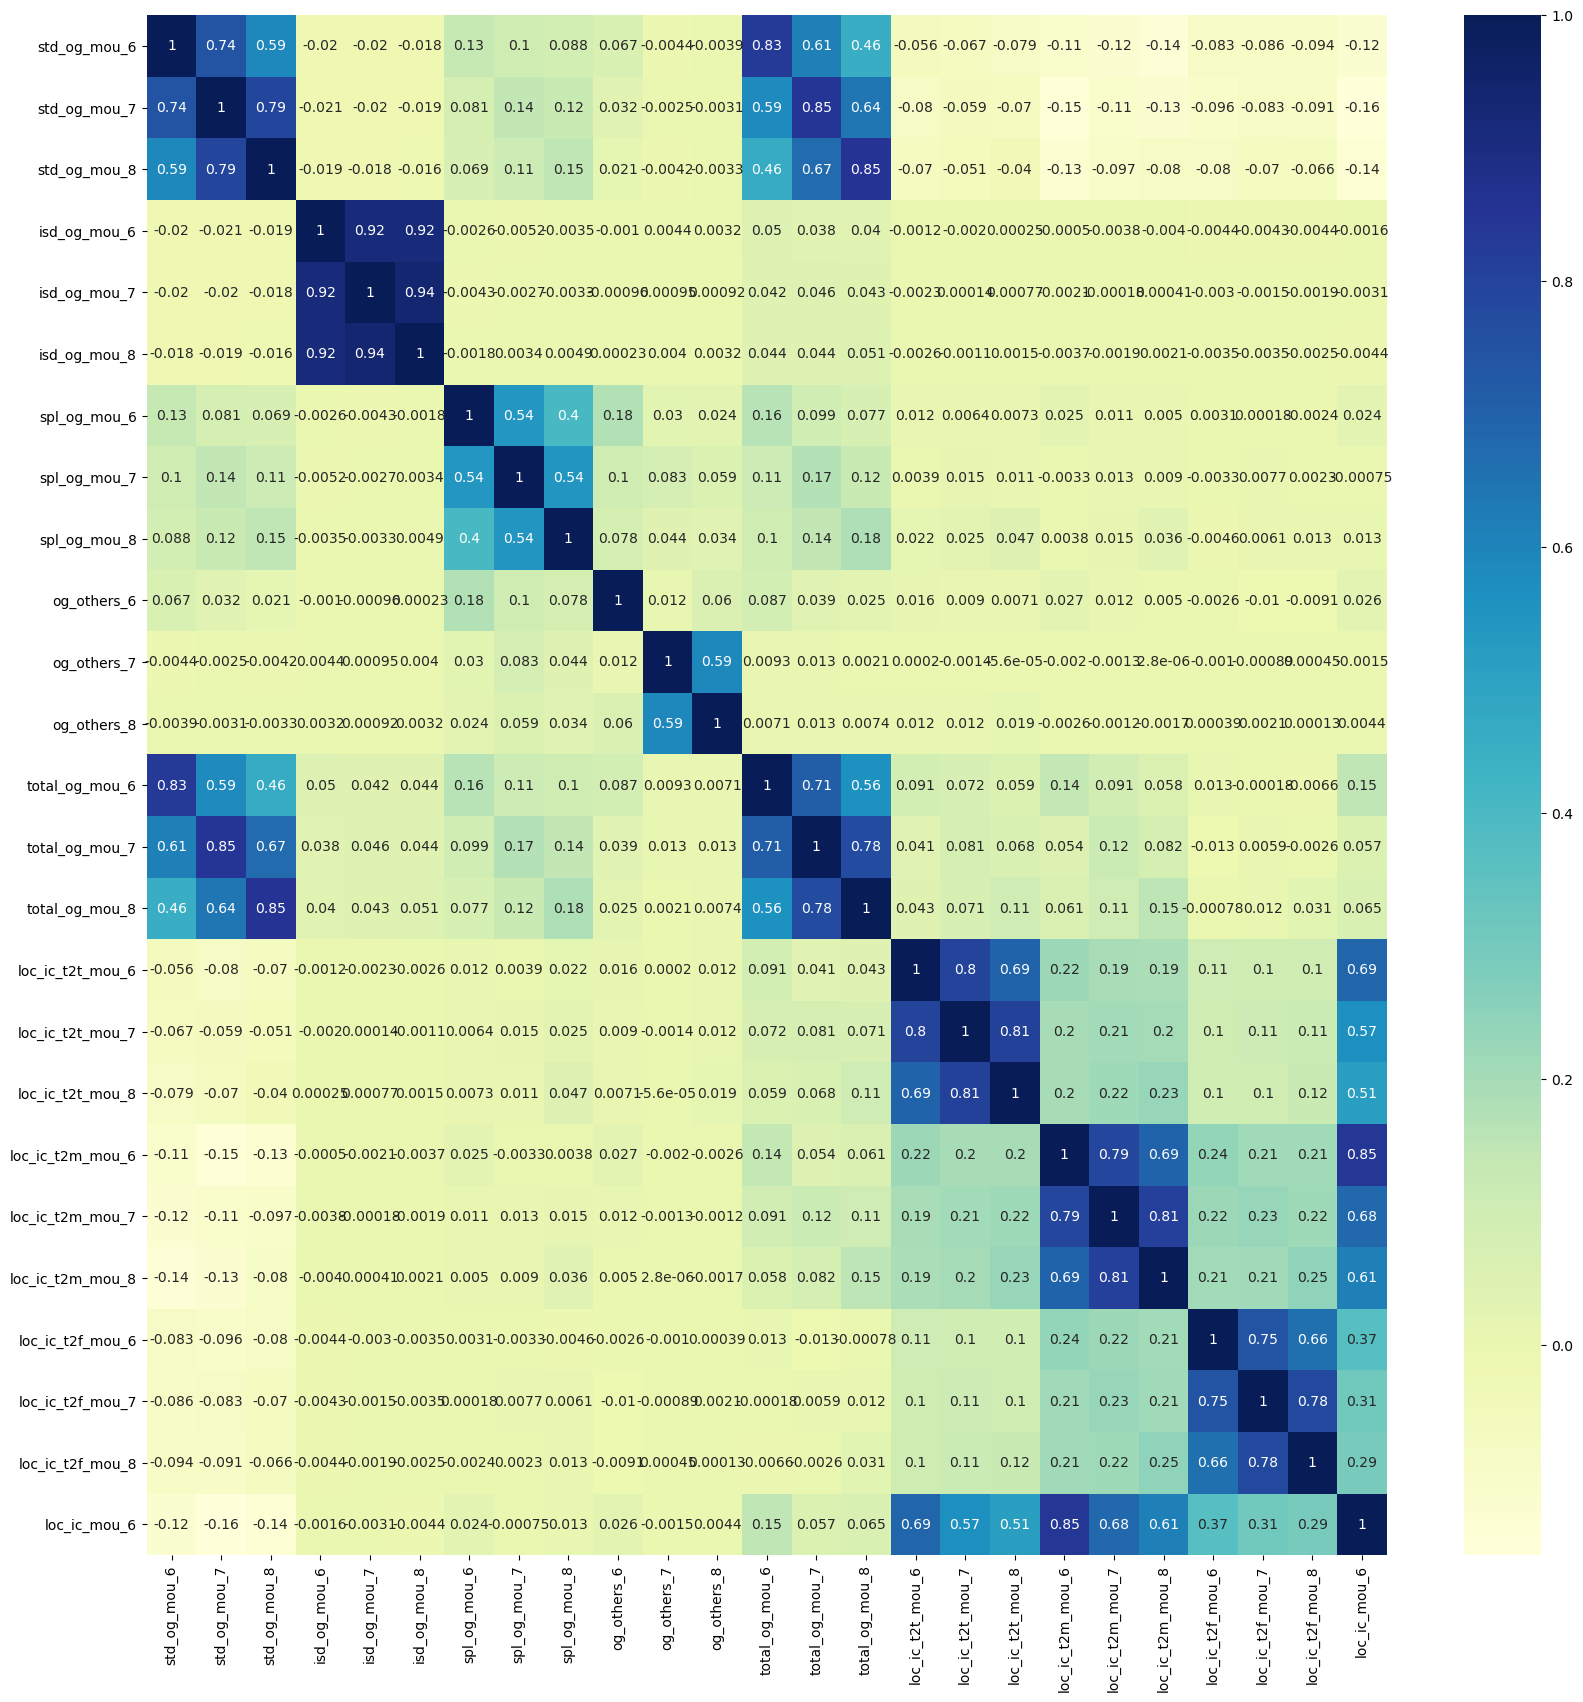

In [53]:
# Let's see the correlation matrix of part 3
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(data=p3.corr(),cmap='YlGnBu',annot=True)
plt.show()

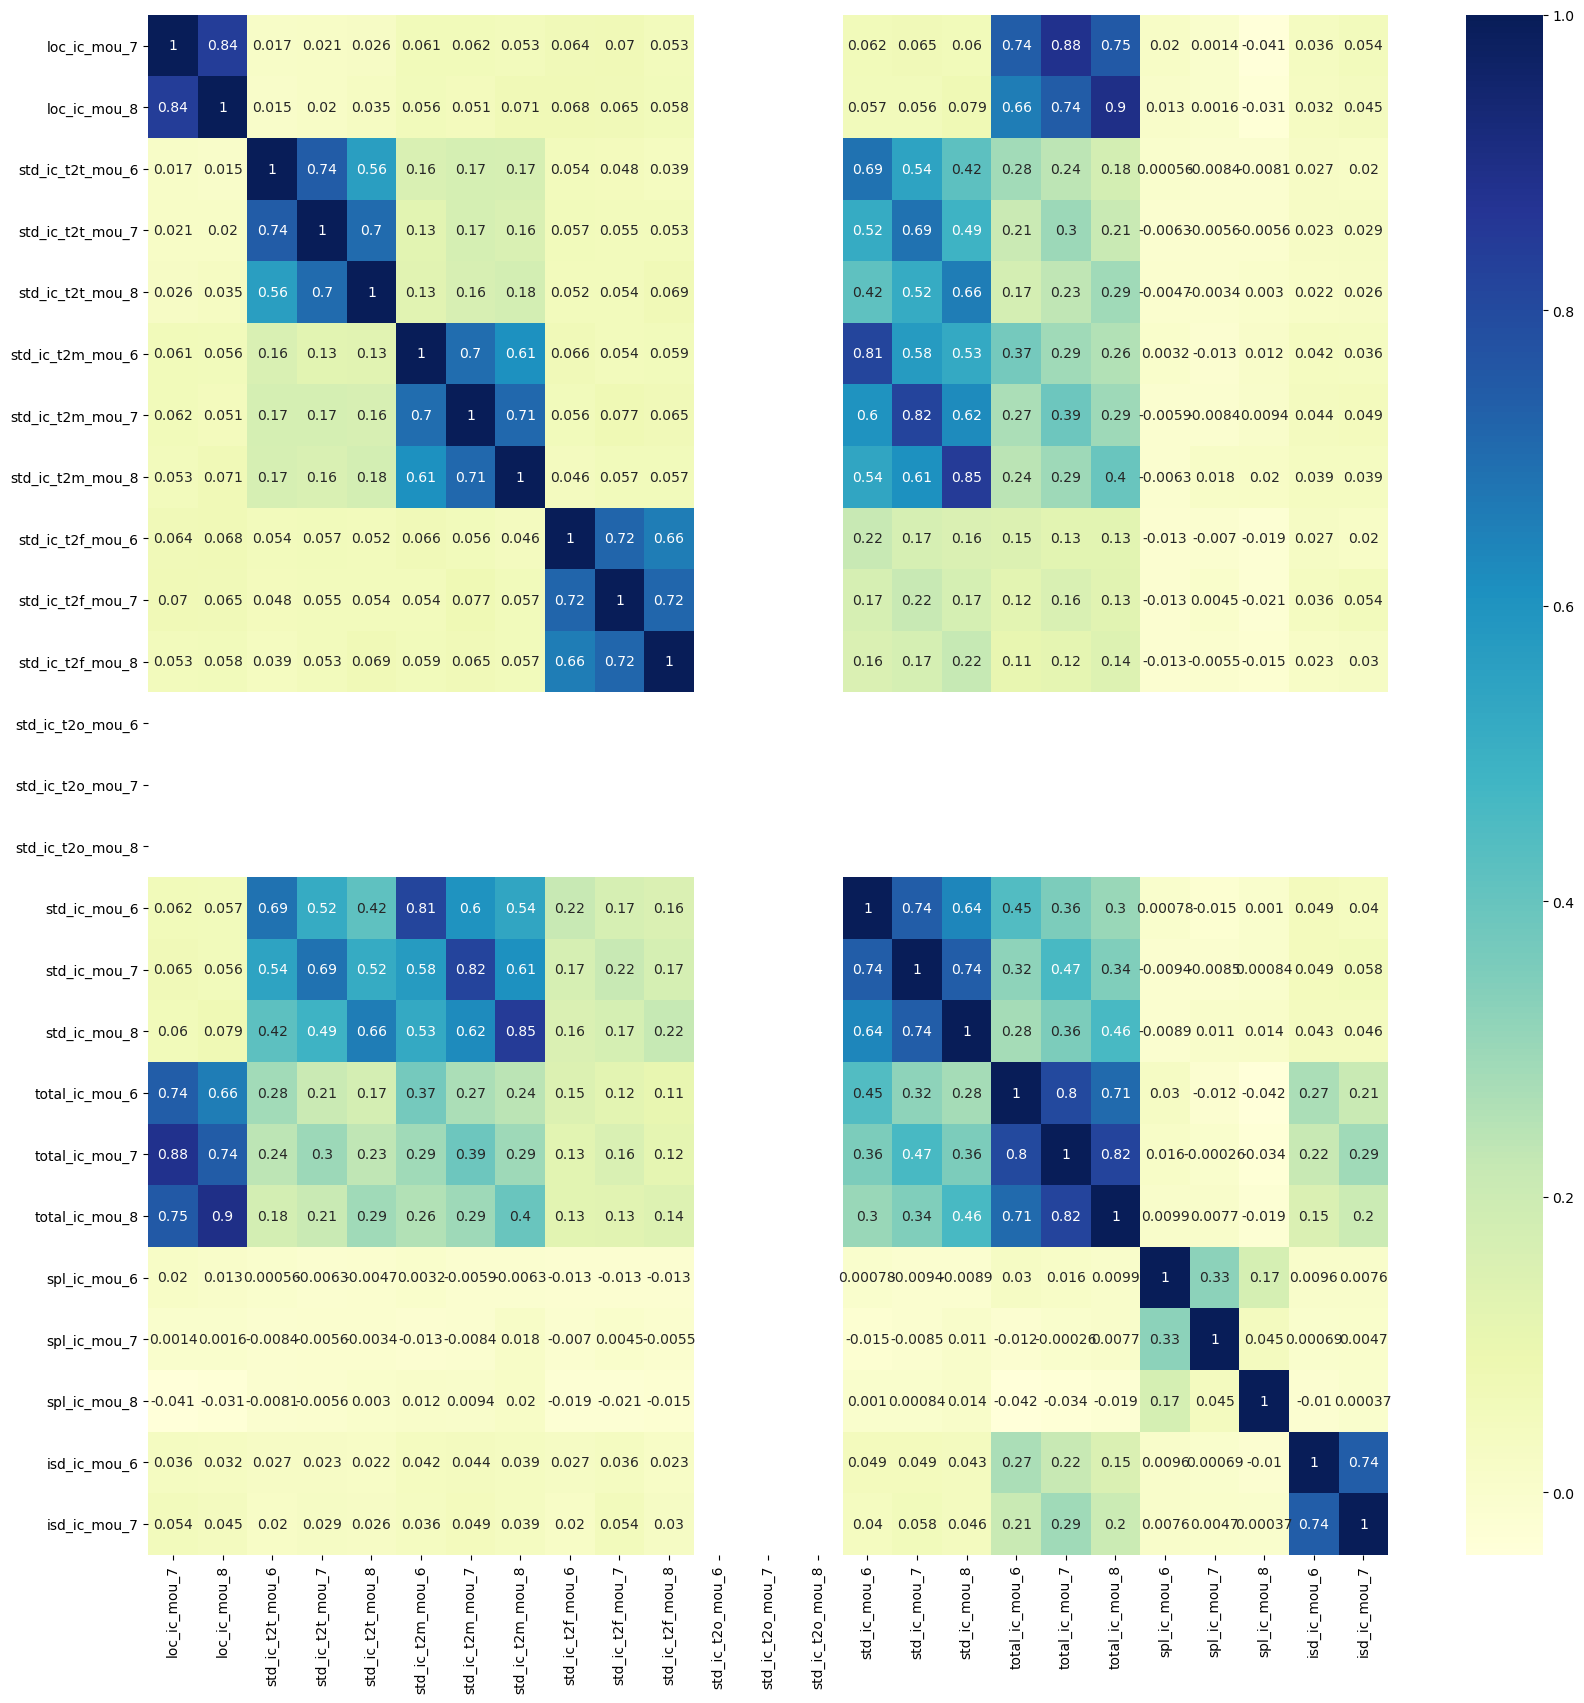

In [54]:
# Let's see the correlation matrix of part 4
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(data=p4.corr(),cmap='YlGnBu',annot=True)
plt.show()

- As earlier diaganol part of the heat map is highly correlated. i.e., Mostly the same features of different months are correlated to each other.
- And same kind of features also highly correlated, like total_ic_mou_7 and loc_ic_mou_7.
- And as earlier std_ic_t2o_mou_6, std_ic_t2o_mou_7 & std_ic_t2o_mou_8 are being blanks again. Let's check the values.

In [55]:
p4.std_ic_t2o_mou_6.value_counts()

0.0    30001
Name: std_ic_t2o_mou_6, dtype: int64

In [56]:
p4.std_ic_t2o_mou_7.value_counts()

0.0    30001
Name: std_ic_t2o_mou_7, dtype: int64

In [57]:
p4.std_ic_t2o_mou_8.value_counts()

0.0    30001
Name: std_ic_t2o_mou_8, dtype: int64

In [58]:
# Since we have single values again, Dropping them 
df.drop(columns=['std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],inplace=True)

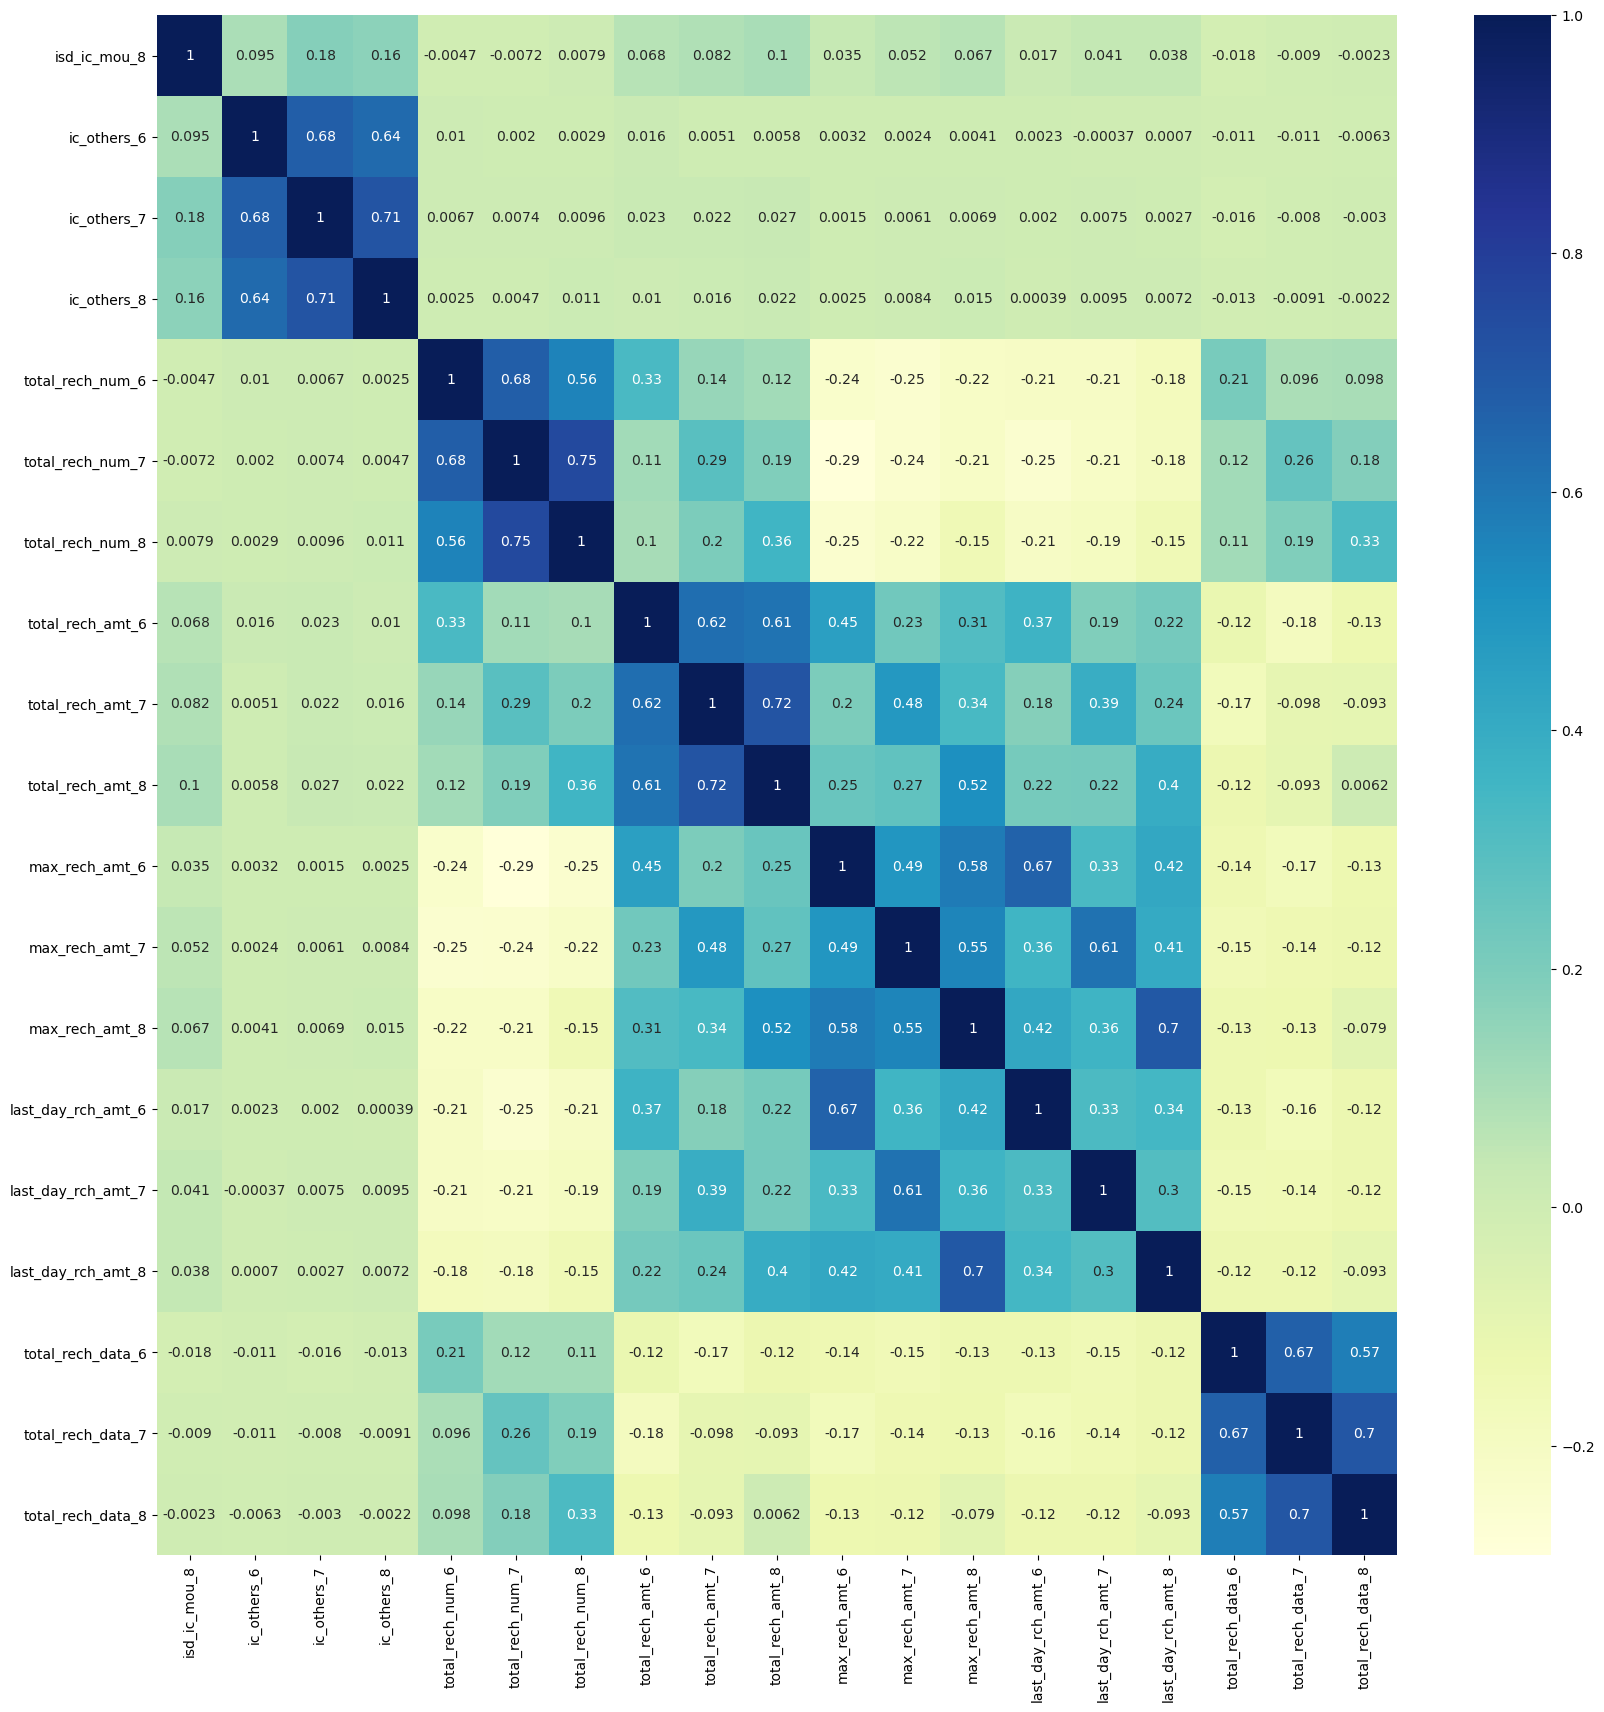

In [59]:
# Let's see the correlation matrix of part 5
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(data=p5.corr(),cmap='YlGnBu',annot=True)
plt.show()

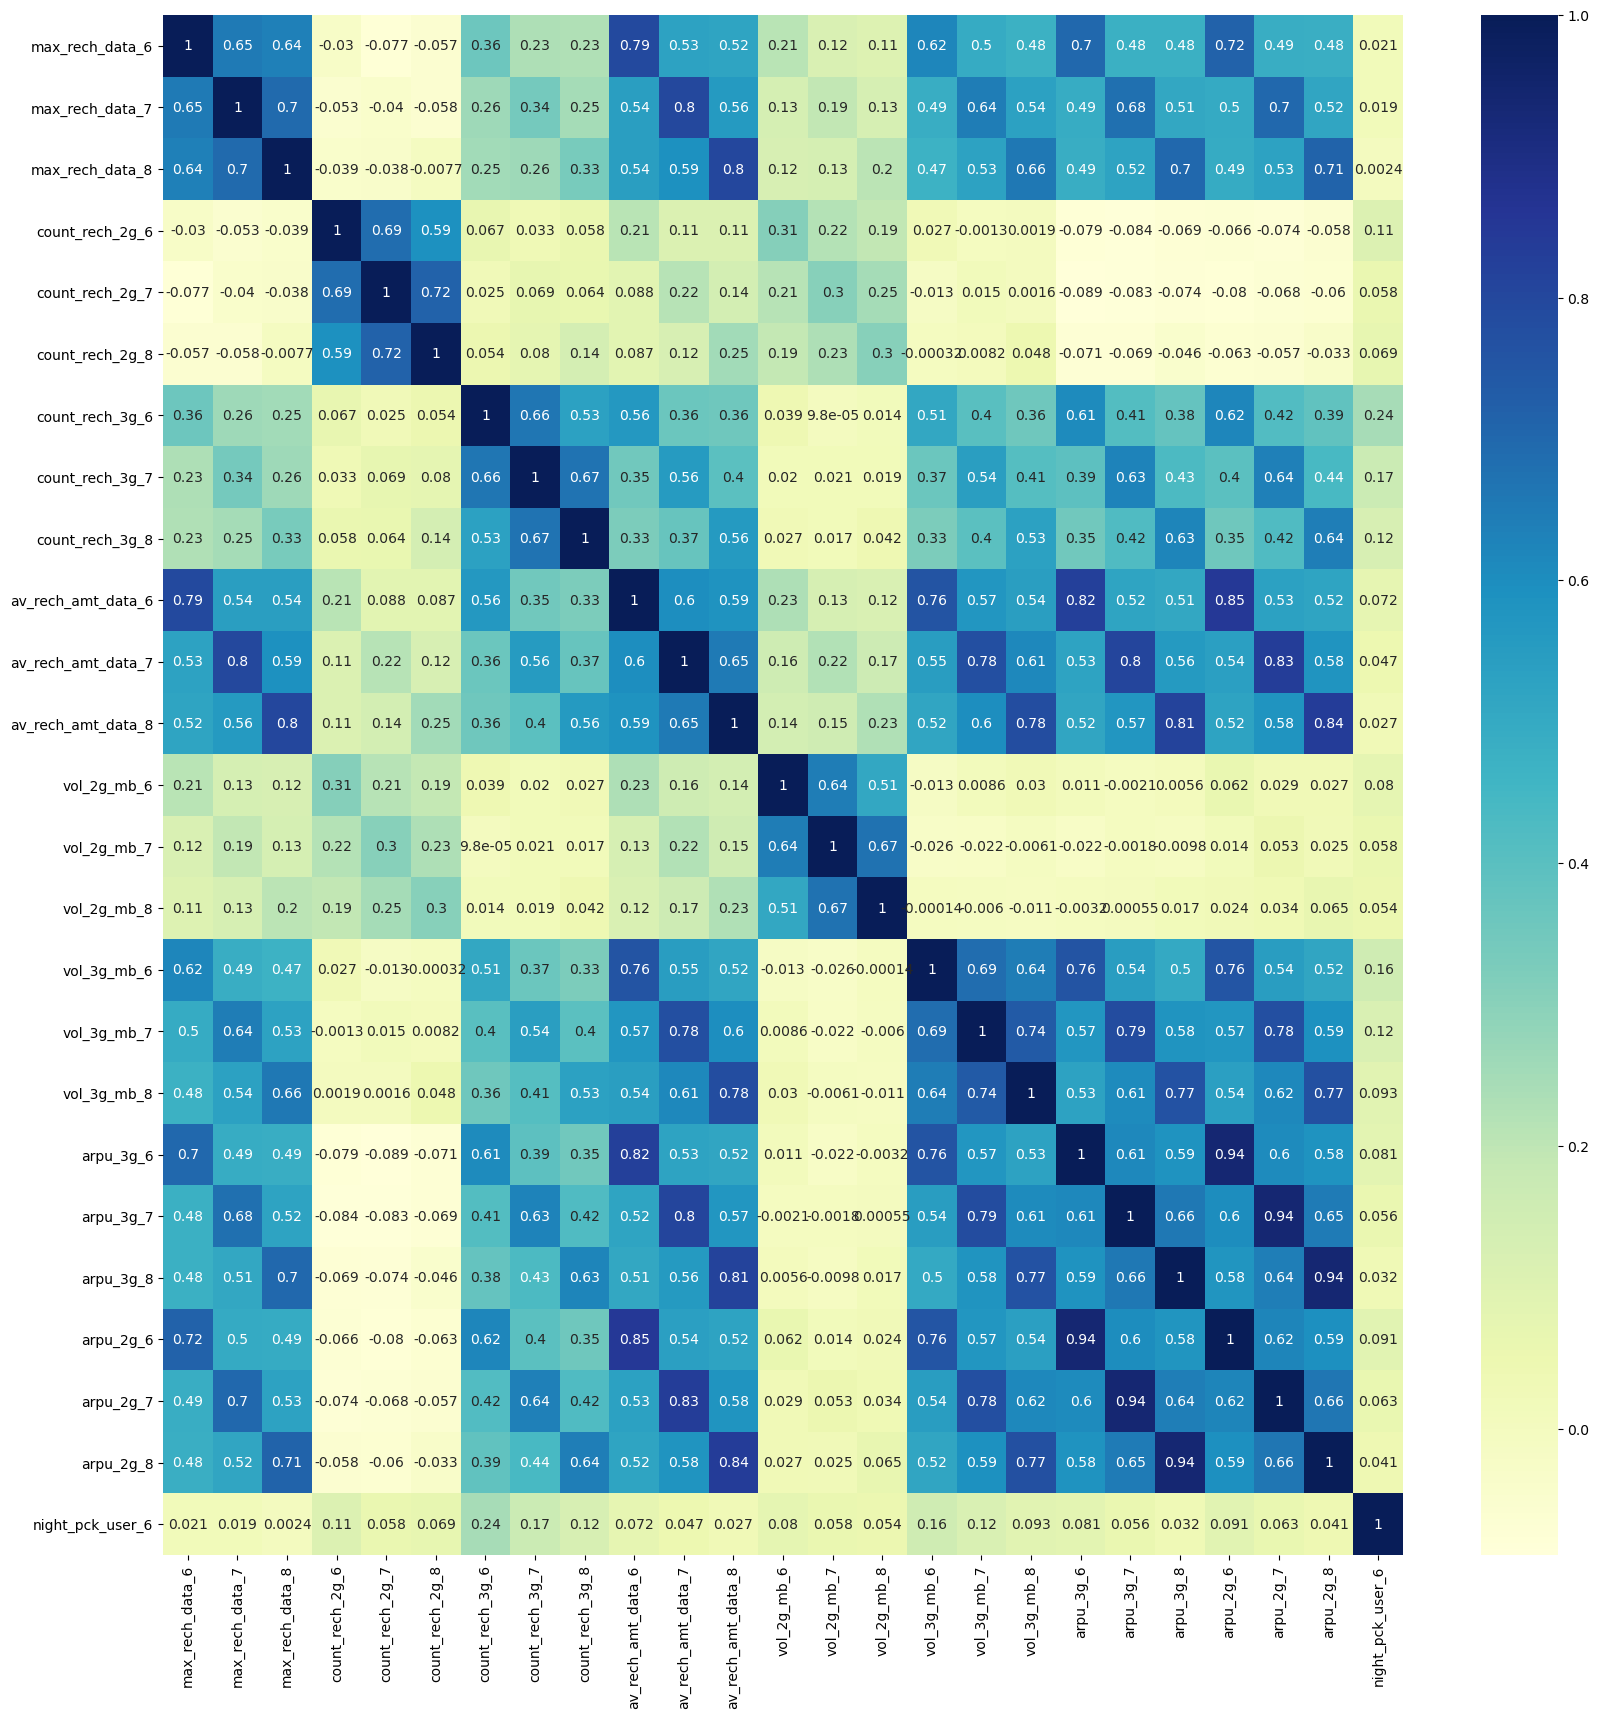

In [60]:
# Let's see the correlation matrix of part 6
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(data=p6.corr(),cmap='YlGnBu',annot=True)
plt.show()

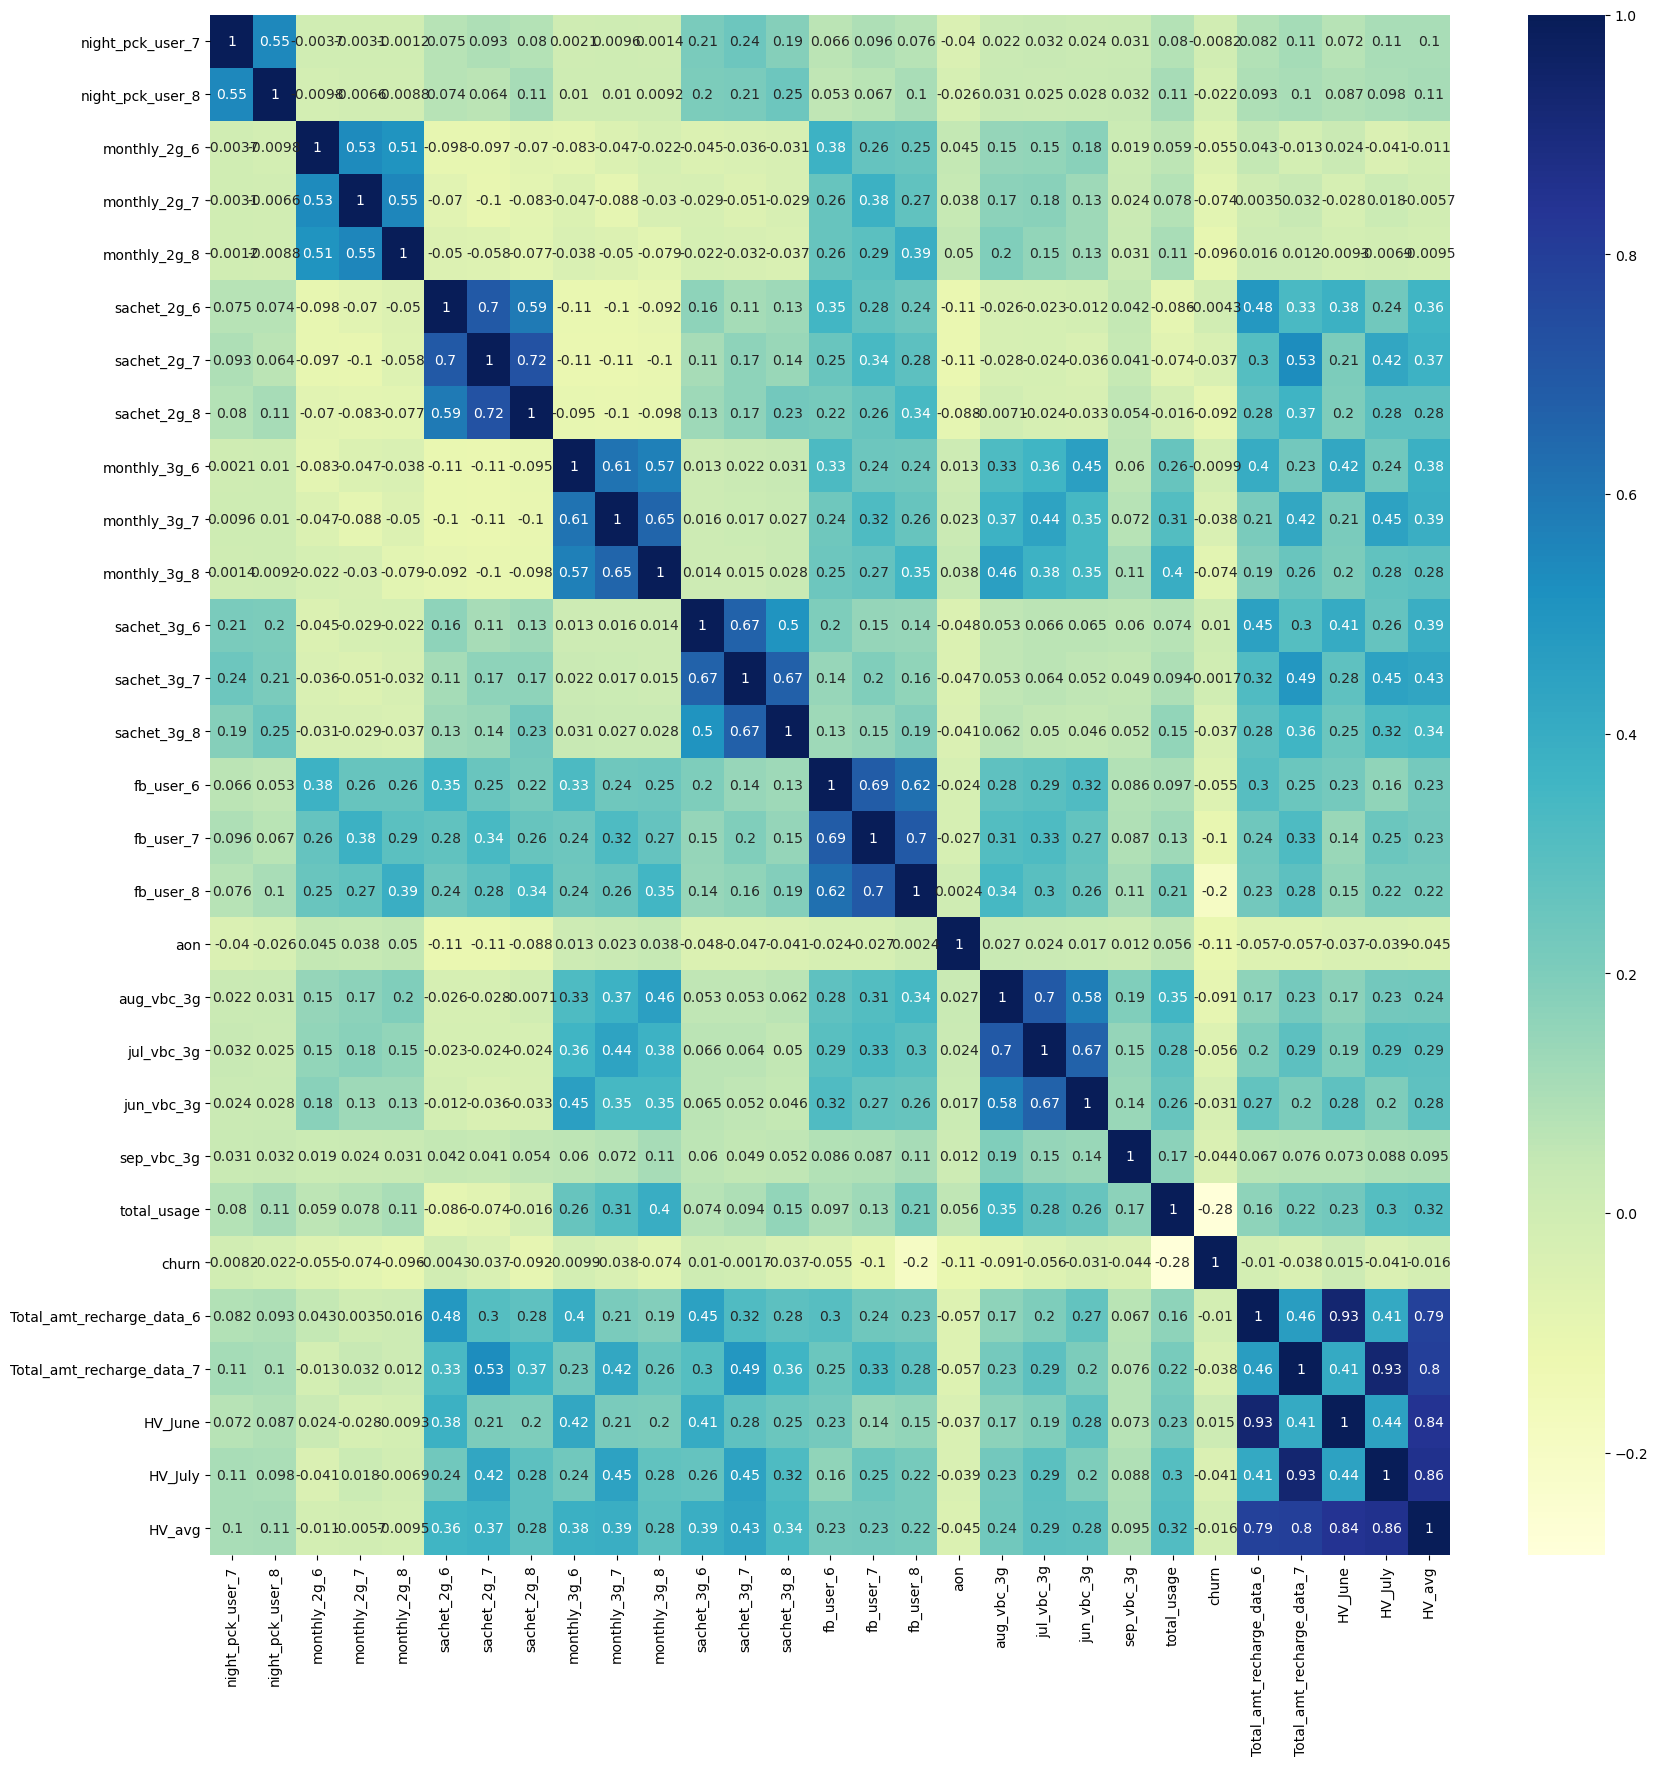

In [61]:
# Let's see the correlation matrix of part 7
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(data=p7.corr(),cmap='YlGnBu',annot=True)
plt.show()

- We can see very high correlation going on between many features. Since we are using `PCA` I am not going to handle highly correlated variables here.
- We have eliminated columns which have only single value.
- So not going to continue with the other dataframe pairs like p1 vs p2. Since we are using `PCA` and each variable is covered.

In [62]:
# Getting all the categorical variables.
categorical = df.select_dtypes(include=['object'])

In [63]:
# Let's see the distinct value count in each of them
categorical.nunique()

last_date_of_month_6         1
last_date_of_month_7         2
last_date_of_month_8         2
date_of_last_rech_6         31
date_of_last_rech_7         32
date_of_last_rech_8         32
date_of_last_rech_data_6    31
date_of_last_rech_data_7    32
date_of_last_rech_data_8    32
dtype: int64

In [64]:
# Let's check last_date_of_month_6 again
categorical.last_date_of_month_6.value_counts()

6/30/2014    30001
Name: last_date_of_month_6, dtype: int64

In [65]:
# Let's check last_date_of_month_7 again
categorical.last_date_of_month_7.value_counts()

7/31/2014    29974
0               27
Name: last_date_of_month_7, dtype: int64

In [66]:
# Let's check last_date_of_month_8 again
categorical.last_date_of_month_8.value_counts()

8/31/2014    29836
0              165
Name: last_date_of_month_8, dtype: int64

In [67]:
# Dropping all the three columns from main dataframe and categorical dataframe. since it have only single value or zeros which is probably null values.
categorical.drop(columns=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],inplace=True)
df.drop(columns=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],inplace=True)
categorical

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0               6/21/2014           7/16/2014          08-08-2014   
7               6/27/2014           7/25/2014           8/26/2014   
8               6/25/2014           7/31/2014           8/30/2014   
21              6/30/2014           7/31/2014           8/31/2014   
23              6/18/2014          07-07-2014           8/24/2014   
...                   ...                 ...                 ...   
99981           6/17/2014           7/25/2014           8/27/2014   
99984           6/21/2014           7/31/2014           8/27/2014   
99986           6/20/2014           7/28/2014           8/18/2014   
99988           6/30/2014           7/28/2014           8/29/2014   
99997           6/17/2014           7/19/2014           8/20/2014   

      date_of_last_rech_data_6 date_of_last_rech_data_7  \
0                    6/21/2014                7/16/2014   
7                            0                        0   
8                            0                7/31/2014   
21                           0                        0   
23                           0               07-07-2014   
...                        ...                      ...   
99981                6/17/2014                7/14/2014   
99984                6/15/2014                7/31/2014   
99986                6/17/2014                7/18/2014   
99988                        0                7/26/2014   
99997                6/17/2014                7/19/2014   

      date_of_last_rech_data_8  
0                   08-08-2014  
7                            0  
8                    8/23/2014  
21                           0  
23                  08-06-2014  
...                        ...  
99981                8/23/2014  
99984                8/27/2014  
99986                8/14/2014  
99988                8/23/2014  
99997                8/20/2014  

[30001 rows x 6 columns]

Since we have only date columns, Will change it to continuous variable.

In [68]:
# Let's start with the date_of_last_rech_6 variable
df['date_of_last_rech_6'] = df['date_of_last_rech_6'].astype(str)

In [69]:
# Getting only numbers
df['date_of_last_rech_6'] = df['date_of_last_rech_6'].str.replace('\D', '').astype(str)

In [70]:
# Removing the year
df['date_of_last_rech_6'] = df['date_of_last_rech_6'].apply(lambda x: x[:-4])

In [71]:
# Handling null values and imputing them with the mode.
df['date_of_last_rech_6'] = df['date_of_last_rech_6'].apply(lambda x: df['date_of_last_rech_6'].mode() if x =='' else x)

In [72]:
# Converting to continuous variable.
df['date_of_last_rech_6'] = df['date_of_last_rech_6'].astype(int)

In [73]:
# Value spread of date_of_last_rech_6
df['date_of_last_rech_6'].value_counts()

630    8449
629    5333
628    3666
627    3160
626    1827
625    1324
624    1042
623     703
621     639
614     549
622     526
617     456
620     398
618     388
619     387
612     213
613     210
616     203
615     141
611      81
608      61
607      47
610      47
605      33
609      27
603      25
606      24
604      19
602      13
601      10
Name: date_of_last_rech_6, dtype: int64

In [74]:
# Let's do the same for date_of_last_rech_7
df['date_of_last_rech_7'] = df['date_of_last_rech_7'].astype(str)
df['date_of_last_rech_7'] = df['date_of_last_rech_7'].str.replace('\D', '').astype(str)
df['date_of_last_rech_7'] = df['date_of_last_rech_7'].apply(lambda x: x[:-4])
df['date_of_last_rech_7'] = df['date_of_last_rech_7'].apply(lambda x: df['date_of_last_rech_7'].mode() if x =='' else x)
df['date_of_last_rech_7'] = df['date_of_last_rech_7'].astype(int)
df['date_of_last_rech_7'].value_counts()

731    7708
730    5287
729    3476
728    2793
725    1926
727    1789
726    1601
724     927
722     653
715     587
723     563
716     457
720     421
721     391
719     367
717     291
718     252
710      73
714      71
709      71
712      59
713      56
711      51
707      26
708      25
706      23
704      17
703      14
705      12
701       9
702       5
Name: date_of_last_rech_7, dtype: int64

In [75]:
# Let's do the same for date_of_last_rech_8
df['date_of_last_rech_8'] = df['date_of_last_rech_8'].astype(str)
df['date_of_last_rech_8'] = df['date_of_last_rech_8'].str.replace('\D', '').astype(str)
df['date_of_last_rech_8'] = df['date_of_last_rech_8'].apply(lambda x: x[:-4])
df['date_of_last_rech_8'] = df['date_of_last_rech_8'].apply(lambda x: df['date_of_last_rech_8'].mode() if x =='' else x)
df['date_of_last_rech_8'] = df['date_of_last_rech_8'].astype(int)
df['date_of_last_rech_8'].value_counts()

831    6783
830    4632
829    3364
828    3057
826    2288
825    2165
827    1856
824    1309
822     535
823     507
820     491
819     428
821     394
818     262
815     194
814     191
816     181
817     172
813     142
809     134
812     131
805     130
811     123
808     113
806      92
810      89
807      76
801      61
802      38
804      33
803      30
Name: date_of_last_rech_8, dtype: int64

In [76]:
# Let's do the same for date_of_last_rech_data_6
df['date_of_last_rech_data_6'] = df['date_of_last_rech_data_6'].astype(str)
df['date_of_last_rech_data_6'] = df['date_of_last_rech_data_6'].str.replace('\D', '').astype(str)
df['date_of_last_rech_data_6'] = df['date_of_last_rech_data_6'].apply(lambda x: x[:-4])
df['date_of_last_rech_data_6'].value_counts()

        13245
630      1553
629      1307
628      1281
626      1054
627      1005
625       791
624       761
623       585
622       573
621       559
617       543
619       514
618       496
620       489
616       442
614       438
0612      388
0611      378
615       377
613       368
0610      360
0605      348
0606      346
0609      331
0607      290
0603      289
0604      272
0608      271
0602      200
0601      147
Name: date_of_last_rech_data_6, dtype: int64

In [77]:
# Since the mode is null, imputing null values with just zeros
df['date_of_last_rech_data_6'] = df['date_of_last_rech_data_6'].apply(lambda x: '000' if x =='' else x)
df['date_of_last_rech_data_6'] = df['date_of_last_rech_data_6'].astype(int)
df['date_of_last_rech_data_6'].value_counts()

0      13245
630     1553
629     1307
628     1281
626     1054
627     1005
625      791
624      761
623      585
622      573
621      559
617      543
619      514
618      496
620      489
616      442
614      438
612      388
611      378
615      377
613      368
610      360
605      348
606      346
609      331
607      290
603      289
604      272
608      271
602      200
601      147
Name: date_of_last_rech_data_6, dtype: int64

In [78]:
# Let's do the same for date_of_last_rech_data_7
df['date_of_last_rech_data_7'] = df['date_of_last_rech_data_7'].astype(str)
df['date_of_last_rech_data_7'] = df['date_of_last_rech_data_7'].str.replace('\D', '').astype(str)
df['date_of_last_rech_data_7'] = df['date_of_last_rech_data_7'].apply(lambda x: x[:-4])
df['date_of_last_rech_data_7'].value_counts()

        12944
731      1460
730      1355
729      1348
728      1214
726       909
727       908
725       718
724       603
722       563
723       561
721       547
719       483
718       477
714       463
720       458
717       445
716       432
715       373
0709      364
0710      364
0707      363
713       358
0712      358
0708      320
0711      316
0705      284
0704      254
0706      241
0703      205
0702      161
0701      152
Name: date_of_last_rech_data_7, dtype: int64

In [79]:
# Since the mode is null, imputing null values with just zeros
df['date_of_last_rech_data_7'] = df['date_of_last_rech_data_7'].apply(lambda x: '000' if x =='' else x)
df['date_of_last_rech_data_7'] = df['date_of_last_rech_data_7'].astype(int)
df['date_of_last_rech_data_7'].value_counts()

0      12944
731     1460
730     1355
729     1348
728     1214
726      909
727      908
725      718
724      603
722      563
723      561
721      547
719      483
718      477
714      463
720      458
717      445
716      432
715      373
709      364
710      364
707      363
713      358
712      358
708      320
711      316
705      284
704      254
706      241
703      205
702      161
701      152
Name: date_of_last_rech_data_7, dtype: int64

In [80]:
# Let's do the same for date_of_last_rech_data_8
df['date_of_last_rech_data_8'] = df['date_of_last_rech_data_8'].astype(str)
df['date_of_last_rech_data_8'] = df['date_of_last_rech_data_8'].str.replace('\D', '').astype(str)
df['date_of_last_rech_data_8'] = df['date_of_last_rech_data_8'].apply(lambda x: x[:-4])
df['date_of_last_rech_data_8'].value_counts()

        14048
831      1304
830      1275
829      1070
828       820
827       798
825       751
826       716
824       636
823       561
819       533
822       464
821       457
820       455
818       450
815       425
816       423
0811      414
814       414
813       397
0810      389
0809      382
0808      380
817       377
0812      336
0807      326
0806      324
0804      279
0805      274
0803      193
0802      177
0801      153
Name: date_of_last_rech_data_8, dtype: int64

In [81]:
# Since the mode is null, imputing null values with just zeros
df['date_of_last_rech_data_8'] = df['date_of_last_rech_data_8'].apply(lambda x: '000' if x =='' else x)
df['date_of_last_rech_data_8'] = df['date_of_last_rech_data_8'].astype(int)
df['date_of_last_rech_data_8'].value_counts()

0      14048
831     1304
830     1275
829     1070
828      820
827      798
825      751
826      716
824      636
823      561
819      533
822      464
821      457
820      455
818      450
815      425
816      423
811      414
814      414
813      397
810      389
809      382
808      380
817      377
812      336
807      326
806      324
804      279
805      274
803      193
802      177
801      153
Name: date_of_last_rech_data_8, dtype: int64

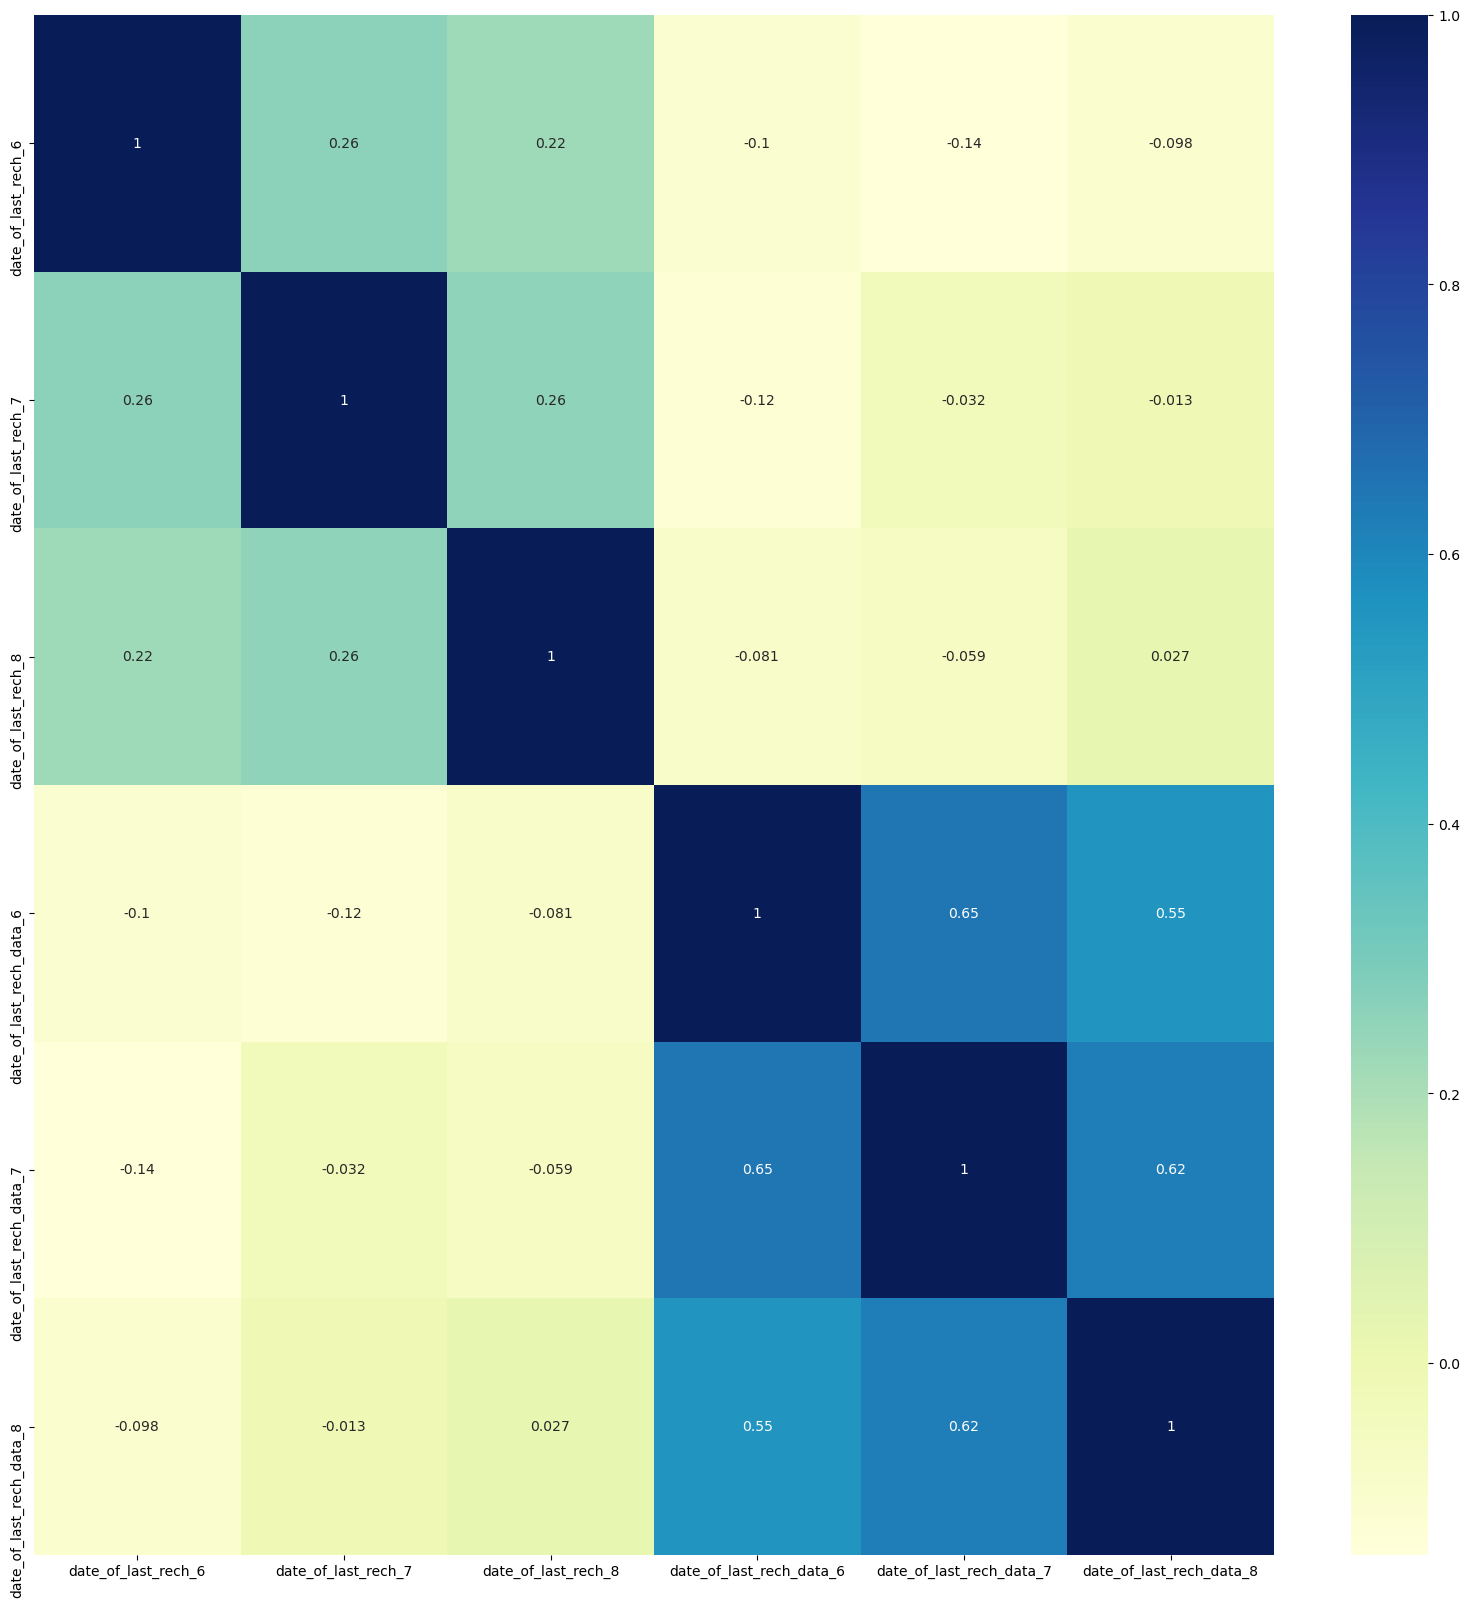

In [82]:
# Let's see the correlation matrix of the newly created variables
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(data=df[categorical.columns].corr(),cmap='YlGnBu',annot=True)
plt.show()

There was not much correlation between the variables here.

### Step 3: Data Preparation

In [83]:
# Let's see what data we have now
df.shape

(30001, 166)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 166 entries, mobile_number to HV_avg
dtypes: float64(133), int32(6), int64(27)
memory usage: 37.5 MB


We can conform here, Now we have only numerical data in our dataset.

In [85]:
# Let's recheck null values again
df.isnull().sum()

mobile_number                0
arpu_6                       0
arpu_7                       0
arpu_8                       0
onnet_mou_6                  0
onnet_mou_7                  0
onnet_mou_8                  0
offnet_mou_6                 0
offnet_mou_7                 0
offnet_mou_8                 0
roam_ic_mou_6                0
roam_ic_mou_7                0
roam_ic_mou_8                0
roam_og_mou_6                0
roam_og_mou_7                0
roam_og_mou_8                0
loc_og_t2t_mou_6             0
loc_og_t2t_mou_7             0
loc_og_t2t_mou_8             0
loc_og_t2m_mou_6             0
loc_og_t2m_mou_7             0
loc_og_t2m_mou_8             0
loc_og_t2f_mou_6             0
loc_og_t2f_mou_7             0
loc_og_t2f_mou_8             0
loc_og_t2c_mou_6             0
loc_og_t2c_mou_7             0
loc_og_t2c_mou_8             0
loc_og_mou_6                 0
loc_og_mou_7                 0
loc_og_mou_8                 0
std_og_t2t_mou_6             0
std_og_t

In [86]:
#Let's check the mobile_number value spread
df.mobile_number.nunique()

30001

In [87]:
# Since it is like a primary key i.e., Unique for all the rows. We don't need them for our analysis.
df.drop(columns='mobile_number',inplace=True)
df_other_model = df.copy(deep=True)

### Feature Standardisation

In [92]:
# Let's apply standardisation with all the predictor variables. So let's pop out the churn variable.
Y = df.pop('churn')

In [90]:
# standardisation of all the columns
df=(df-df.mean())/df.std()
df.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  -0.783921 -0.721098 -0.587285    -0.567380    -0.557964    -0.510663   
7   1.108650  1.644656  5.304948    -0.441544    -0.444046    -0.396604   
8  -0.390261 -0.142898 -0.739570     0.332642     0.173358    -0.434144   
21 -0.095601  0.077058  0.257314    -0.344577    -0.282731    -0.324949   
23 -1.051017 -0.764700 -0.282157    -0.460863    -0.452421    -0.437416   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0      -0.774457     -0.757838     -0.695090      -0.211139      -0.166819   
7       0.165248      0.378929     -0.019016       0.001568       0.275084   
8      -0.578280     -0.596230     -0.411974      -0.211139      -0.166819   
21      0.796305      1.039391      1.344873      -0.211139      -0.166819   
23     -0.597451     -0.578732     -0.267988      -0.211139      -0.166819   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0       -0.168641      -0.228660      -0.209698      -0.189704   
7        0.258204      -0.024367      -0.078689       0.173745   
8       -0.168641      -0.228660      -0.209698      -0.189704   
21      -0.168641      -0.228660      -0.209698      -0.189704   
23      -0.168641      -0.228660      -0.209698      -0.189704   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0          -0.369261         -0.356196         -0.343387         -0.652669   
7          -0.144649         -0.225731         -0.166234          0.581275   
8           0.929418          0.548447         -0.288455         -0.328980   
21         -0.349680         -0.330585         -0.240736         -0.285600   
23         -0.155270         -0.145574         -0.195700         -0.321063   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0          -0.674775         -0.649475         -0.286758         -0.292728   
7           1.177142          0.045036          2.521560          2.220011   
8          -0.382611         -0.433178         -0.286758         -0.292728   
21         -0.310791         -0.200919         -0.252858         -0.292728   
23         -0.331158         -0.013681         -0.286758         -0.292728   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0          -0.301831         -0.249882         -0.206341         -0.236919   
7           2.427594         -0.249882         -0.206341         -0.236919   
8          -0.301831         -0.249882         -0.206341          0.755015   
21         -0.220814         -0.249882         -0.206341         -0.236919   
23         -0.301831         -0.249882         -0.206341          2.220026   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0      -0.671568     -0.679551     -0.648727         -0.410778   
7       0.444257      0.742620      0.055210         -0.400130   
8       0.327774      0.088071     -0.475240         -0.122143   
21     -0.415078     -0.428924     -0.291681         -0.168276   
23     -0.322912     -0.323469     -0.147475         -0.410778   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0          -0.413671         -0.373376         -0.438685         -0.433364   
7          -0.358375         -0.343167         -0.316712         -0.360123   
8          -0.096878         -0.316580         -0.405215         -0.410211   
21         -0.114661         -0.217955          1.188010          1.431673   
23         -0.413671         -0.373376         -0.432915         -0.418721   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0          -0.384625         -0.150554         -0.140679         -0.144965   
7          -0.264507          0.405399          1.406284          1.380858   
8          -0.199609         -0.150554         -0.140679         -0.144965   
21          1.759080         -0.150554         -0.140679         -0.144965   
23         -0.287802      

### Model Building
Let's start by splitting our data into a training set and a test set.

### Step 4: Splitting the Data into Training and Testing Sets

In [91]:
# Dividing into X and y sets for the model building
y = Y # response variable in y
X = df # predictors in variable X

In [92]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [93]:
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
39186  1.145909  0.728496  0.167393    -0.555001    -0.540714    -0.500105   
39833 -0.097976 -0.519367 -0.287815    -0.252158    -0.454129    -0.421863   
38778 -0.564813 -0.513993 -0.388856    -0.416546    -0.397358    -0.329006   
43026  1.468975 -0.494213  0.392145     4.617476    -0.212460     1.010642   
12271 -0.261818 -0.215234 -0.486875    -0.529024    -0.462213    -0.458552   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
39186     -0.459675     -0.439132     -0.491673       0.168405       0.184962   
39833     -0.108915     -0.301596     -0.144519      -0.211139      -0.166819   
38778     -0.083755     -0.159790     -0.252534       0.021227       0.391069   
43026      0.199505     -0.355111      0.456296      -0.211139       0.357817   
12271     -0.387264     -0.152414     -0.525693      -0.211139      -0.166819   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
39186       0.251054      -0.175909      -0.060063      -0.095547   
39833      -0.168641      -0.228660      -0.209698      -0.189704   
38778       0.754256      -0.030821       0.012257       0.542637   
43026       0.139081      -0.228660       0.139000       0.035279   
12271      -0.168641      -0.228660      -0.209698      -0.189704   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
39186         -0.345703         -0.325471         -0.322100         -0.566189   
39833         -0.087523         -0.229058         -0.164342          0.456574   
38778         -0.275115         -0.307926         -0.226663          0.187579   
43026         -0.188618         -0.220327          2.444492          0.431665   
12271         -0.308595         -0.236749         -0.290566          0.076911   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
39186         -0.548190         -0.564694         -0.232969         -0.292728   
39833          0.068426          0.255940          0.261978         -0.056675   
38778          0.229865         -0.104540         -0.145280          0.025351   
43026         -0.073186          0.883473         -0.221217          0.713917   
12271          0.463000         -0.315315         -0.110024          0.852450   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
39186         -0.301831         -0.249882          0.492426         -0.084314   
39833          1.469244         -0.249882          1.596261         -0.236919   
38778         -0.301831         -0.249882         -0.206341         -0.236919   
43026          0.670363         -0.249882         -0.206341          0.093263   
12271         -0.118262         -0.249882         -0.206341         -0.236919   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
39186     -0.596952     -0.578384     -0.580863         -0.410778   
39833      0.264259     -0.106032      0.140633         -0.211611   
38778     -0.050855     -0.047883     -0.225247         -0.302961   
43026      0.158349     -0.146520      2.133724          5.388317   
12271     -0.142202      0.196084     -0.390919         -0.401492   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
39186         -0.413671         -0.373376         -0.432304         -0.408251   
39833         -0.367943         -0.373376         -0.361575         -0.388188   
38778         -0.268392         -0.305060         -0.191243         -0.304707   
43026         -0.097566         -0.285768         -0.034456         -0.433364   
12271         -0.380883         -0.343494         -0.438685         -0.433364   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
39186         -0.352212         -0.150554         -0.140679         -0.144965   
39833         -0.337472         -0.150554          0.381652         -0.144965   
38778         -0.289587         

### Step 5: Implementing PCA on the data

In [94]:
# Let's check the shape of train, since we are going to implement PCA on the data
X_train.shape

(21000, 164)

In [95]:
from sklearn.decomposition import PCA

In [96]:
# Initializing PCA
pca = PCA(random_state=42)

In [97]:
# Fitting it with our dataframe
pca.fit(X_train)

PCA(random_state=42)

#### Components from the PCA

In [98]:
pca.components_

array([[-3.11787348e-02, -2.85741854e-02, -1.96401550e-02, ...,
         9.11852319e-02,  1.14154963e-01,  1.21117168e-01],
       [ 1.73260066e-01,  1.87854866e-01,  1.89836485e-01, ...,
         7.08709834e-02,  8.54121193e-02,  9.21457494e-02],
       [ 8.28983754e-02,  1.11148401e-01,  9.72296728e-02, ...,
         9.31503885e-02,  1.26778811e-01,  1.29832020e-01],
       ...,
       [ 0.00000000e+00,  2.01608635e-16,  3.76675909e-16, ...,
         2.25149933e-01,  2.71492719e-01, -5.70261202e-01],
       [-0.00000000e+00, -2.14649457e-16,  1.08613170e-16, ...,
        -3.06667647e-01, -2.71600043e-01,  4.38801787e-01],
       [-0.00000000e+00,  3.66453764e-17, -6.97783498e-17, ...,
         3.58283766e-01, -1.15562321e-01,  4.70348635e-02]])

Looking at the explained variance ratio for each component

In [99]:
pca.explained_variance_ratio_

array([1.16604082e-01, 9.17573474e-02, 6.30521400e-02, 5.39262119e-02,
       3.68218134e-02, 3.48899085e-02, 2.68235652e-02, 2.57610358e-02,
       2.39669367e-02, 2.09095176e-02, 1.99427746e-02, 1.90959548e-02,
       1.83454090e-02, 1.78500354e-02, 1.76969220e-02, 1.63929702e-02,
       1.50474904e-02, 1.42129841e-02, 1.37648693e-02, 1.27955294e-02,
       1.25067037e-02, 1.14249285e-02, 1.09385175e-02, 1.04916215e-02,
       1.01232901e-02, 9.78011532e-03, 9.68291090e-03, 8.61260153e-03,
       8.41315276e-03, 8.27650637e-03, 7.79718833e-03, 7.29297252e-03,
       7.14111357e-03, 6.80799775e-03, 6.54005525e-03, 6.33201581e-03,
       6.03381660e-03, 5.96288241e-03, 5.86451145e-03, 5.67585503e-03,
       5.50288925e-03, 5.25229991e-03, 5.17832828e-03, 4.97367383e-03,
       4.89216896e-03, 4.88843781e-03, 4.68139567e-03, 4.64616087e-03,
       4.46102696e-03, 4.39055813e-03, 4.19124124e-03, 4.12471674e-03,
       3.99228701e-03, 3.93149807e-03, 3.83734930e-03, 3.68827651e-03,
      

Making a scree plot for the explained variance

In [100]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

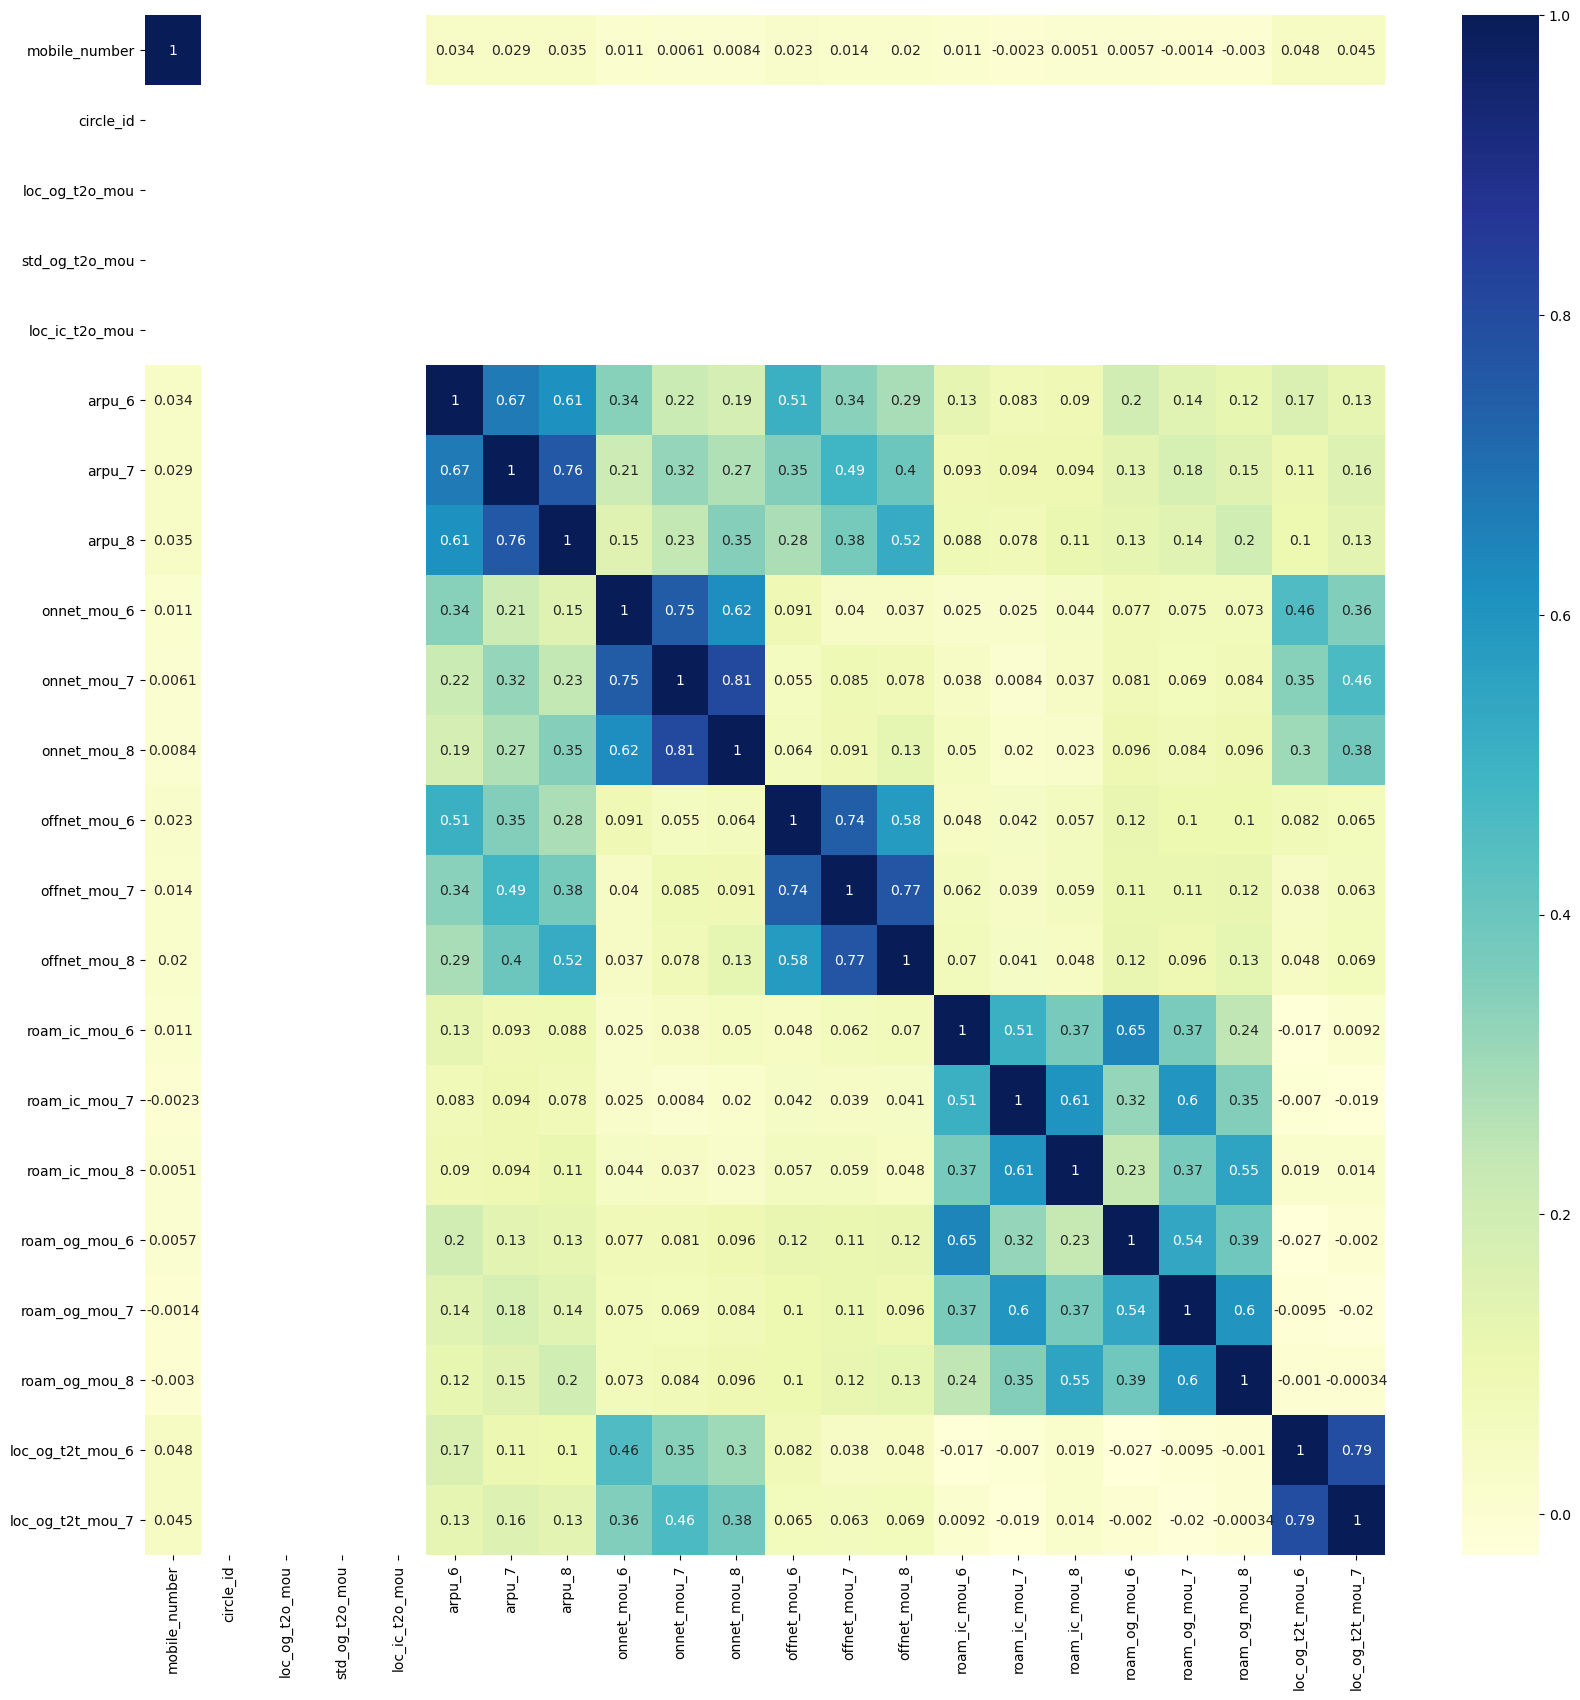

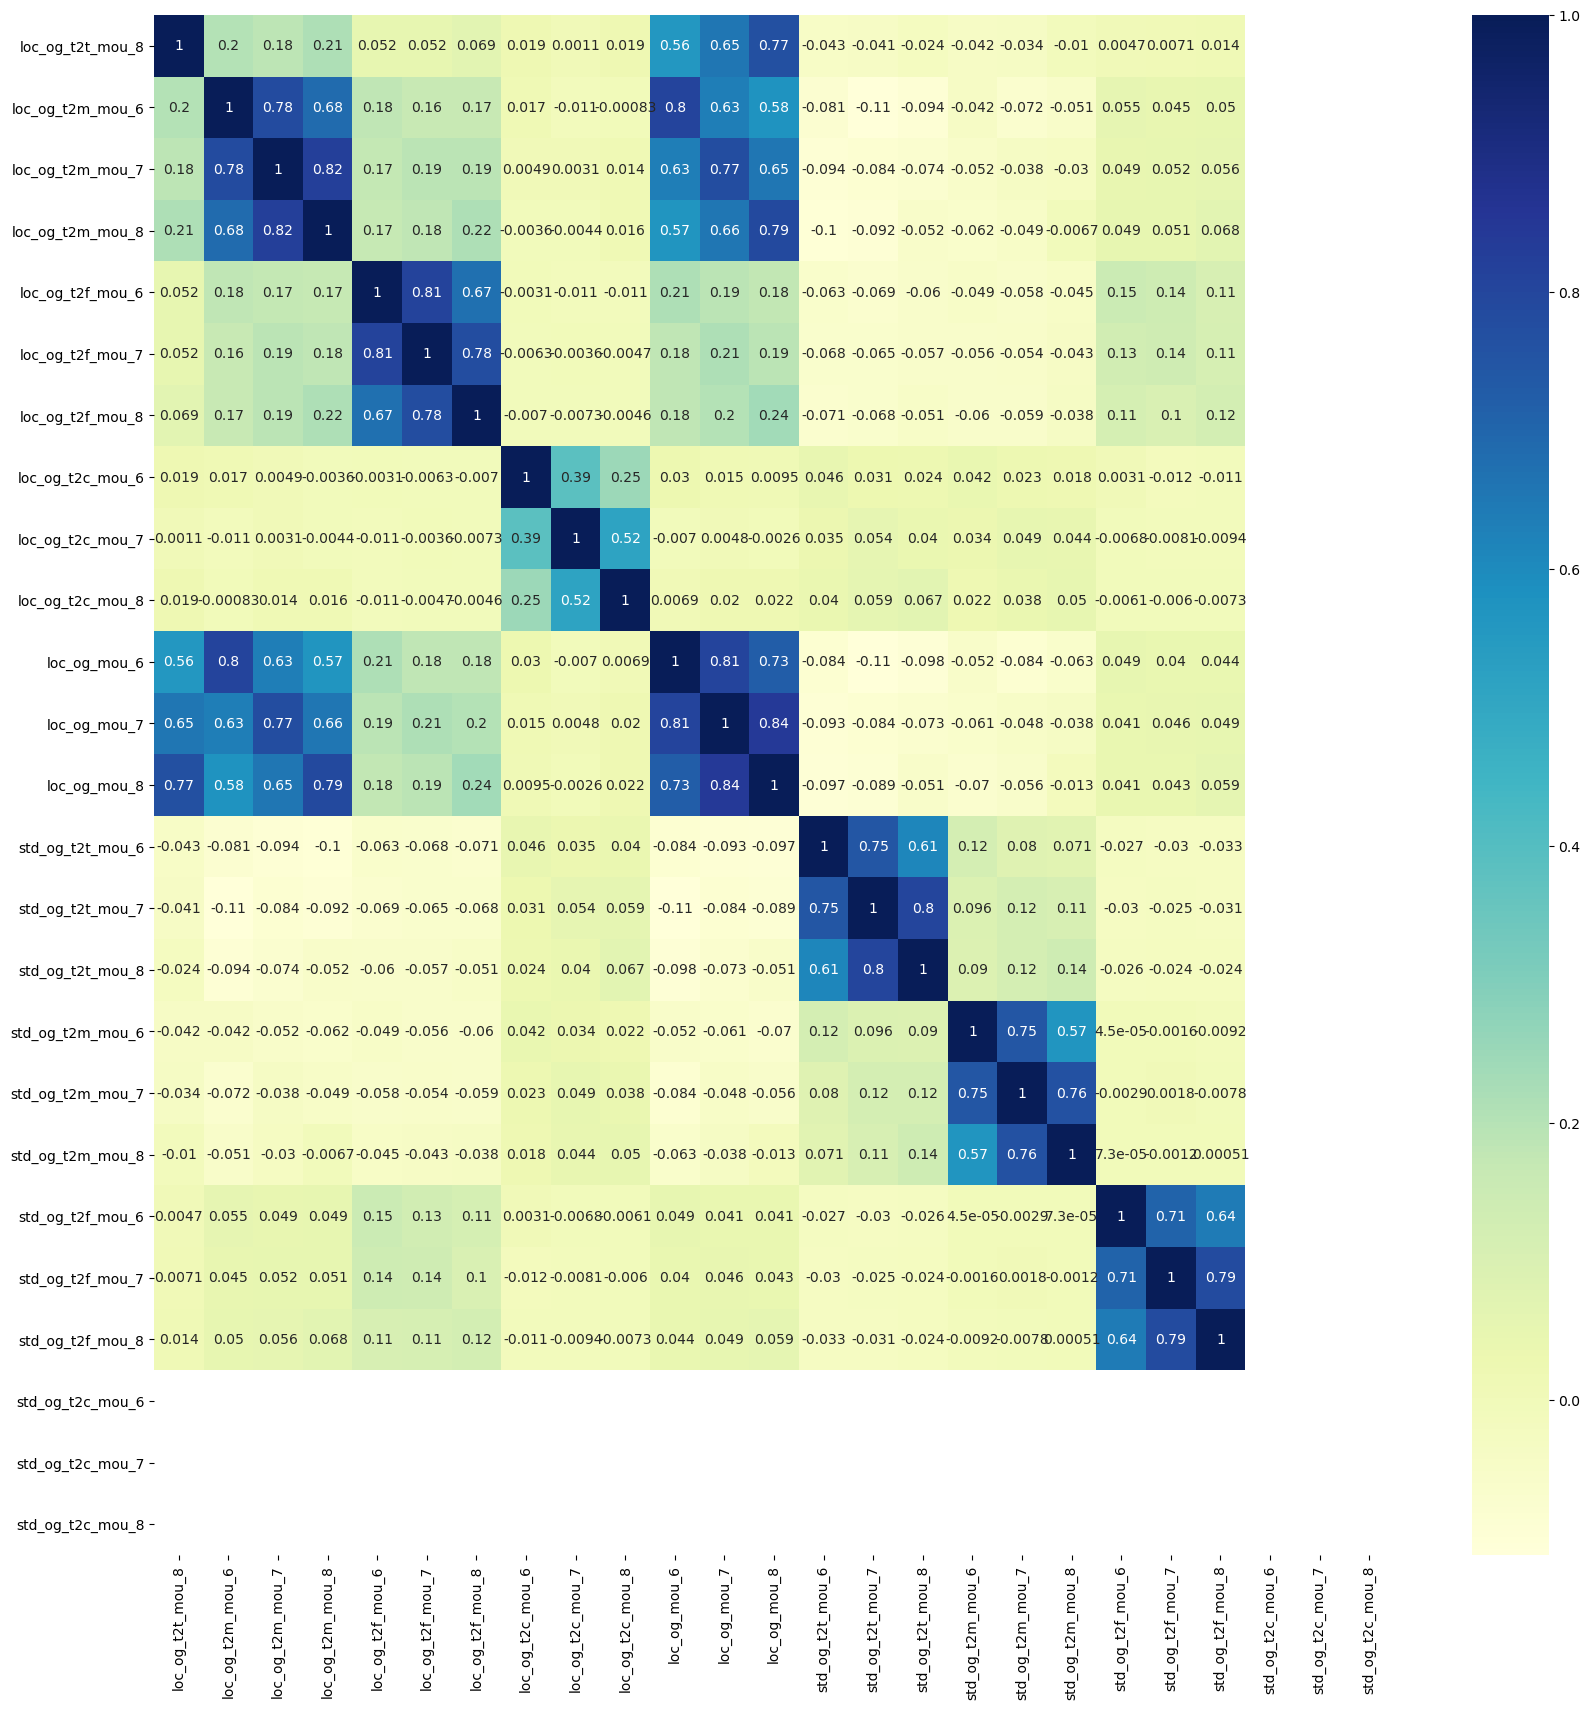

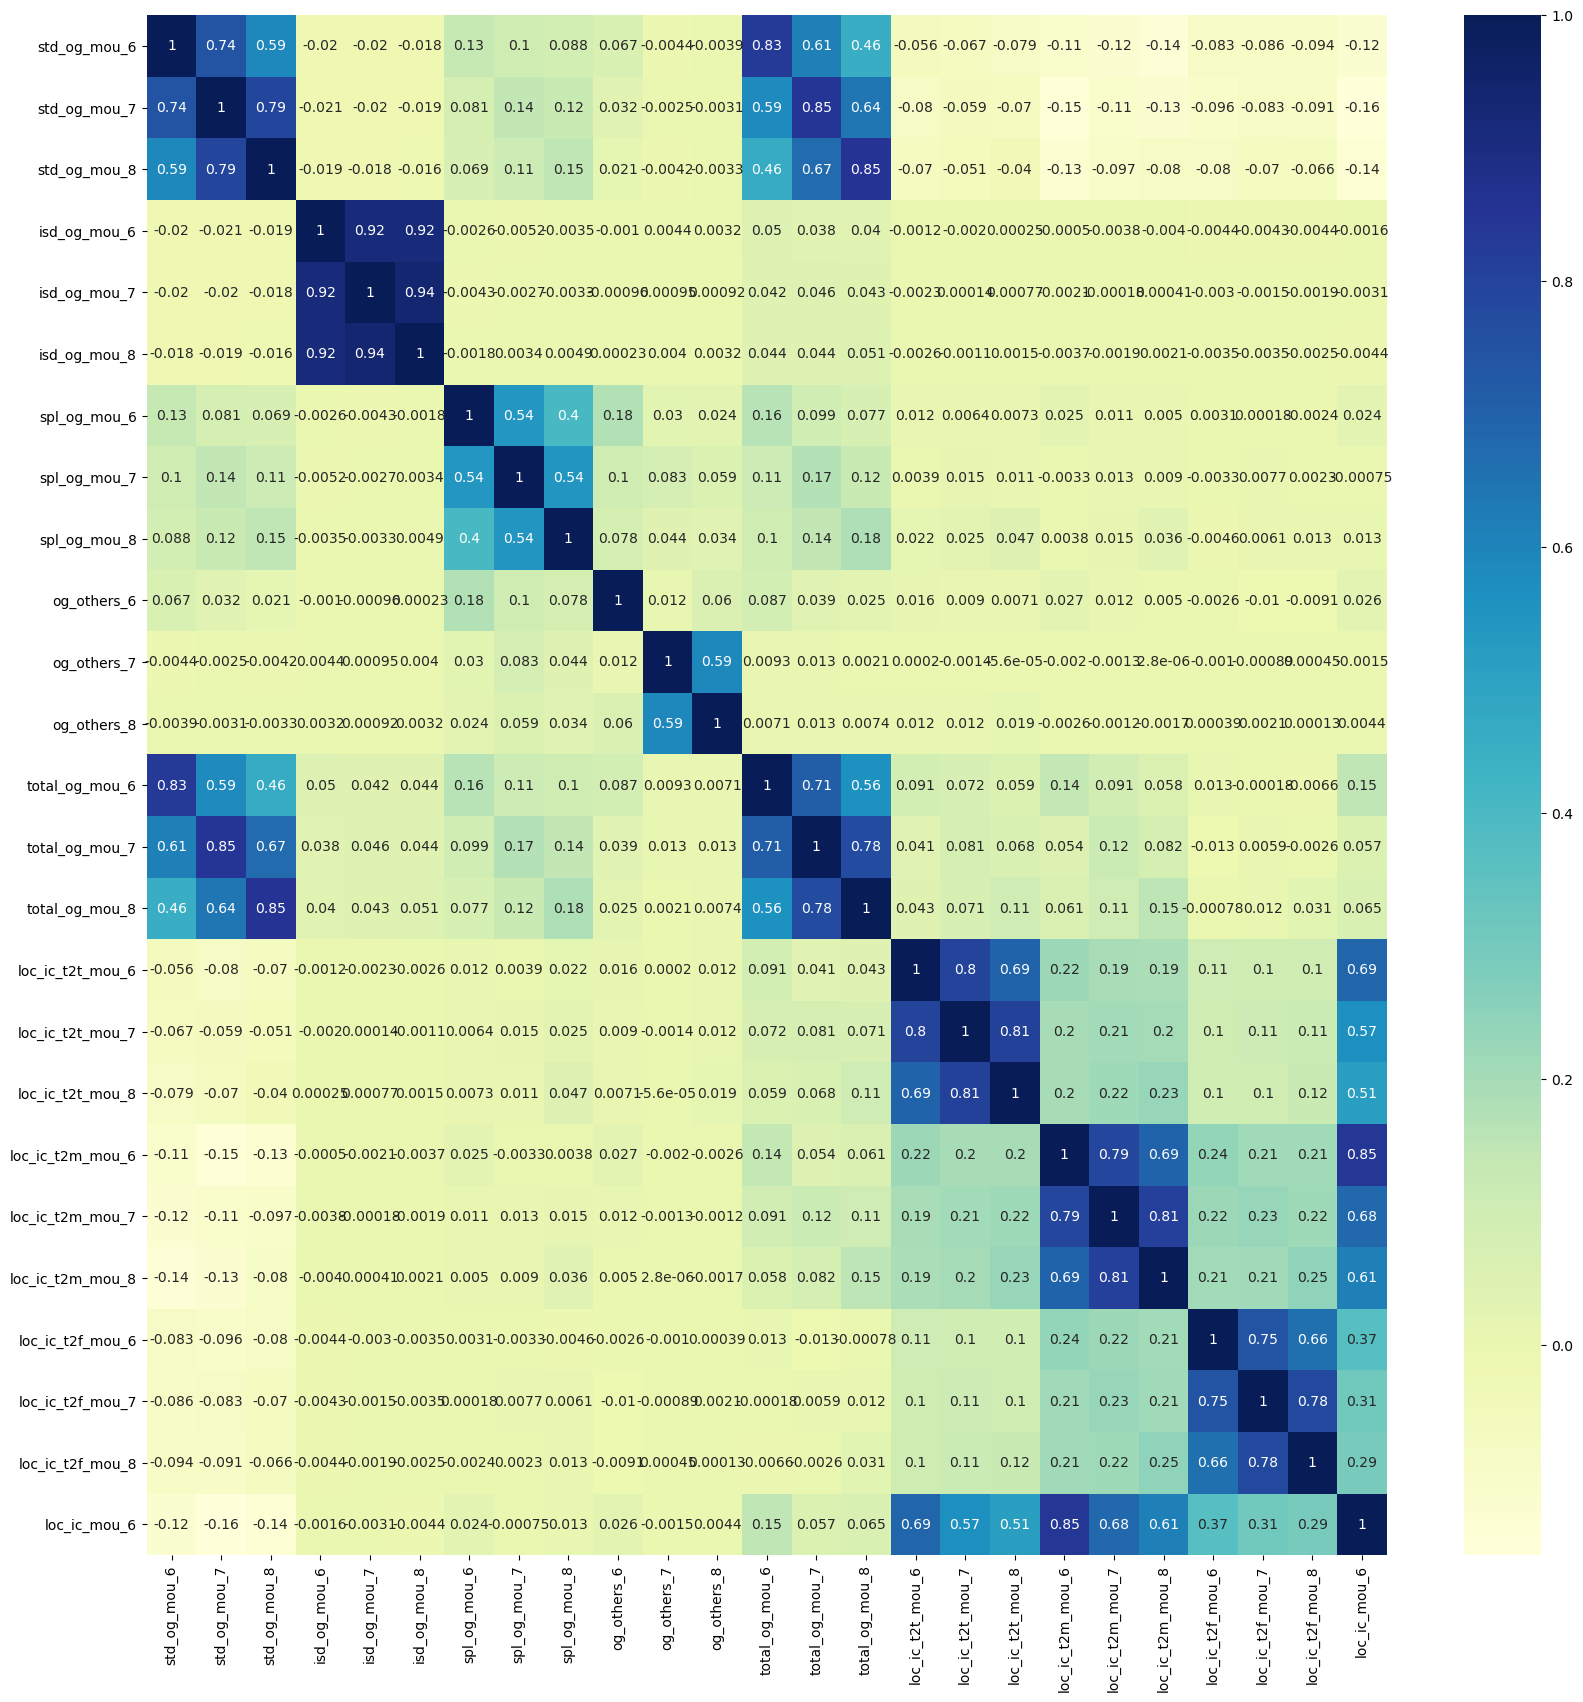

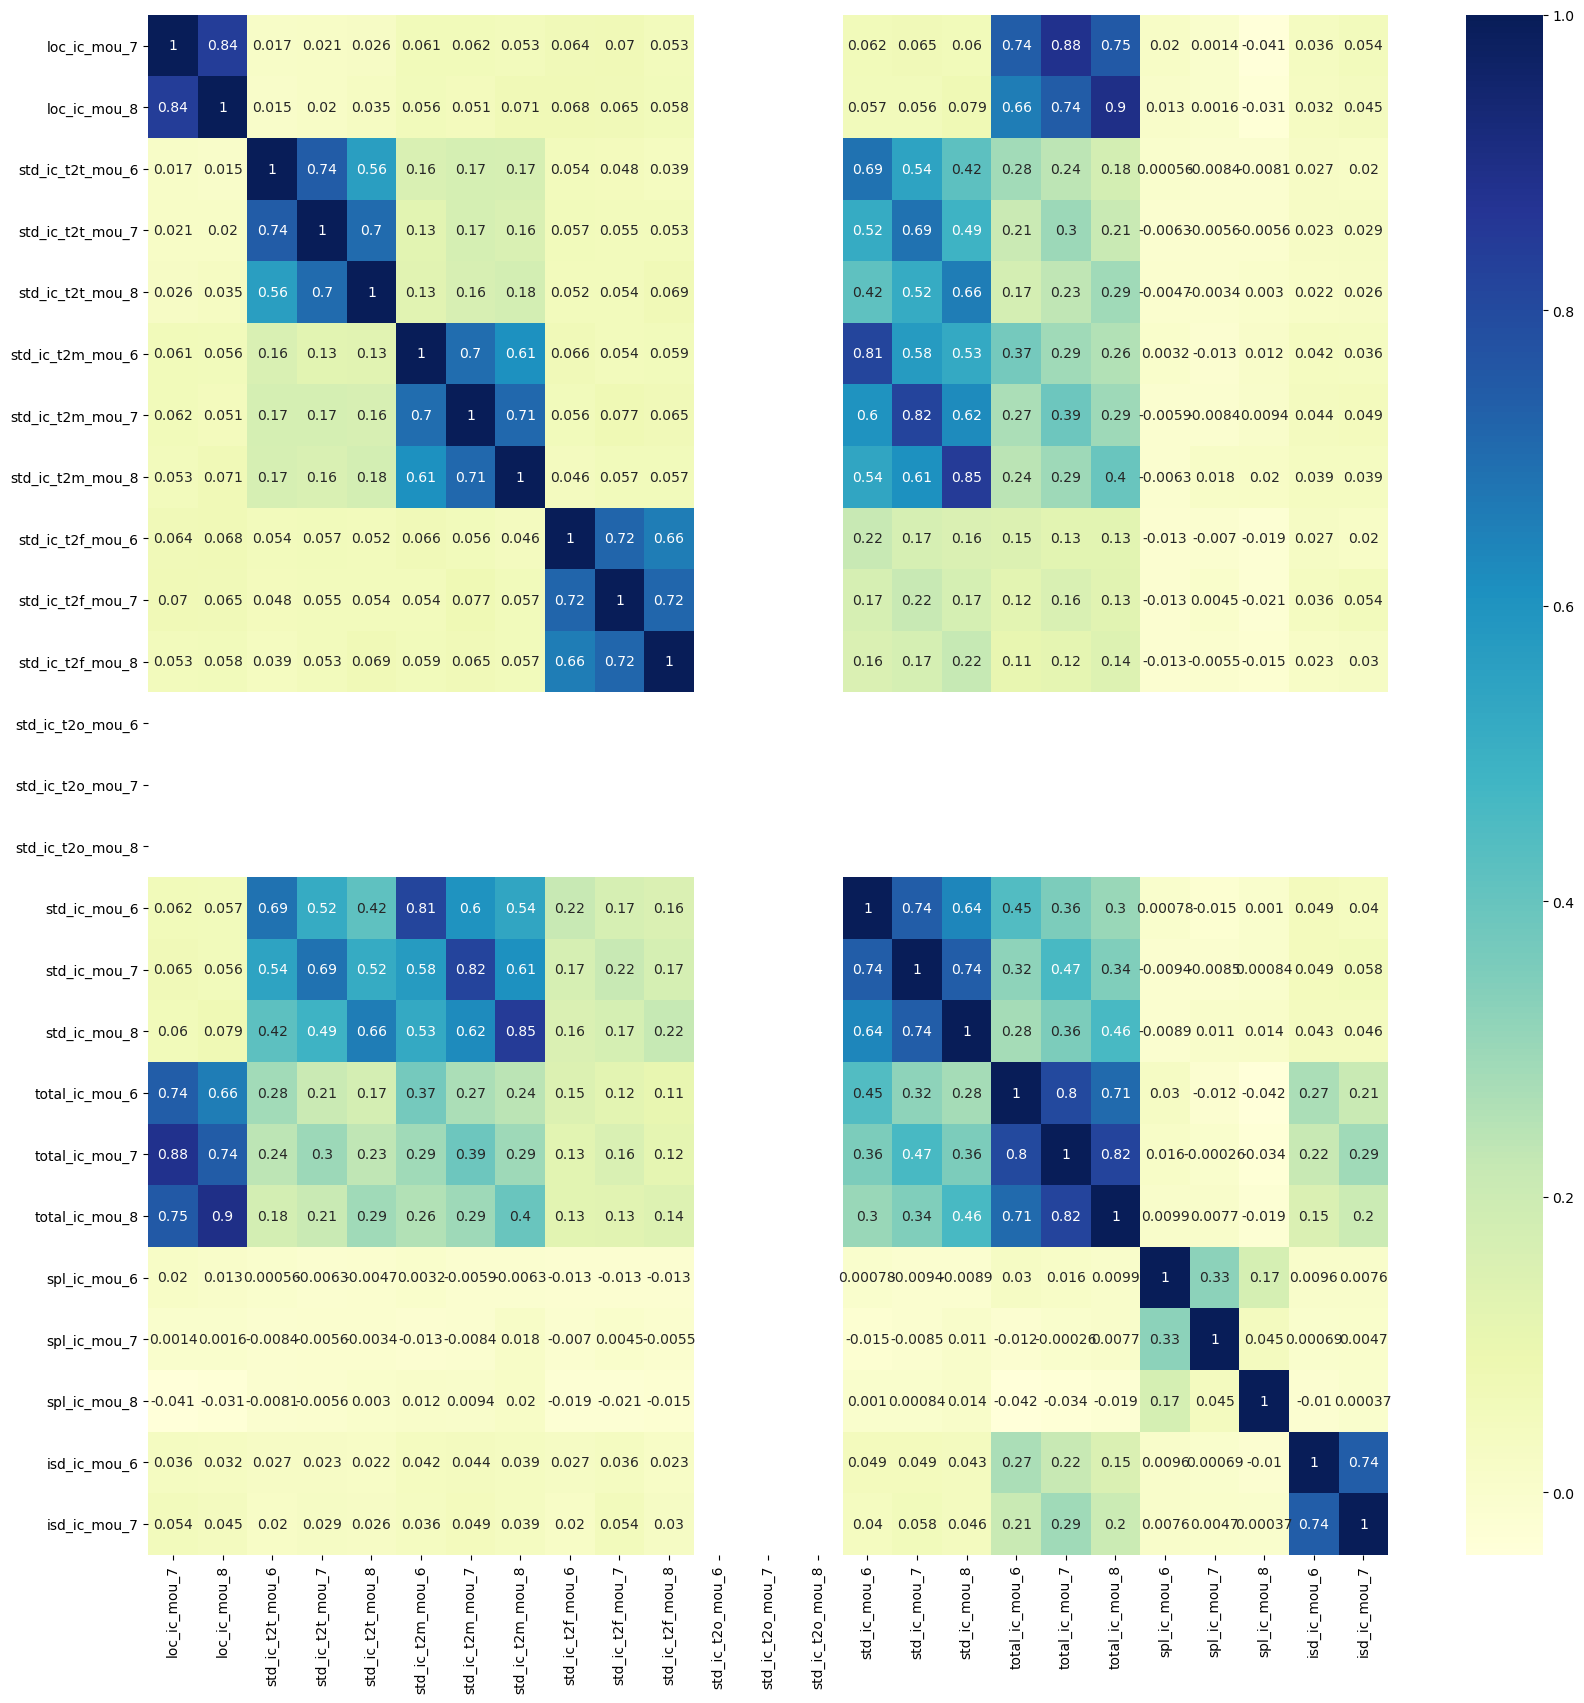

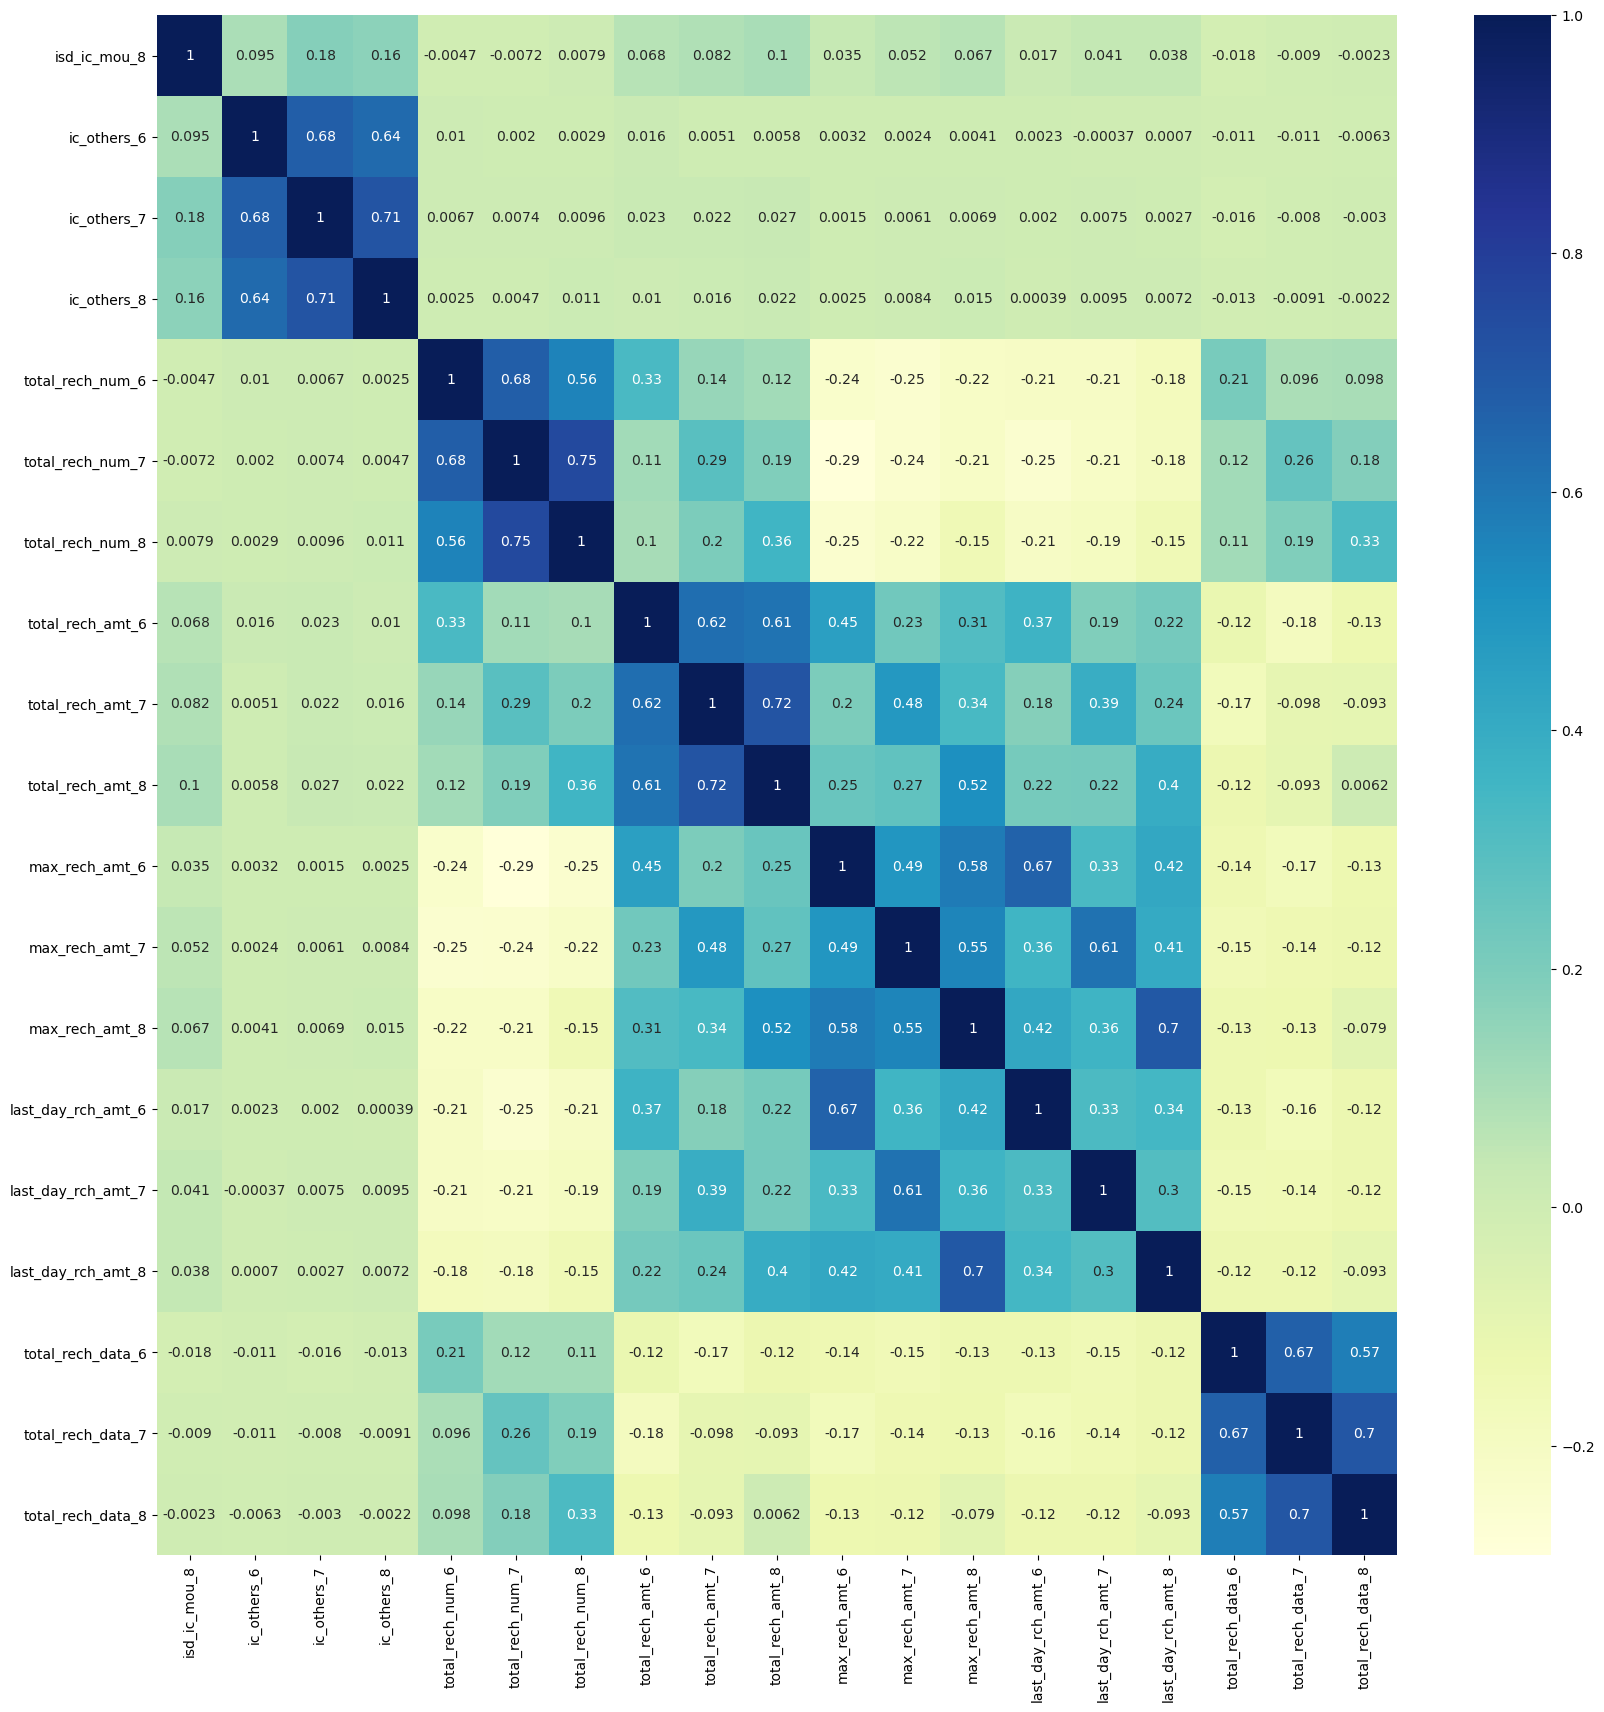

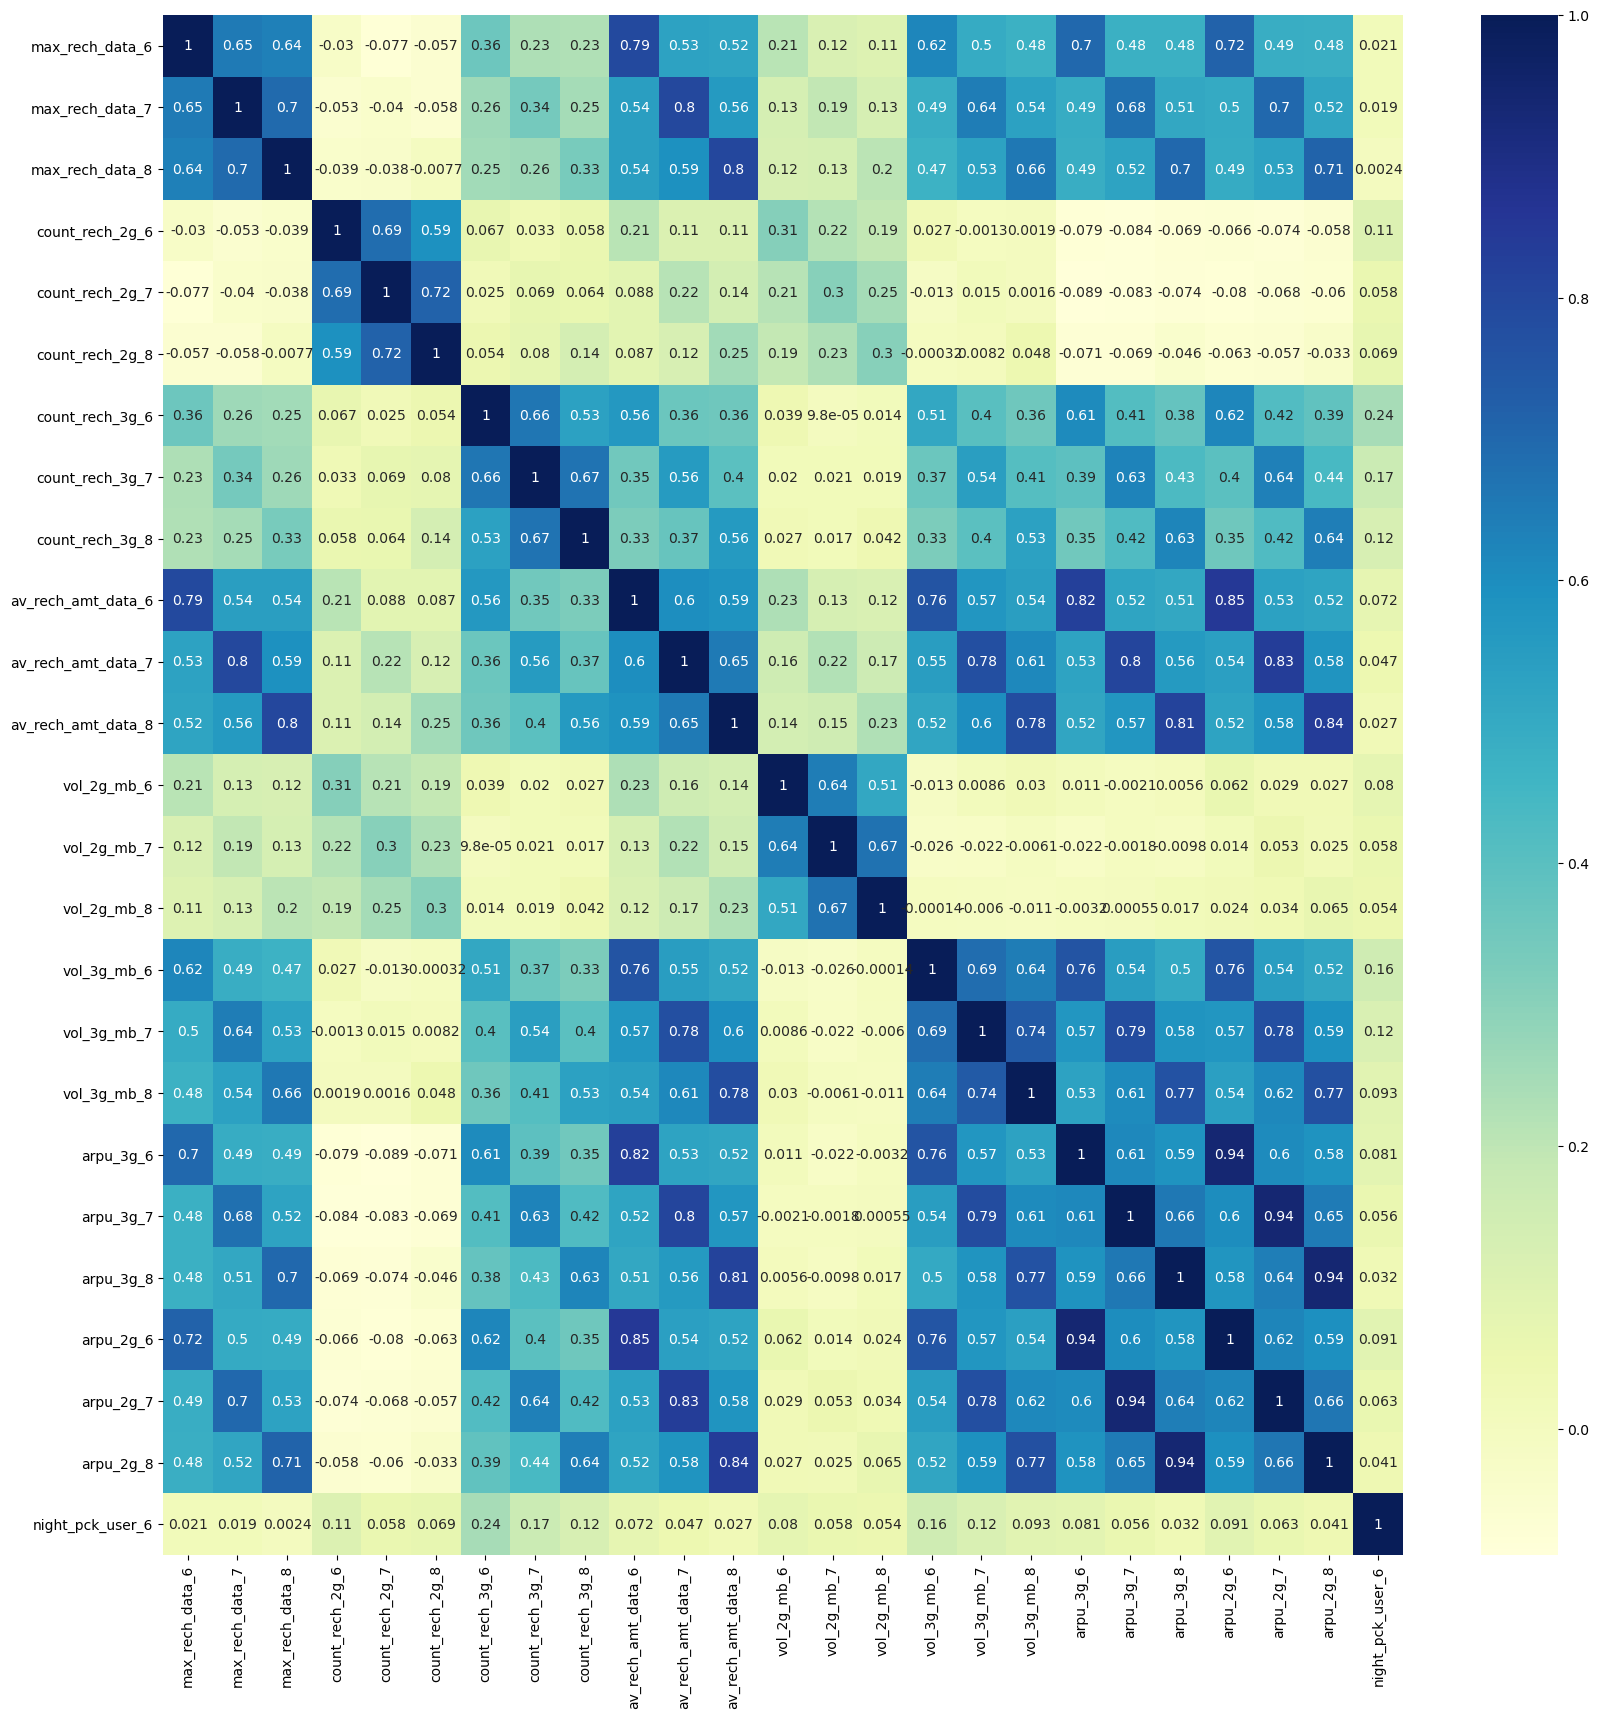

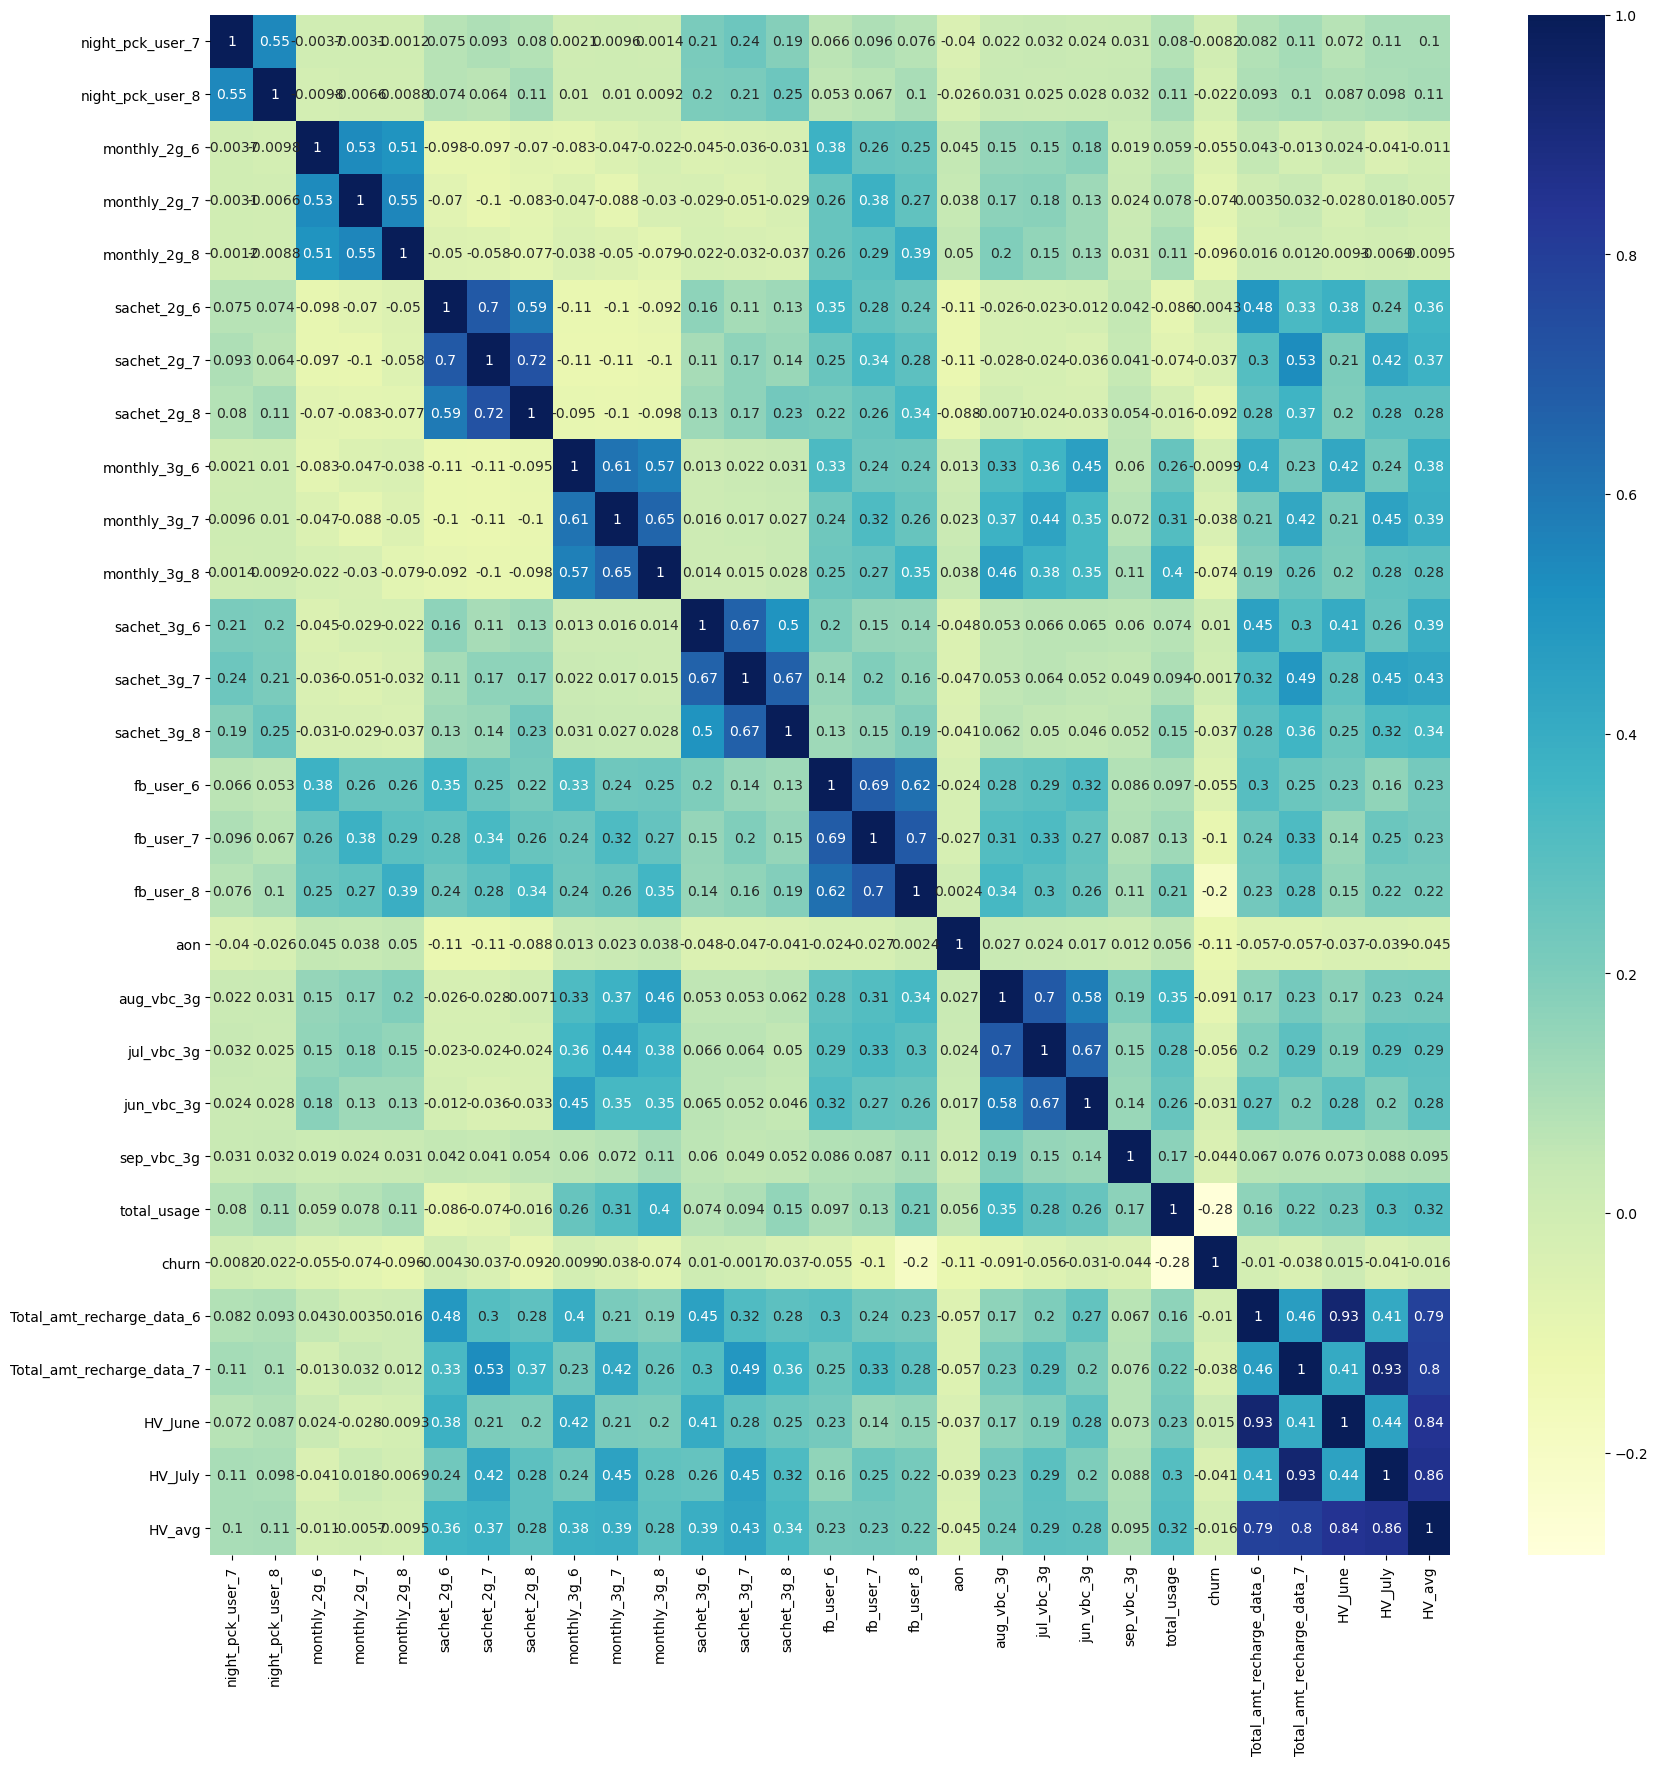

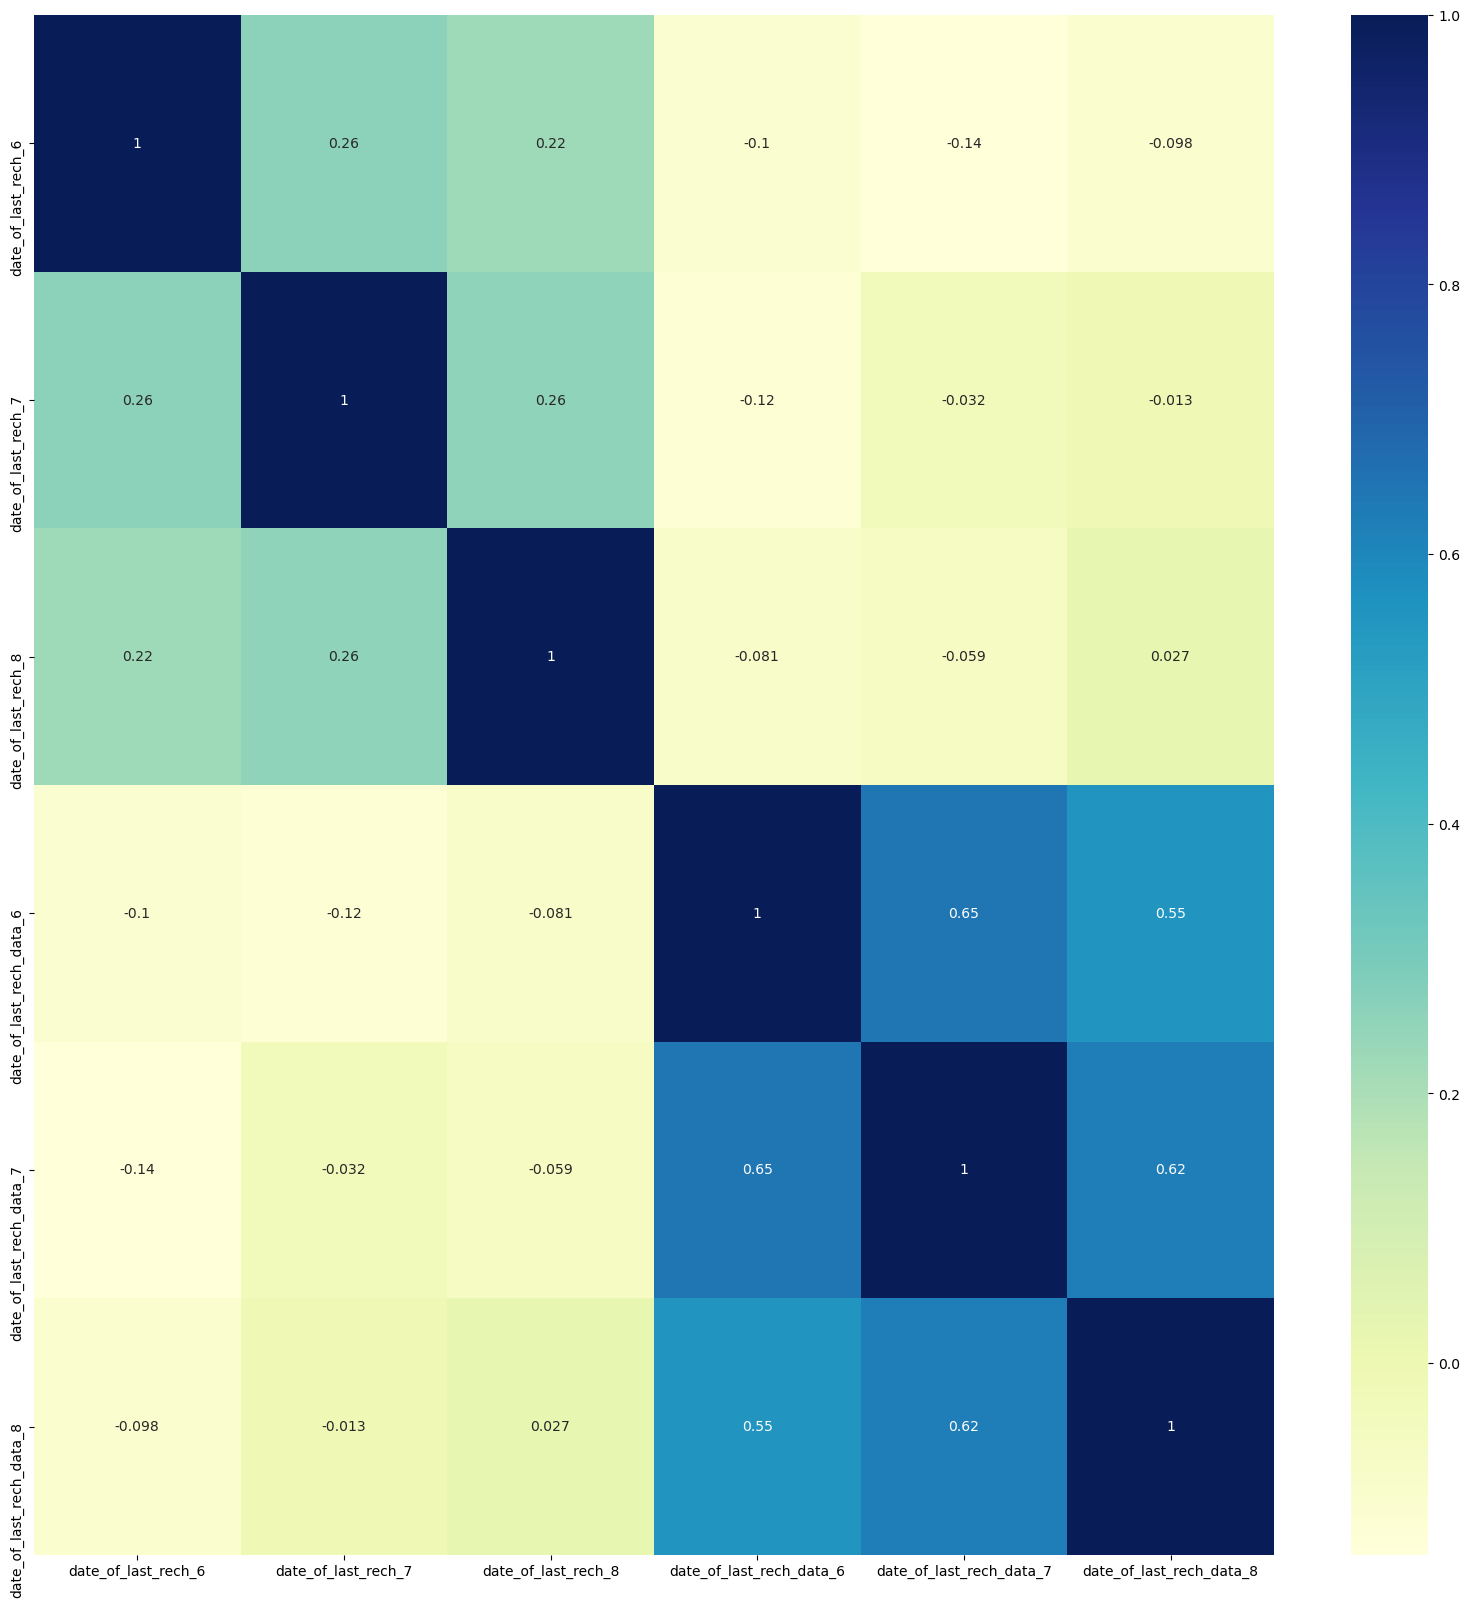

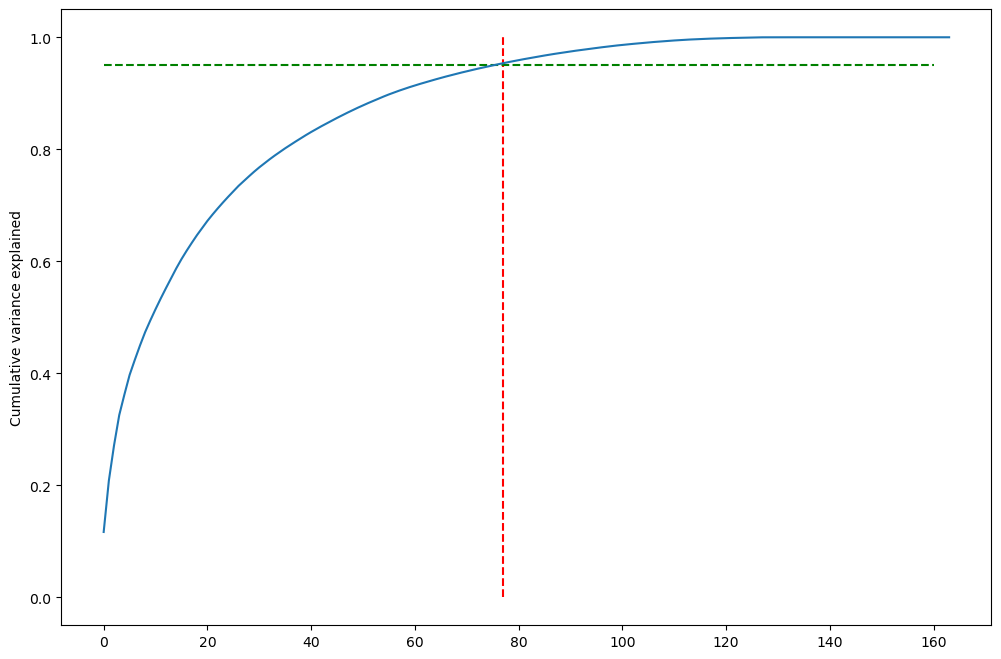

In [101]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=77, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=160, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Performing PCA again with 77 components

In [102]:
from sklearn.decomposition import IncrementalPCA

In [103]:
#Initializing
pca_final = IncrementalPCA(n_components=77)

In [104]:
# Fitting it
df_train_pca = pca_final.fit_transform(X_train)

In [105]:
# Checking the shape
df_train_pca.shape

(21000, 77)

In [106]:
# Let's try to plot them
corrmat = np.corrcoef(df_train_pca.transpose())

In [107]:
corrmat.shape

(77, 77)

Plotting the heatmap of the corr matrix

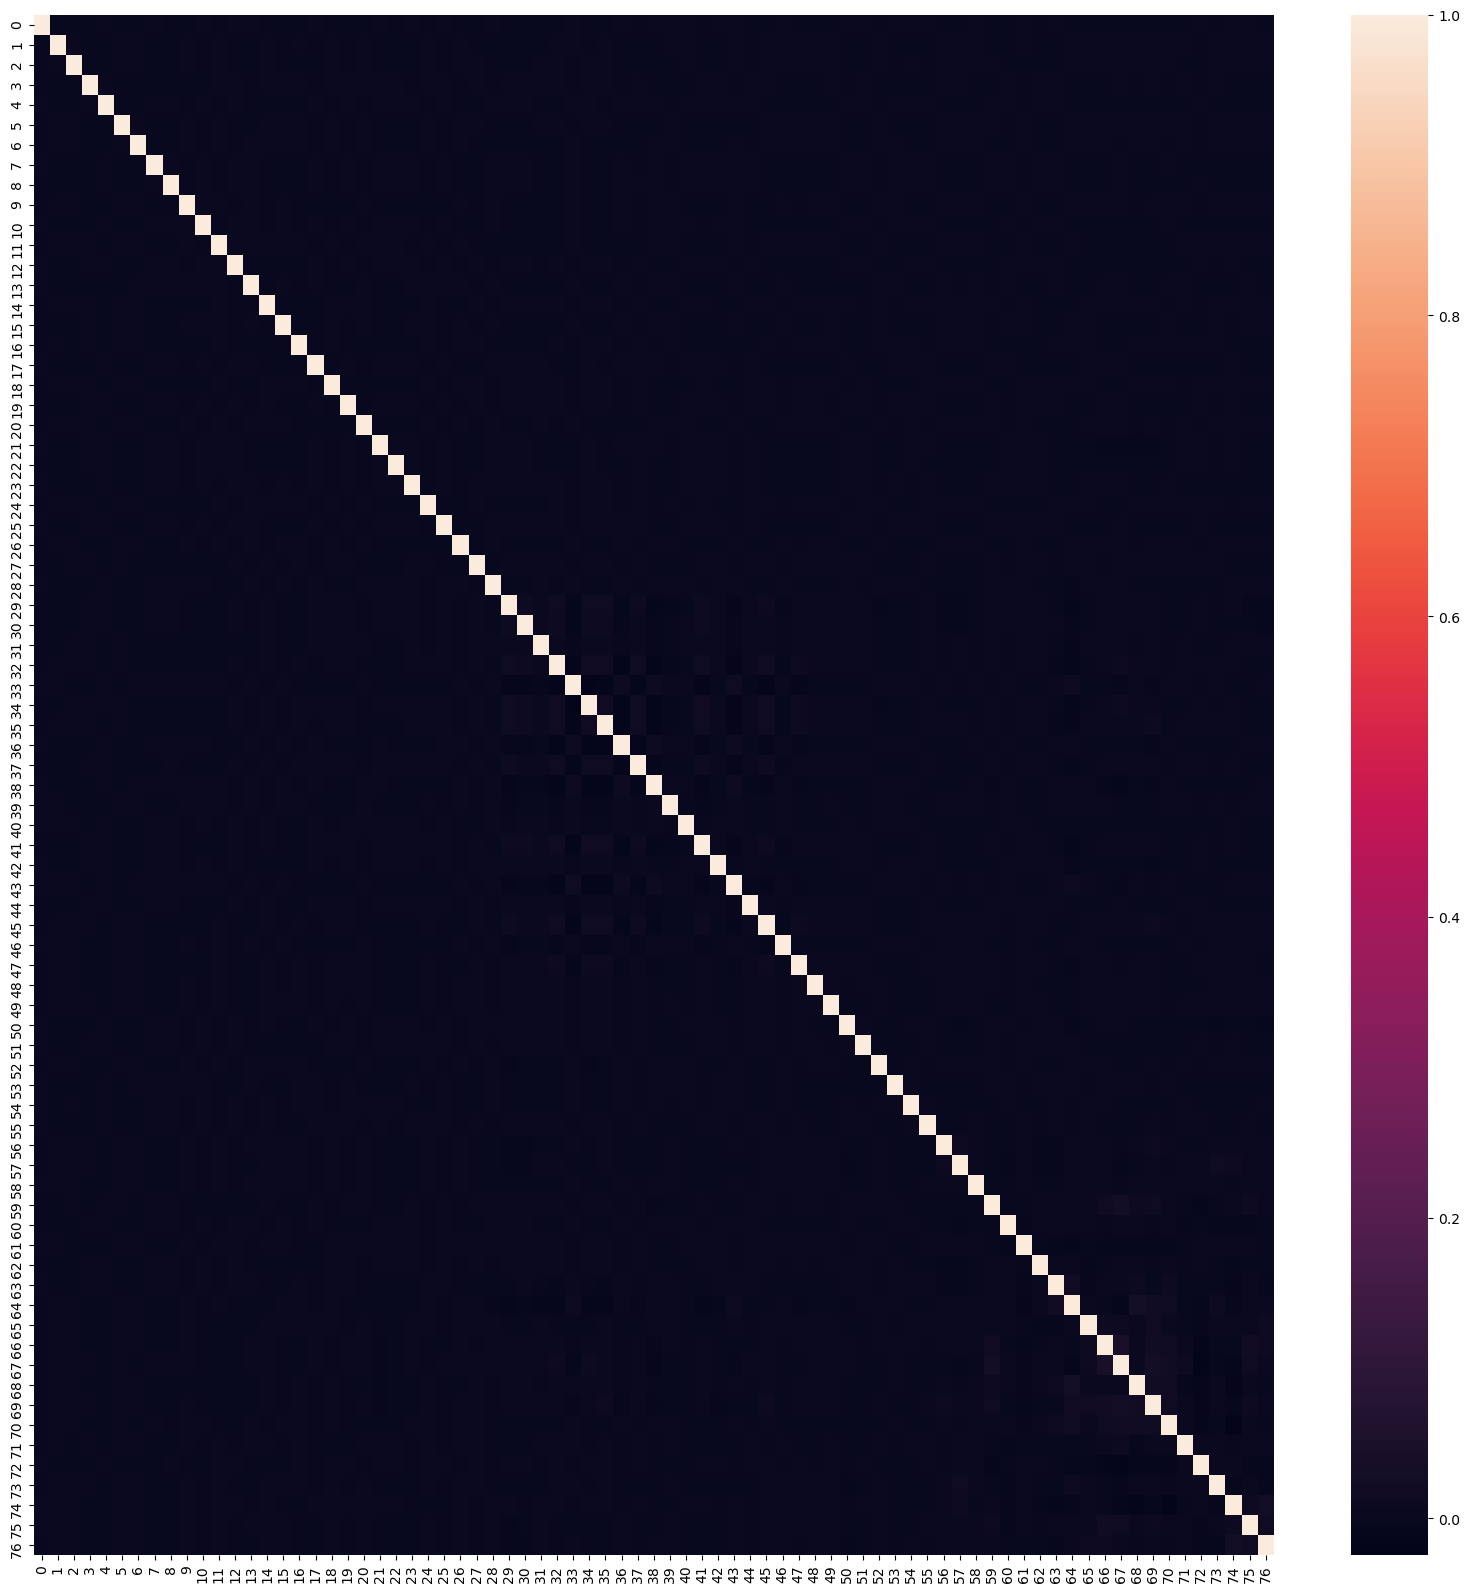

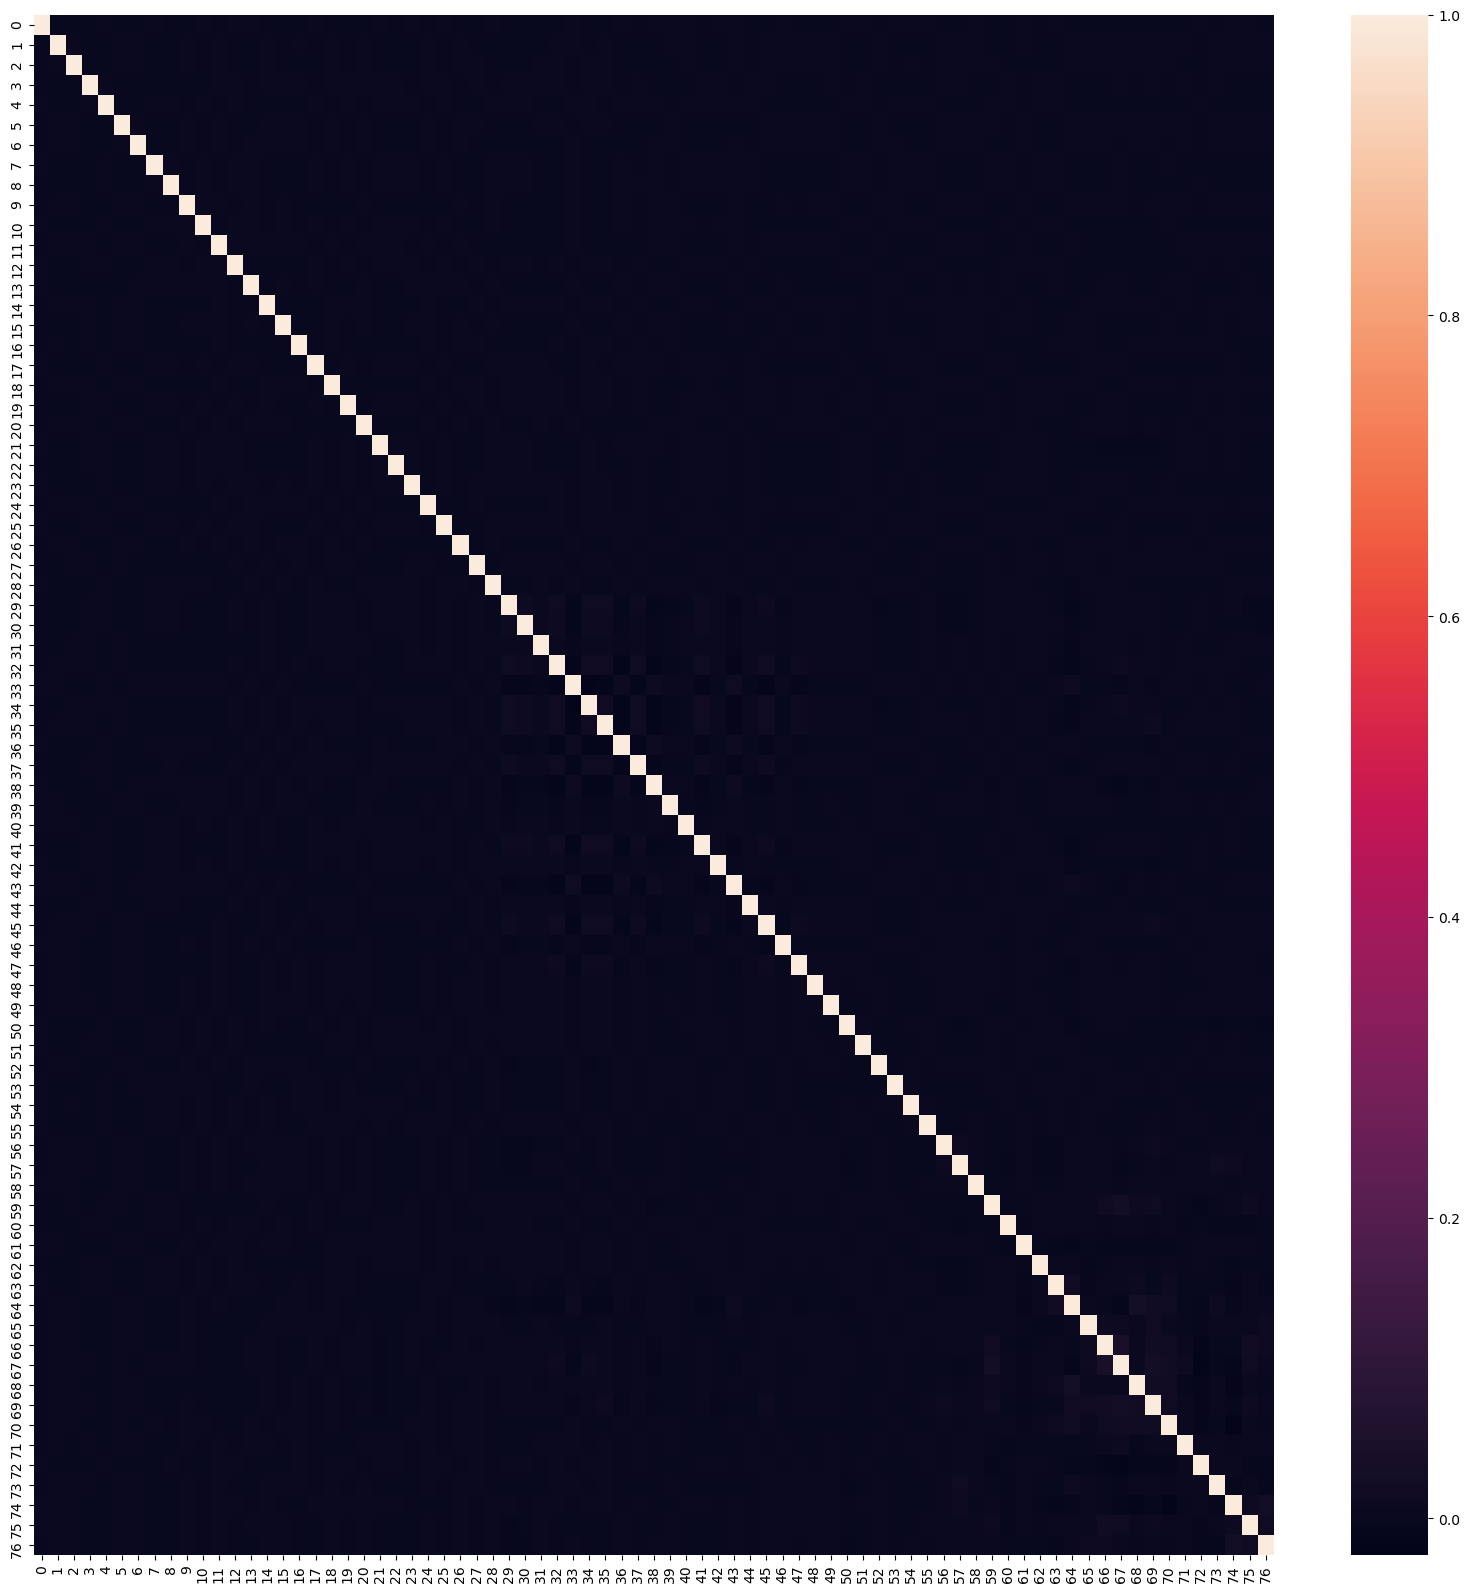

In [114]:
plt.figure(figsize=[20,20])
sns.heatmap(corrmat)
plt.show()

We have got our perfect uncorrelated data with us now

In [109]:
# Applying the transformation on the test set
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 77)

### Step 6: Handling Imbalance with SMOTE

In [115]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Abhinav\Anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    imbalanced-learn-0.8.1     |     pyhd8ed1ab_0         110 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         110 KB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.8.1-pyhd8ed1ab_0




imbalanced-learn-0.8 | 110 KB    |            |   0% 
imbalanced-learn-0.8 | 110 KB    | #4         |  15% 
imbalanced-learn-0.8 | 110 KB    | ########## | 100% 
imbalanced-learn-0.8 | 110 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may

In [116]:
#!pip install imblearn
from imblearn.over_sampling import SMOTE

In [117]:
# Let's see the shape before SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 1691
Before OverSampling, counts of label '0': 19309 



In [118]:
# Let's initialize and fit SMOTE
smt = SMOTE(random_state=100)
df_train_pca, y_train = smt.fit_resample(df_train_pca, y_train)

In [119]:
# Let's see the shape after SMOTE
print('After OverSampling, the shape of train_X: {}'.format(df_train_pca.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))
 
print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

After OverSampling, the shape of train_X: (38618, 77)
After OverSampling, the shape of train_y: (38618,) 

After OverSampling, counts of label '1': 19309
After OverSampling, counts of label '0': 19309


Now, we have our balanced data in our hand. Let's try building models

### Step 7: Model Building
#### Applying logistic regression on our Principal components

In [120]:
# Let's import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

In [121]:
# Initialize it
log_pca = LogisticRegression()

In [122]:
# Fitting it
log_model_pca = log_pca.fit(df_train_pca, y_train)

In [123]:
# Predicting train set
pred_probs_train = log_model_pca.predict_proba(df_train_pca)

In [124]:
# Converting y_train_pred to a dataframe which is an array
y_train_pred = pd.DataFrame(pred_probs_train)
# Converting to column dataframe
y_train_pred_1 = y_train_pred.iloc[:,[1]]
y_train_pred_1.head()

1
0  1.743220e-01
1  6.618886e-04
2  1.495252e-01
3  7.757200e-17
4  1.149691e-04

In [125]:
# Converting y_train to dataframe
y_train_df = pd.DataFrame(y_train)
y_train_df.head()

churn
0      0
1      0
2      0
3      0
4      0

In [126]:
# Putting CustID to index
y_train_df['CustID'] = y_train_df.index
# Removing index for both dataframes to append them side by side 
y_train_pred_1.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)
# Appending y_train_df and y_train_pred_1
y_train_pred_final = pd.concat([y_train_df,y_train_pred_1],axis=1)
# Renaming the column
y_train_pred_final= y_train_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_train_pred_final = y_train_pred_final.reindex(['CustID','churn','Churn_Prob'], axis=1)
# Let's see the head of y_train_pred_final
y_train_pred_final.head()

CustID  churn    Churn_Prob
0       0      0  1.743220e-01
1       1      0  6.618886e-04
2       2      0  1.495252e-01
3       3      0  7.757200e-17
4       4      0  1.149691e-04

In [127]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

CustID  churn    Churn_Prob  predicted
0       0      0  1.743220e-01          0
1       1      0  6.618886e-04          0
2       2      0  1.495252e-01          0
3       3      0  7.757200e-17          0
4       4      0  1.149691e-04          0

In [128]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.predicted )
print(confusion)

[[17160  2149]
 [ 1020 18289]]


In [129]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.predicted))

0.9179398208089492


#### Metrics beyond simply accuracy

In [130]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives## Metrics beyond simply accuracy

In [131]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9471748925371588

In [132]:
# Let us calculate specificity
TN / float(TN+FP)

0.8887047490807396

In [133]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11129525091926044


In [134]:
# positive predictive value 
print (TP / float(TP+FP))

0.8948527253155886


In [135]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9438943894389439


#### Plotting the ROC Curve

In [136]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [137]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

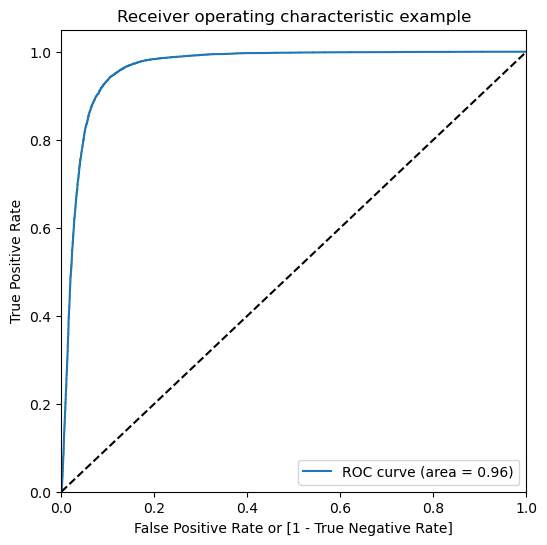

(array([0.00000000e+00, 5.17893210e-05, 5.17893210e-05, ...,
        9.99896421e-01, 9.99948211e-01, 1.00000000e+00]),
 array([0.0000000e+00, 0.0000000e+00, 5.1789321e-05, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00]),
 array([1.99999961e+000, 9.99999606e-001, 9.99999533e-001, ...,
        5.80182363e-065, 3.97759800e-083, 4.58620187e-105]))

In [138]:
draw_roc(y_train_pred_final.churn, y_train_pred_final.Churn_Prob)

#### Finding Optimal Cutoff Point

In [139]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

CustID  churn    Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0       0      0  1.743220e-01          0    1    1    0    0    0    0    0   
1       1      0  6.618886e-04          0    1    0    0    0    0    0    0   
2       2      0  1.495252e-01          0    1    1    0    0    0    0    0   
3       3      0  7.757200e-17          0    1    0    0    0    0    0    0   
4       4      0  1.149691e-04          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [140]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.861593  0.990160  0.733026
0.2   0.2  0.890828  0.983427  0.798229
0.3   0.3  0.906676  0.974727  0.838624
0.4   0.4  0.914392  0.963281  0.865503
0.5   0.5  0.917940  0.947175  0.888705
0.6   0.6  0.916956  0.924336  0.909576
0.7   0.7  0.909446  0.889741  0.929152
0.8   0.8  0.885157  0.821068  0.949246
0.9   0.9  0.789036  0.604951  0.973121


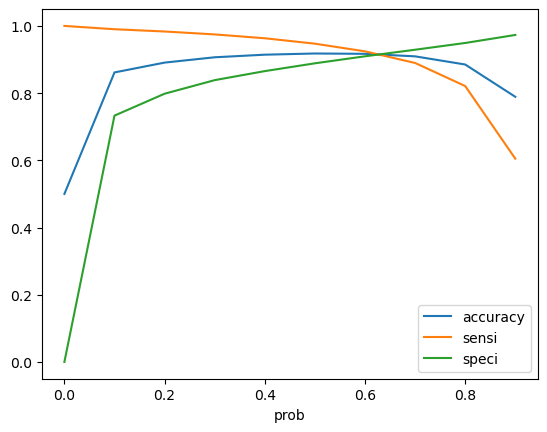

In [141]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.63 is the optimum point to take it as a cutoff probability.

In [142]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.63 else 0)

y_train_pred_final.head()

CustID  churn    Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0       0      0  1.743220e-01          0    1    1    0    0    0    0    0   
1       1      0  6.618886e-04          0    1    0    0    0    0    0    0   
2       2      0  1.495252e-01          0    1    1    0    0    0    0    0   
3       3      0  7.757200e-17          0    1    0    0    0    0    0    0   
4       4      0  1.149691e-04          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    0    0    0                0

In [143]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.final_predicted)

0.9153503547568491

In [144]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.final_predicted )
confusion2

array([[17680,  1629],
       [ 1640, 17669]], dtype=int64)

In [145]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [146]:
# print classification report
print(classification_report(y_train_pred_final.churn, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     19309
           1       0.92      0.92      0.92     19309

    accuracy                           0.92     38618
   macro avg       0.92      0.92      0.92     38618
weighted avg       0.92      0.92      0.92     38618



In [147]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9150655134911181

In [148]:
# Let us calculate specificity
TN / float(TN+FP)

0.9156351960225801

### Precision and recall tradeoff

In [149]:
### Precision and recall tradeoff
from sklearn.metrics import precision_recall_curve

In [150]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.churn, y_train_pred_final.Churn_Prob)

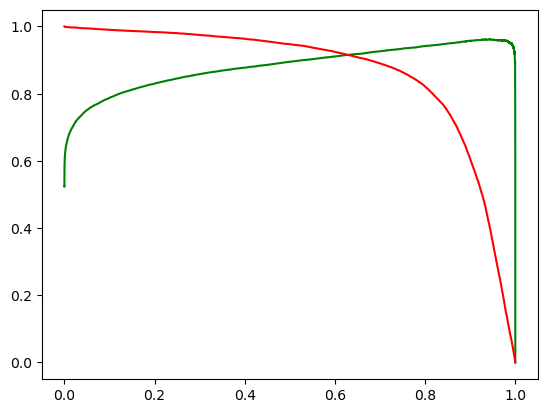

In [151]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Here also, we have almost 0.63 which makes us easy to go further

### Making predictions on the test set

In [152]:
pred_probs_test = log_model_pca.predict_proba(df_test_pca)

In [153]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_probs_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
y_pred_1.head()

1
0  0.868850
1  0.259642
2  0.000034
3  0.239493
4  0.991490

In [154]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

churn
20296      1
8279       1
72269      0
65602      0
42758      1

In [155]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

CustID  churn  Churn_Prob
0   20296      1    0.868850
1    8279      1    0.259642
2   72269      0    0.000034
3   65602      0    0.239493
4   42758      1    0.991490

In [156]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.63 else 0)
# Let's see the head
y_pred_final.head()

CustID  churn  Churn_Prob  predicted
0   20296      1    0.868850          1
1    8279      1    0.259642          0
2   72269      0    0.000034          0
3   65602      0    0.239493          0
4   42758      1    0.991490          1

### Model Evaluation

In [157]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted )
confusion

array([[7670,  581],
       [  94,  656]], dtype=int64)

In [158]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [159]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted)

0.9250083324075102

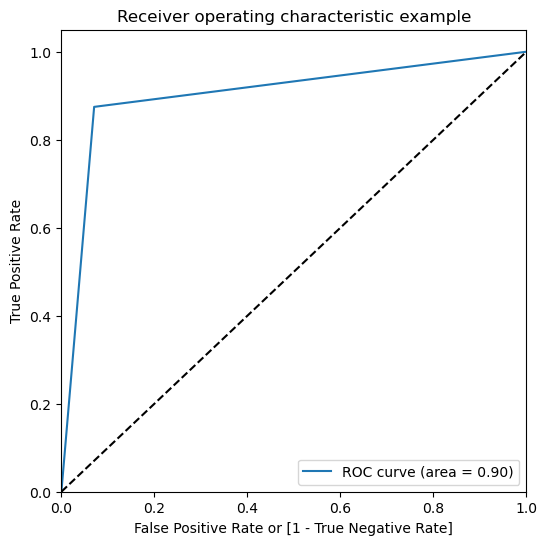

(array([0.        , 0.07041571, 1.        ]),
 array([0.        , 0.87466667, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [160]:
draw_roc(y_pred_final.churn, y_pred_final.predicted)

In [161]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.churn, y_pred_final.Churn_Prob))

'0.96'

In [162]:
# print classification report
print(classification_report(y_pred_final.churn, y_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      8251
           1       0.53      0.87      0.66       750

    accuracy                           0.93      9001
   macro avg       0.76      0.90      0.81      9001
weighted avg       0.95      0.93      0.93      9001



In [163]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8746666666666667

In [164]:
# Let us calculate specificity
TN / float(TN+FP)

0.9295842928129924

## Using Decision Trees

In [165]:
from sklearn.tree import DecisionTreeClassifier

In [166]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(df_train_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(df_train_pca)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(df_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(df_test_pca)))

In [167]:
# Initializing
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [168]:
# Fitting the model
dt_base.fit(df_train_pca, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [169]:
# Predicting
y_train_pred = dt_base.predict(df_train_pca)
y_test_pred = dt_base.predict(df_test_pca)

In [170]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      8251
           1       0.25      0.71      0.37       750

    accuracy                           0.80      9001
   macro avg       0.61      0.76      0.63      9001
weighted avg       0.91      0.80      0.84      9001



In [171]:
evaluate_model(dt_base)

Train Accuracy : 0.7900978818167694
Train Confusion Matrix:
[[15679  3630]
 [ 4476 14833]]
--------------------------------------------------
Test Accuracy : 0.8005777135873792
Test Confusion Matrix:
[[6671 1580]
 [ 215  535]]


#### Plot the ROC curve

In [172]:
from sklearn.metrics import plot_roc_curve

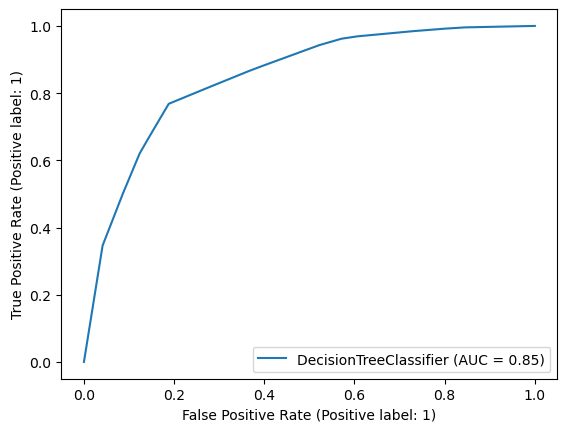

In [173]:
# Plotting the roc curve
plot_roc_curve(dt_base, df_train_pca, y_train, drop_intermediate=False)
plt.show()

We don't have very high accuracy or recall. So let's try gridsearch

#### Hyper-parameter tuning for the Decision Tree

In [174]:
from sklearn.model_selection import GridSearchCV

In [175]:
# Initializing
dt = DecisionTreeClassifier(random_state=42)

In [176]:
# Setting up the parameters
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [177]:
# Initializing Grid Search
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [178]:
%%time
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
Wall time: 2min 10s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [179]:
# best_score_
grid_search.best_score_

0.8831115208696293

In [180]:
# best_estimator_
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

In [181]:
# evaluating the best model
evaluate_model(dt_best)

Train Accuracy : 0.9660003107359263
Train Confusion Matrix:
[[18627   682]
 [  631 18678]]
--------------------------------------------------
Test Accuracy : 0.8601266525941562
Test Confusion Matrix:
[[7312  939]
 [ 320  430]]


In [182]:
# Let's see classification_report
print(classification_report(y_test, dt_best.predict(df_test_pca)))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      8251
           1       0.31      0.57      0.41       750

    accuracy                           0.86      9001
   macro avg       0.64      0.73      0.66      9001
weighted avg       0.90      0.86      0.88      9001



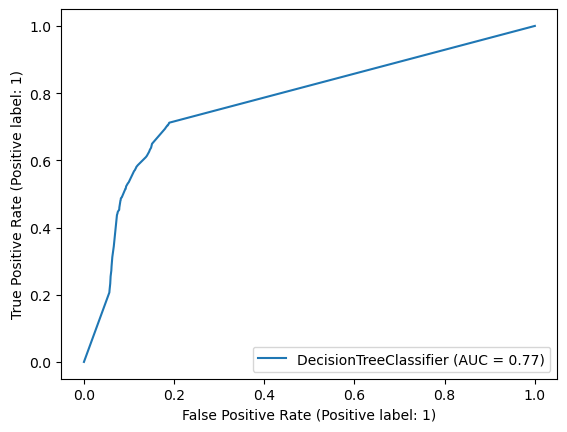

In [183]:
# Plotting the roc curve
plot_roc_curve(dt_best, df_test_pca, y_test)
plt.show()

## Using Random Forest

In [184]:
from sklearn.ensemble import RandomForestClassifier

In [185]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(df_train_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(df_train_pca)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(df_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(df_test_pca)))

### Without setting any hyper-parameters

In [186]:
# Initializing
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [187]:
%%time
rf.fit(df_train_pca, y_train)

Wall time: 1.76 s


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [188]:
# Let's check oob_score_
rf.oob_score_

0.7648764824693148

In [189]:
# Evaluating the model with train and test
evaluate_model(rf)

Train Accuracy : 0.8240198870992801
Train Confusion Matrix:
[[15854  3455]
 [ 3341 15968]]
--------------------------------------------------
Test Accuracy : 0.8211309854460616
Test Confusion Matrix:
[[6842 1409]
 [ 201  549]]


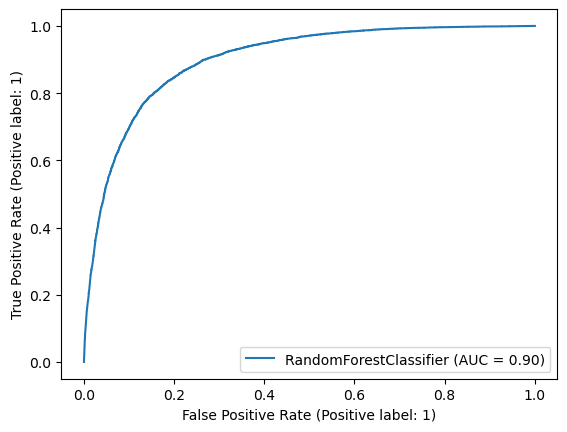

In [190]:
# roc of train
plot_roc_curve(rf, df_train_pca, y_train)
plt.show()

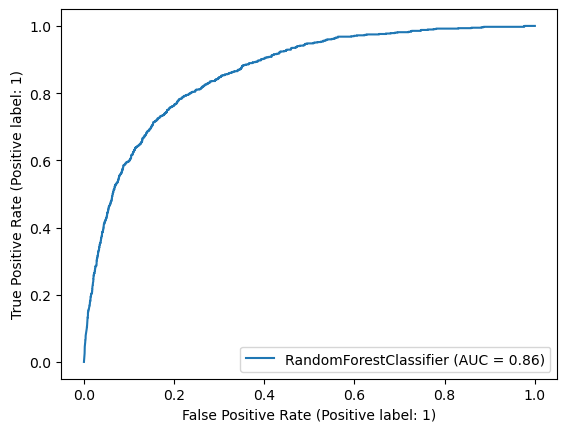

In [191]:
# roc of test
plot_roc_curve(rf, df_test_pca, y_test)
plt.show()

### Hyper-parameter tuning for the Random Forest

In [192]:
# Initializing
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [193]:
# Setting up the parameters
params = {
    'max_depth': [2,3,5,10,15,20],
    'min_samples_leaf': [5,10,20,50,75,100,200],
    'n_estimators': [10, 15, 25, 50, 70]
}

In [194]:
# Initializing Grid Search
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
%%time
grid_search.fit(df_train_pca, y_train)

In [ ]:
# best_score_
grid_search.best_score_

In [ ]:
# best_estimator_
rf_best = grid_search.best_estimator_
rf_best

In [ ]:
# Evaluating the model with train and test
evaluate_model(rf_best)

In [ ]:
# roc of train
plot_roc_curve(rf_best, df_train_pca, y_train)
plt.show()

In [ ]:
# roc of test
plot_roc_curve(rf_best, df_test_pca, y_test)
plt.show()

So while comparing the logistic, decision tree and Random Forget performance. We can see logisstic regression is performing well on both the accuracy and the recall. So finalizing `Logistic Regression model`.

In [ ]:
# print classification report of train set
print(classification_report(y_train_pred_final.churn, y_train_pred_final.final_predicted))

In [ ]:
# print classification report of test set
print(classification_report(y_pred_final.churn, y_pred_final.predicted))

In [181]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

## Other Model - Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
df_other_model

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0       197.385   214.816   213.803         0.00         0.00         0.00   
7      1069.180  1349.850  3171.480        57.84        54.68        52.29   
8       378.721   492.223   137.362       413.69       351.03        35.08   
21      514.453   597.753   637.760       102.41       132.11        85.14   
23       74.350   193.897   366.966        48.96        50.66        33.58   
...         ...       ...       ...          ...          ...          ...   
99981   384.316   255.405   393.474        78.68        29.04       103.24   
99984   328.594   202.966   118.707       423.99       181.83         5.71   
99986   644.973   455.228   564.334       806.73       549.36       775.41   
99988   312.558   512.932   402.080       199.89       174.46         2.46   
99997   322.991   303.386   606.817         0.00         0.00         0.00   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0              0.00          0.00          0.00           0.00           0.00   
7            453.43        567.16        325.91          16.23          33.49   
8             94.66         80.63        136.48           0.00           0.00   
21           757.93        896.68        983.39           0.00           0.00   
23            85.41         89.36        205.89           0.00           0.00   
...             ...           ...           ...            ...            ...   
99981         56.13         28.09         61.44           0.00           0.00   
99984         39.51         39.81         18.26           0.00           0.00   
99986        784.76        617.13        595.44           0.00           0.00   
99988        175.88        277.01        248.33           0.00           0.00   
99997          0.00          0.00          0.00           0.00           0.00   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0               0.00           0.00           0.00           0.00   
7              31.64          23.74          12.59          38.06   
8               0.00           0.00           0.00           0.00   
21              0.00           0.00           0.00           0.00   
23              0.00           0.00           0.00           0.00   
...              ...            ...            ...            ...   
99981           0.00           0.00           0.00           0.00   
99984           0.00           0.00           0.00           0.00   
99986           0.00           0.00           0.00           0.00   
99988           0.00           0.00           0.00           0.00   
99997           0.00           0.00           0.00           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0                  0.00              0.00              0.00              0.00   
7                 51.39             31.38             40.28            308.63   
8                297.13            217.59             12.49             80.96   
21                 4.48              6.16             23.34             91.81   
23                48.96             50.66             33.58             82.94   
...                 ...               ...               ...               ...   
99981             72.53             29.04             89.23             52.21   
99984            423.99            181.83              5.71             17.96   
99986            709.21            496.14            718.56            574.93   
99988            170.28            146.48              2.46            137.83   
99997              0.00              0.00              0.00              0.00   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0                  0.00              0.00              0.00              0.00   
7                447.38            162.28             62.13             55.14   
8                 70.58             50.54             

In [90]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [91]:
Y_train_RF = df_other_model.pop('churn')
X_train_RF = df_other_model

In [92]:
Y_train_RF

0        1
7        1
8        0
21       0
23       0
        ..
99981    0
99984    0
99986    0
99988    0
99997    0
Name: churn, Length: 30001, dtype: int64

In [93]:
df_other_model

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0       197.385   214.816   213.803         0.00         0.00         0.00   
7      1069.180  1349.850  3171.480        57.84        54.68        52.29   
8       378.721   492.223   137.362       413.69       351.03        35.08   
21      514.453   597.753   637.760       102.41       132.11        85.14   
23       74.350   193.897   366.966        48.96        50.66        33.58   
...         ...       ...       ...          ...          ...          ...   
99981   384.316   255.405   393.474        78.68        29.04       103.24   
99984   328.594   202.966   118.707       423.99       181.83         5.71   
99986   644.973   455.228   564.334       806.73       549.36       775.41   
99988   312.558   512.932   402.080       199.89       174.46         2.46   
99997   322.991   303.386   606.817         0.00         0.00         0.00   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0              0.00          0.00          0.00           0.00           0.00   
7            453.43        567.16        325.91          16.23          33.49   
8             94.66         80.63        136.48           0.00           0.00   
21           757.93        896.68        983.39           0.00           0.00   
23            85.41         89.36        205.89           0.00           0.00   
...             ...           ...           ...            ...            ...   
99981         56.13         28.09         61.44           0.00           0.00   
99984         39.51         39.81         18.26           0.00           0.00   
99986        784.76        617.13        595.44           0.00           0.00   
99988        175.88        277.01        248.33           0.00           0.00   
99997          0.00          0.00          0.00           0.00           0.00   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0               0.00           0.00           0.00           0.00   
7              31.64          23.74          12.59          38.06   
8               0.00           0.00           0.00           0.00   
21              0.00           0.00           0.00           0.00   
23              0.00           0.00           0.00           0.00   
...              ...            ...            ...            ...   
99981           0.00           0.00           0.00           0.00   
99984           0.00           0.00           0.00           0.00   
99986           0.00           0.00           0.00           0.00   
99988           0.00           0.00           0.00           0.00   
99997           0.00           0.00           0.00           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0                  0.00              0.00              0.00              0.00   
7                 51.39             31.38             40.28            308.63   
8                297.13            217.59             12.49             80.96   
21                 4.48              6.16             23.34             91.81   
23                48.96             50.66             33.58             82.94   
...                 ...               ...               ...               ...   
99981             72.53             29.04             89.23             52.21   
99984            423.99            181.83              5.71             17.96   
99986            709.21            496.14            718.56            574.93   
99988            170.28            146.48              2.46            137.83   
99997              0.00              0.00              0.00              0.00   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0                  0.00              0.00              0.00              0.00   
7                447.38            162.28             62.13             55.14   
8                 70.58             50.54             

In [94]:
%%time
rf.fit(X_train_RF, Y_train_RF)

Wall time: 496 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [95]:
rf.oob_score_

0.9525349155028165

In [96]:
from sklearn.metrics import plot_roc_curve

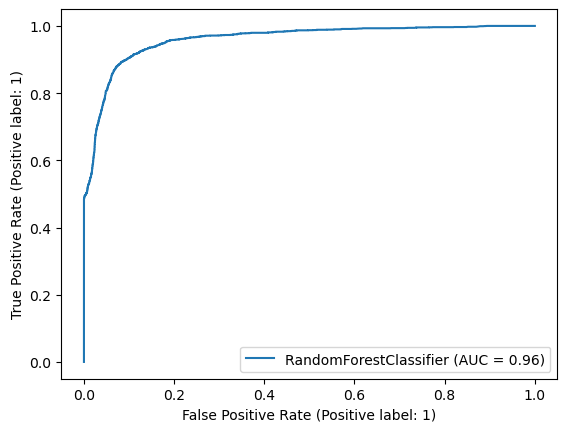

In [97]:
plot_roc_curve(rf, X_train_RF, Y_train_RF)
plt.show()

In [99]:
rf.feature_importances_

array([6.08568481e-04, 0.00000000e+00, 4.72071438e-04, 2.09155408e-04,
       0.00000000e+00, 2.12257398e-02, 0.00000000e+00, 1.20747346e-03,
       1.32455939e-03, 0.00000000e+00, 1.73167180e-03, 1.61895561e-02,
       0.00000000e+00, 1.03767855e-04, 1.06898482e-02, 0.00000000e+00,
       0.00000000e+00, 1.26105656e-04, 3.95470700e-04, 8.81353305e-03,
       1.20802367e-01, 1.34512009e-05, 5.01686127e-04, 1.36687675e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.52946074e-03,
       6.79704180e-04, 1.30828971e-02, 0.00000000e+00, 0.00000000e+00,
       2.18978864e-03, 0.00000000e+00, 1.57480314e-04, 0.00000000e+00,
       7.01464200e-04, 0.00000000e+00, 0.00000000e+00, 2.77512432e-04,
       1.88081735e-04, 2.99322067e-03, 2.22669226e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.14318746e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.89667870e-04, 4.91964874e-02, 0.00000000e+00, 0.00000000e+00,
      

imp_df = pd.DataFrame({
    "Varname": X_train_RF.columns,
    "Imp": rf.feature_importances_
})

In [102]:
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
158                total_usage  0.157183
20            loc_og_t2m_mou_8  0.120802
77                std_ic_mou_8  0.107373
98              max_rech_amt_8  0.104256
59            loc_ic_t2m_mou_8  0.083593
53              total_og_mou_8  0.049196
152                  fb_user_8  0.038296
122         av_rech_amt_data_8  0.033582
65                loc_ic_mou_8  0.029281
62            loc_ic_t2f_mou_8  0.028273
80              total_ic_mou_8  0.024846
5                  onnet_mou_8  0.021226
101        date_of_last_rech_8  0.016667
11               roam_ic_mou_8  0.016190
58            loc_ic_t2m_mou_7  0.016104
110          total_rech_data_8  0.014403
23            loc_og_t2f_mou_8  0.013669
94            total_rech_amt_7  0.013575
29                loc_og_mou_8  0.013083
125                vol_2g_mb_8  0.011381
14               roam_og_mou_8  0.010690
119            count_rech_3g_8  0.009154
19            loc_og_t2m_mou_7  0.008814
116            count_rech_2g_8  0.008782
27                loc_og_mou_6  0.004529
154                 aug_vbc_3g  0.004238
90            total_rech_num_6  0.003797
112            max_rech_data_7  0.003252
41                std_og_mou_8  0.002993
109          total_rech_data_7  0.002985
120         av_rech_amt_data_6  0.002348
32            std_og_t2t_mou_8  0.002190
10               roam_ic_mou_7  0.001732
128                vol_3g_mb_8  0.001398
8                 offnet_mou_8  0.001325
104         last_day_rch_amt_8  0.001249
7                 offnet_mou_7  0.001207
105   date_of_last_rech_data_6  0.001083
113            max_rech_data_8  0.001076
95            total_rech_amt_8  0.001068
157                 sep_vbc_3g  0.000994
56            loc_ic_t2t_mou_8  0.000931
36            std_og_t2f_mou_6  0.000701
61            loc_ic_t2f_mou_7  0.000696
28                loc_og_mou_7  0.000680
0                       arpu_6  0.000609
96              max_rech_amt_6  0.000591
107   date_of_last_rech_data_8  0.000555
145               monthly_3g_7  0.000511
22            loc_og_t2f_mou_7  0.000502
52              total_og_mou_7  0.000490
2                       arpu_8  0.000472
85                isd_ic_mou_7  0.000439
48                 og_others_6  0.000414
18            loc_og_t2m_mou_6  0.000395
63                loc_ic_mou_6  0.000378
142                sachet_2g_7  0.000339
162                    HV_July  0.000336
39                std_og_mou_6  0.000278
78              total_ic_mou_6  0.000256
134                  arpu_2g_8  0.000230
114            count_rech_2g_6  0.000226
42                isd_og_mou_6  0.000223
3                  onnet_mou_6  0.000209
40                std_og_mou_7  0.000188
92            total_rech_num_8  0.000187
34            std_og_t2m_mou_7  0.000157
127                vol_3g_mb_7  0.000140
17            loc_og_t2t_mou_8  0.000126
75                std_ic_mou_6  0.000121
106   date_of_last_rech_data_7  0.000115
148                sachet_3g_7  0.000108
13               roam_og_mou_7  0.000104
70            std_ic_t2m_mou_7  0.000093
111            max_rech_data_6  0.000073
71            std_ic_t2m_mou_8  0.000071
163                     HV_avg  0.000067
147                sachet_3g_6  0.000059
93            total_rech_amt_6  0.000036
21            loc_og_t2f_mou_6  0.000013
76                std_ic_mou_7  0.000000
133                  arpu_2g_7  0.000000
139               monthly_2g_7  0.000000
138               monthly_2g_6  0.000000
137           night_pck_user_8  0.000000
136           night_pck_user_7  0.000000
135           night_pck_user_6  0.000000
25            loc_og_t2c_mou_7  0.000000
132                  arpu_2g_6  0.000000
141                sachet_2g_6  0.000000
131                  arpu_3g_8  0.000000
130                  arpu_3g_7  0.000000
129                  arpu_3g_6  0.000000
26            loc_og_t2c_mou_8  0.000000
30            std_og_t2t_mou_6  0.000000
126                vol_3g_mb_6  0.000000
31            std_og_t2t_mou_7  0.000000
124  

(i) Total Usage is the most important feature
(ii) Month 8 features appear prominently 